# Importing Libraries

In [ ]:
# Check if GPU/TPU is available
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >=0:
  print('Change runtype to connect to a GPU and reexecute this cell')
else:
  print(gpu_info)


Fri Jun  5 16:20:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
# Check RAM
from psutil import virtual_memory
ram_memory = virtual_memory().total/1e9


In [ ]:
ram_memory

13.65354496

In [ ]:
# Code to work in colab
#First add the files into your Google Drive. Then mount the drive so that you can navigate to the path of the files. 
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
cd gdrive/

/content/gdrive


In [ ]:
cd My\ Drive

/content/gdrive/My Drive


In [ ]:
cd colab_notebooks/

/content/gdrive/My Drive/colab_notebooks


In [ ]:
cd case_studies/

/content/gdrive/My Drive/colab_notebooks/case_studies


In [ ]:
cd Kaggle/

/content/gdrive/My Drive/colab_notebooks/case_studies/Kaggle


In [ ]:
!ls

 house-prices_prediction  'Predict Future Sales'


In [ ]:
cd house-prices_prediction/

/content/gdrive/My Drive/colab_notebooks/case_studies/Kaggle/house-prices_prediction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('df_for_feature_engineering.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,1Fam,3,-1,6.561031,0.0,6,1,0.693147,0.000000,4,5.017280,Y,Norm,Norm,SBrkr,0.000000,2,3,VinylSd,VinylSd,0.000000,PConc,1.098612,7,6.308098,1.098612,3,2,3,Attchd,2003.0,7.444833,0.693147,GasA,4,2Story,0.693147,3,Lvl,Gtl,9.042040,Inside,4.189655,Reg,0.0,60,RL,5.283204,BrkFace,0.0,Feb,CollgCr,4.127134,5,7,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,2.197225,6.753438,3,0.000000,2003,2003,2008
1,7.141245,0.000000,0.0,1.386294,1Fam,3,3,6.886532,0.0,5,1,0.000000,0.693147,4,5.652489,Y,Feedr,Norm,SBrkr,0.000000,2,2,MetalSd,MetalSd,0.693147,CBlock,1.098612,7,6.133398,1.098612,3,2,3,Attchd,1976.0,7.141245,0.000000,GasA,4,1Story,0.693147,2,Lvl,Gtl,9.169623,FR2,4.394449,Reg,0.0,20,RL,0.000000,None,0.0,May,Veenker,0.000000,8,6,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,1.945910,7.141245,3,5.700444,1976,1976,2007
2,6.825460,6.765039,0.0,1.386294,1Fam,3,1,6.188264,0.0,6,1,0.693147,0.000000,4,6.075346,Y,Norm,Norm,SBrkr,0.000000,2,3,VinylSd,VinylSd,0.693147,PConc,1.098612,7,6.411818,1.098612,3,2,3,Attchd,2001.0,7.488294,0.693147,GasA,4,2Story,0.693147,3,Lvl,Gtl,9.328212,Inside,4.234107,IR1,0.0,60,RL,5.093750,BrkFace,0.0,Sep,CollgCr,3.761200,5,7,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,1.945910,6.825460,3,0.000000,2001,2002,2008
3,6.869014,6.629363,0.0,1.386294,1Fam,4,-1,5.379897,0.0,5,1,0.693147,0.000000,3,6.293419,Y,Norm,Norm,SBrkr,5.609472,2,2,Wd Sdng,Wd Shng,0.693147,BrkTil,0.693147,7,6.466145,1.386294,3,1,3,Detchd,1998.0,7.448916,0.000000,GasA,3,2Story,0.693147,3,Lvl,Gtl,9.164401,Corner,4.110874,IR1,0.0,70,RL,0.000000,None,0.0,Feb,Crawfor,3.583519,5,7,2,0.0,CompShg,Gable,Abnorml,WD,0.0,Pave,2.079442,6.629363,3,0.000000,1915,1970,2006
4,7.044033,6.960348,0.0,1.609438,1Fam,3,2,6.486161,0.0,6,1,0.693147,0.000000,4,6.196444,Y,Norm,Norm,SBrkr,0.000000,2,3,VinylSd,VinylSd,0.693147,PConc,1.098612,7,6.729824,1.386294,3,2,3,Attchd,2000.0,7.695758,0.693147,GasA,4,2Story,0.693147,3,Lvl,Gtl,9.565284,FR2,4.442651,IR1,0.0,60,RL,5.860786,BrkFace,0.0,Dec,NoRidge,4.442651,5,8,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,2.302585,7.044033,3,5.262690,2000,2000,2008


# Drop Feature

In [ ]:
df = df.drop(['YrSold',
 'LowQualFinSF',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2',
 '3SsnPorch',
 'MoSold'],axis=1)

In [ ]:
quan = list(df.loc[:,df.dtypes != 'object'].columns.values)
quan

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtQual',
 'BsmtUnfSF',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Fireplaces',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'HeatingQC',
 'KitchenAbvGr',
 'KitchenQual',
 'LotArea',
 'LotFrontage',
 'MSSubClass',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'Utilities',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd']

In [ ]:
skewd_feat = ['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFullBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']
#  '3SsnPorch',  'BsmtFinSF2',  'BsmtHalfBath',  'LowQualFinSF', 'MiscVal'

## Decrease The Skewnwnes Of The Data

In [ ]:
# Decrease the skewness of the data
for i in skewd_feat:
    df[i] = np.log(df[i] + 1)
    
SalePrice = np.log(train['SalePrice'] + 1)

In [ ]:
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,MSSubClass,MSZoning,MasVnrArea,MasVnrType,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd
0,2.048136,2.047835,0.869742,1Fam,3,-1,2.023008,6,1,0.526589,4,1.794635,Y,Norm,Norm,SBrkr,0.000000,2,3,VinylSd,VinylSd,0.000000,PConc,0.741276,7,1.988983,0.741276,3,2,3,Attchd,2003.0,2.133555,0.526589,GasA,4,2Story,0.526589,3,Lvl,Gtl,2.306780,Inside,1.646667,Reg,60,RL,1.837880,BrkFace,CollgCr,1.634547,5,7,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,1.162283,2.048136,3,0.000000,2003,2003
1,2.096943,0.000000,0.869742,1Fam,3,3,2.065156,5,1,0.000000,4,1.894991,Y,Feedr,Norm,SBrkr,0.000000,2,2,MetalSd,MetalSd,0.526589,CBlock,0.741276,7,1.964788,0.741276,3,2,3,Attchd,1976.0,2.096943,0.000000,GasA,4,1Story,0.526589,2,Lvl,Gtl,2.319405,FR2,1.685370,Reg,20,RL,0.000000,None,Veenker,0.000000,8,6,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,1.080418,2.096943,3,1.902174,1976,1976
2,2.057383,2.049631,0.869742,1Fam,3,1,1.972450,6,1,0.526589,4,1.956616,Y,Norm,Norm,SBrkr,0.000000,2,3,VinylSd,VinylSd,0.526589,PConc,0.741276,7,2.003076,0.741276,3,2,3,Attchd,2001.0,2.138688,0.526589,GasA,4,2Story,0.526589,3,Lvl,Gtl,2.334879,Inside,1.655196,IR1,60,RL,1.807264,BrkFace,CollgCr,1.560500,5,7,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,1.080418,2.057383,3,0.000000,2001,2002
3,2.062933,2.032004,0.869742,1Fam,4,-1,1.853152,5,1,0.526589,3,1.986972,Y,Norm,Norm,SBrkr,1.888504,2,2,Wd Sdng,Wd Shng,0.526589,BrkTil,0.526589,7,2.010379,0.869742,3,1,3,Detchd,1998.0,2.134038,0.000000,GasA,3,2Story,0.526589,3,Lvl,Gtl,2.318892,Corner,1.631370,IR1,70,RL,0.000000,None,Crawfor,1.522467,5,7,2,0.0,CompShg,Gable,Abnorml,WD,0.0,Pave,1.124748,2.032004,3,0.000000,1915,1970
4,2.084931,2.074473,0.959135,1Fam,3,2,2.013056,6,1,0.526589,4,1.973587,Y,Norm,Norm,SBrkr,0.000000,2,3,VinylSd,VinylSd,0.526589,PConc,0.741276,7,2.045086,0.869742,3,2,3,Attchd,2000.0,2.162835,0.526589,GasA,4,2Story,0.526589,3,Lvl,Gtl,2.357574,FR2,1.694266,IR1,60,RL,1.925822,BrkFace,NoRidge,1.694266,5,8,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,1.194706,2.084931,3,1.834610,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.988484,1.988484,0.869742,Twnhs,3,-1,0.000000,1,1,0.000000,3,1.988484,Y,Norm,Norm,SBrkr,0.000000,2,2,CemntBd,CmentBd,0.000000,CBlock,0.526589,7,0.000000,0.000000,0,0,0,NaN,0.0,2.079027,0.526589,GasA,3,2Story,0.526589,2,Lvl,Gtl,2.148139,Inside,1.408800,Reg,160,RM,0.000000,None,MeadowV,0.000000,7,4,2,0.0,CompShg,Gable,Normal,WD,0.0,Pave,1.026672,1.988484,3,0.000000,1970,1970
2915,1.988484,1.988484,0.869742,TwnhsE,3,-1,1.876926,3,1,0.000000,3,1.900162,Y,Norm,Norm,SBrkr,0.000000,2,2,CemntBd,CmentBd,0.000000,CBlock,0.526589,7,1.896042,0.526589,3,1,3,CarPort,1970.0,2.079027,0.526589,GasA,2,2Story,0.526589,2,Lvl,Gtl,2.145577,Inside,1.408800,Reg,160,RM,0.000000,None,MeadowV,1.439569,5,4,2,0.0,CompShg,Gable,Abnorml,WD,0.0,Pave,1.080418,1.988484,3,0.000000,1970,1970
2916,2.093184,0.000000,0.959135,1Fam,3,-1,2.093184,5,1,0.526589,3,0.000000,Y,Norm,Norm,SBrkr,0.000000,2,2,VinylSd,VinylSd,0.526589,CBlock,0.526589,7,1.995767,0.741276,3,1,3,Detchd,1960.0,2.093184,0.000000,GasA,4,1Story,0.526589,2,Lvl,Gtl,2.389087,Inside,1.805236,Reg,20,RL,0.000000,None,Mitchel,0.000000,7,5,2,

In [ ]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
print(len(obj_feat))

obj_feat

23


['BldgType',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street']

In [ ]:
# dummy varaibale
dummy_drop = []
for i in obj_feat:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]

df = pd.get_dummies(df, columns = obj_feat)
df = df.drop(dummy_drop, axis = 1)

In [ ]:
df.shape


(2919, 188)

In [ ]:
# scaling dataset with robust scaler


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [ ]:
df

array([[-0.51807769,  1.01246009,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33214062,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.35700849,  1.0133483 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.26665099,  0.        ,  0.69585406, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23971943,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.18138936,  1.02266437,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
train_len = len(train)
X_train = df[:train_len]
X_test = df[train_len:]
y_train = SalePrice

print(X_train.shape)
print(X_test.shape)
print(len(y_train))

(1460, 188)
(1459, 188)
1460


In [ ]:
# Applying PCA
'''from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)'''

# Machine Learning Model Building

## Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

## Linear Regresssion

In [ ]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8546587322095859]

In [ ]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.8880649261169055]

In [ ]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8388317725269436, tolerance: 0.01503130970103768
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.164636704645166, tolerance: 0.015746248308600008
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8516198073723293, tolerance: 0.015776900600358995
  positive)


[0.8838984300386702]

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

[0.8830460865860396]

## SVM Model Bulding Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}
rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_score_

0.899280217043787

In [ ]:
rand_search.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_reg1=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg1)

[0.5935416198886266]

In [ ]:
svr_reg= SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg)

[0.5787942235810636]

In [ ]:
svr_reg.fit(X_train,y_train)
y_pred = np.exp(svr_reg.predict(X_test)).round(2)
y_pred

array([155513.68, 143654.67, 183977.77, ..., 126393.45, 111416.15,
       198945.7 ])

In [ ]:
submit_test3 = pd.concat([test['Id'],pd.DataFrame(y_pred)], axis=1)
submit_test3.columns=['Id', 'SalePrice']
submit_test3.to_csv('submit_test3.csv', index=False)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.6967673485626328]

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8587804730388023]

# Building ANN

In [ ]:
df.shape

(2919, 188)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import mean_squared_error
from keras import backend as K
from keras.layers import Dropout


# define root mean squared error metrics function
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

        

# Initialising the ANN
regressor = Sequential()
# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu', input_dim = 188))
regressor.add(Dropout(p=0.2))
# Adding the FIRST hidden layer
regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(p=0.2))
# Adding the SECOND hidden layer
regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(p=0.2))
# Adding the THIRD hidden layer
regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(p=0.2))
# Adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN
regressor.compile(optimizer = 'adam', loss = 'mse', metrics = [rmse])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


In [ ]:
# Fitting the ANN to the Training set
history = regressor.fit(X_train, y_train, batch_size = 10, epochs = 50)
#'batch_size': 10, 'epochs': 200, 'optimizer': 'rmsprop'}

Epoch 1/50
1460/1460 [==============================] - 1s 712us/step - loss: 31.9870 - rmse: 4.3615
Epoch 2/50
1460/1460 [==============================] - 1s 565us/step - loss: 4.0691 - rmse: 1.9602
Epoch 3/50
1460/1460 [==============================] - 1s 593us/step - loss: 3.5581 - rmse: 1.8456
Epoch 4/50
1460/1460 [==============================] - 1s 604us/step - loss: 2.9534 - rmse: 1.6706
Epoch 5/50
1460/1460 [==============================] - 1s 583us/step - loss: 2.8552 - rmse: 1.6435
Epoch 6/50
1460/1460 [==============================] - 1s 536us/step - loss: 2.4875 - rmse: 1.5434
Epoch 7/50
1460/1460 [==============================] - 1s 452us/step - loss: 2.4903 - rmse: 1.5400
Epoch 8/50
1460/1460 [==============================] - 1s 456us/step - loss: 2.3174 - rmse: 1.4811
Epoch 9/50
1460/1460 [==============================] - 1s 466us/step - loss: 2.1270 - rmse: 1.4179
Epoch 10/50
1460/1460 [==============================] - 1s 474us/step - loss: 2.3815 - rmse: 1.509

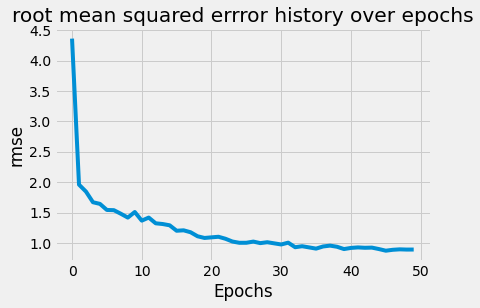

In [ ]:
# Plot of root mean squared errror history over epochs
from matplotlib import pyplot as plt 
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.plot(history.history['rmse'])
plt.ylabel('rmse')
plt.xlabel('Epochs')
plt.title('root mean squared errror history over epochs')

plt.savefig('fig1:root mean squared errror history over epochs')
plt.show()


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_new_inverse = np.exp(y_pred).round(2)

In [ ]:
y_new_inverse

array([[126723.83],
       [149732.97],
       [174332.55],
       ...,
       [157473.19],
       [154957.6 ],
       [228138.78]], dtype=float32)

In [ ]:
submit_test4 = pd.concat([test['Id'],pd.DataFrame(y_new_inverse)], axis=1)
submit_test4.columns=['Id', 'SalePrice']
submit_test4.to_csv('submit_test4_Ann.csv', index=False)

## Evaluating, Improving the ANN with K fold cross validation

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        552M         11G        904K        413M         11G
Swap:            0B          0B          0B


# Tuning the ANN

In [ ]:
# use keras wrapper to use scikit learn for grid search
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers import Dropout


# define root mean squared error loss function
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
        
def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu', input_dim = 188))
    regressor.add(Dropout(p=0.2))
    regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dropout(p=0.2))
    regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dropout(p=0.2))
    regressor.add(Dense(units = 94, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dropout(p=0.2))
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform'))
    regressor.compile(optimizer = optimizer, loss = 'mse', metrics = [rmse])
    return regressor
regressor = KerasRegressor(build_fn = build_regressor)
parameters = {'batch_size': [10,25,32],
              'epochs': [10,25,50],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_root_mean_squared_error',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 3s 2ms/step - loss: 33.4210 - rmse: 4.5855
Epoch 2/10
1314/1314 [==============================] - 1s 471us/step - loss: 4.5140 - rmse: 2.0644
Epoch 3/10
1314/1314 [==============================] - 1s 476us/step - loss: 3.2617 - rmse: 1.7713
Epoch 4/10
1314/1314 [==============================] - 1s 461us/step - loss: 3.0045 - rmse: 1.6858
Epoch 5/10
1314/1314 [==============================] - 1s 577us/step - loss: 3.0712 - rmse: 1.7036
Epoch 6/10
1314/1314 [==============================] - 1s 611us/step - loss: 2.5659 - rmse: 1.5584
Epoch 7/10
1314/1314 [==============================] - 1s 504us/step - loss: 2.5781 - rmse: 1.5539
Epoch 8/10
1314/1314 [==============================] - 1s 540us/step - loss: 2.2473 - rmse: 1.4644
Epoch 9/10
1314/1314 [==============================] - 1s 499us/step - loss: 2.4420 - rmse: 1.5345
Epoch 10/10
1314/1314 [==============================] - 1s 482us/step - loss: 2.1836 - rmse: 1.4386


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 598us/step - loss: 36.5275 - rmse: 4.7175
Epoch 2/10
1314/1314 [==============================] - 1s 447us/step - loss: 4.2411 - rmse: 1.9992
Epoch 3/10
1314/1314 [==============================] - 1s 472us/step - loss: 3.3306 - rmse: 1.7693
Epoch 4/10
1314/1314 [==============================] - 1s 464us/step - loss: 3.0878 - rmse: 1.7219
Epoch 5/10
1314/1314 [==============================] - 1s 460us/step - loss: 2.9636 - rmse: 1.6849
Epoch 6/10
1314/1314 [==============================] - 1s 463us/step - loss: 2.6646 - rmse: 1.6082
Epoch 7/10
1314/1314 [==============================] - 1s 502us/step - loss: 2.3248 - rmse: 1.4840
Epoch 8/10
1314/1314 [==============================] - 1s 550us/step - loss: 2.4438 - rmse: 1.5187
Epoch 9/10
1314/1314 [==============================] - 1s 450us/step - loss: 2.1719 - rmse: 1.4349
Epoch 10/10
1314/1314 [==============================] - 1s 470us/step - loss: 2.1474 - rmse: 1.430

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 627us/step - loss: 33.9784 - rmse: 4.6219
Epoch 2/10
1314/1314 [==============================] - 1s 471us/step - loss: 4.1453 - rmse: 1.9891
Epoch 3/10
1314/1314 [==============================] - 1s 500us/step - loss: 3.3100 - rmse: 1.7702
Epoch 4/10
1314/1314 [==============================] - 1s 443us/step - loss: 2.8197 - rmse: 1.6381
Epoch 5/10
1314/1314 [==============================] - 1s 492us/step - loss: 2.8473 - rmse: 1.6500
Epoch 6/10
1314/1314 [==============================] - 1s 586us/step - loss: 2.4256 - rmse: 1.5220
Epoch 7/10
1314/1314 [==============================] - 1s 519us/step - loss: 2.6403 - rmse: 1.5754
Epoch 8/10
1314/1314 [==============================] - 1s 573us/step - loss: 2.2061 - rmse: 1.4575
Epoch 9/10
1314/1314 [==============================] - 1s 548us/step - loss: 2.1577 - rmse: 1.4291
Epoch 10/10
1314/1314 [==============================] - 1s 464us/step - loss: 2.1009 - rmse: 1.414

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 751us/step - loss: 34.2378 - rmse: 4.5887
Epoch 2/10
1314/1314 [==============================] - 1s 470us/step - loss: 4.4607 - rmse: 2.0647
Epoch 3/10
1314/1314 [==============================] - 1s 494us/step - loss: 3.4743 - rmse: 1.8162
Epoch 4/10
1314/1314 [==============================] - 1s 438us/step - loss: 2.9431 - rmse: 1.6693
Epoch 5/10
1314/1314 [==============================] - 1s 463us/step - loss: 2.8057 - rmse: 1.6421
Epoch 6/10
1314/1314 [==============================] - 1s 488us/step - loss: 2.7556 - rmse: 1.6012
Epoch 7/10
1314/1314 [==============================] - 1s 488us/step - loss: 2.6292 - rmse: 1.5838
Epoch 8/10
1314/1314 [==============================] - 1s 517us/step - loss: 2.2713 - rmse: 1.4738
Epoch 9/10
1314/1314 [==============================] - 1s 462us/step - loss: 2.2624 - rmse: 1.4656
Epoch 10/10
1314/1314 [==============================] - 1s 487us/step - loss: 2.0959 - rmse: 1.413

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 677us/step - loss: 37.8382 - rmse: 4.9073
Epoch 2/10
1314/1314 [==============================] - 1s 553us/step - loss: 4.5572 - rmse: 2.0929
Epoch 3/10
1314/1314 [==============================] - 1s 444us/step - loss: 3.7686 - rmse: 1.8929
Epoch 4/10
1314/1314 [==============================] - 1s 566us/step - loss: 3.0823 - rmse: 1.7053
Epoch 5/10
1314/1314 [==============================] - 1s 563us/step - loss: 2.7162 - rmse: 1.6071
Epoch 6/10
1314/1314 [==============================] - 1s 460us/step - loss: 2.6230 - rmse: 1.5703
Epoch 7/10
1314/1314 [==============================] - 1s 593us/step - loss: 2.2725 - rmse: 1.4719
Epoch 8/10
1314/1314 [==============================] - 1s 603us/step - loss: 2.4194 - rmse: 1.5127
Epoch 9/10
1314/1314 [==============================] - 1s 552us/step - loss: 2.3873 - rmse: 1.5053
Epoch 10/10
1314/1314 [==============================] - 1s 451us/step - loss: 2.4481 - rmse: 1.516

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 611us/step - loss: 36.0966 - rmse: 4.7504
Epoch 2/10
1314/1314 [==============================] - 1s 468us/step - loss: 3.8535 - rmse: 1.9065
Epoch 3/10
1314/1314 [==============================] - 1s 454us/step - loss: 3.9529 - rmse: 1.9357
Epoch 4/10
1314/1314 [==============================] - 1s 471us/step - loss: 3.0422 - rmse: 1.7061
Epoch 5/10
1314/1314 [==============================] - 1s 450us/step - loss: 2.9271 - rmse: 1.6675
Epoch 6/10
1314/1314 [==============================] - 1s 471us/step - loss: 2.6702 - rmse: 1.5939
Epoch 7/10
1314/1314 [==============================] - 1s 467us/step - loss: 2.4731 - rmse: 1.5307
Epoch 8/10
1314/1314 [==============================] - 1s 461us/step - loss: 2.4190 - rmse: 1.5146
Epoch 9/10
1314/1314 [==============================] - 1s 494us/step - loss: 2.1647 - rmse: 1.4415
Epoch 10/10
1314/1314 [==============================] - 1s 536us/step - loss: 2.3039 - rmse: 1.480

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 584us/step - loss: 32.4813 - rmse: 4.4551
Epoch 2/10
1314/1314 [==============================] - 1s 467us/step - loss: 3.8239 - rmse: 1.9031
Epoch 3/10
1314/1314 [==============================] - 1s 466us/step - loss: 3.2895 - rmse: 1.7576
Epoch 4/10
1314/1314 [==============================] - 1s 478us/step - loss: 2.6565 - rmse: 1.5892
Epoch 5/10
1314/1314 [==============================] - 1s 618us/step - loss: 2.6061 - rmse: 1.5838
Epoch 6/10
1314/1314 [==============================] - 1s 518us/step - loss: 2.6253 - rmse: 1.5688
Epoch 7/10
1314/1314 [==============================] - 1s 506us/step - loss: 2.5755 - rmse: 1.5567
Epoch 8/10
1314/1314 [==============================] - 1s 508us/step - loss: 2.3738 - rmse: 1.5010
Epoch 9/10
1314/1314 [==============================] - 1s 536us/step - loss: 2.2959 - rmse: 1.4810
Epoch 10/10
1314/1314 [==============================] - 1s 507us/step - loss: 2.3489 - rmse: 1.480

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 761us/step - loss: 36.2063 - rmse: 4.7387
Epoch 2/10
1314/1314 [==============================] - 1s 481us/step - loss: 4.5288 - rmse: 2.0720
Epoch 3/10
1314/1314 [==============================] - 1s 526us/step - loss: 3.3084 - rmse: 1.7657
Epoch 4/10
1314/1314 [==============================] - 1s 619us/step - loss: 2.9568 - rmse: 1.6813
Epoch 5/10
1314/1314 [==============================] - 1s 576us/step - loss: 2.6395 - rmse: 1.5861
Epoch 6/10
1314/1314 [==============================] - 1s 479us/step - loss: 2.8015 - rmse: 1.6404
Epoch 7/10
1314/1314 [==============================] - 1s 499us/step - loss: 2.3805 - rmse: 1.4929
Epoch 8/10
1314/1314 [==============================] - 1s 550us/step - loss: 2.5297 - rmse: 1.5451
Epoch 9/10
1314/1314 [==============================] - 1s 586us/step - loss: 2.3029 - rmse: 1.4790
Epoch 10/10
1314/1314 [==============================] - 1s 483us/step - loss: 2.2127 - rmse: 1.444

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 636us/step - loss: 37.2989 - rmse: 4.8913
Epoch 2/10
1314/1314 [==============================] - 1s 465us/step - loss: 4.5120 - rmse: 2.0509
Epoch 3/10
1314/1314 [==============================] - 1s 470us/step - loss: 3.5122 - rmse: 1.8322
Epoch 4/10
1314/1314 [==============================] - 1s 492us/step - loss: 3.0324 - rmse: 1.6896
Epoch 5/10
1314/1314 [==============================] - 1s 555us/step - loss: 3.5271 - rmse: 1.8359
Epoch 6/10
1314/1314 [==============================] - 1s 482us/step - loss: 2.7356 - rmse: 1.6175
Epoch 7/10
1314/1314 [==============================] - 1s 478us/step - loss: 2.6262 - rmse: 1.5883
Epoch 8/10
1314/1314 [==============================] - 1s 469us/step - loss: 2.5556 - rmse: 1.5512
Epoch 9/10
1314/1314 [==============================] - 1s 536us/step - loss: 2.5607 - rmse: 1.5630
Epoch 10/10
1314/1314 [==============================] - 1s 537us/step - loss: 2.2563 - rmse: 1.456

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 615us/step - loss: 33.7363 - rmse: 4.5255
Epoch 2/10
1314/1314 [==============================] - 1s 459us/step - loss: 4.4492 - rmse: 2.0425
Epoch 3/10
1314/1314 [==============================] - 1s 443us/step - loss: 3.4970 - rmse: 1.8187
Epoch 4/10
1314/1314 [==============================] - 1s 475us/step - loss: 3.0940 - rmse: 1.7116
Epoch 5/10
1314/1314 [==============================] - 1s 449us/step - loss: 2.8474 - rmse: 1.6450
Epoch 6/10
1314/1314 [==============================] - 1s 452us/step - loss: 2.6071 - rmse: 1.5628
Epoch 7/10
1314/1314 [==============================] - 1s 437us/step - loss: 2.4708 - rmse: 1.5288
Epoch 8/10
1314/1314 [==============================] - 1s 471us/step - loss: 2.6494 - rmse: 1.5723
Epoch 9/10
1314/1314 [==============================] - 1s 527us/step - loss: 2.1282 - rmse: 1.4205
Epoch 10/10
1314/1314 [==============================] - 1s 444us/step - loss: 2.2381 - rmse: 1.459

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 544us/step - loss: 17.2400 - rmse: 3.3216
Epoch 2/10
1314/1314 [==============================] - 1s 474us/step - loss: 4.5786 - rmse: 2.0567
Epoch 3/10
1314/1314 [==============================] - 1s 529us/step - loss: 3.8903 - rmse: 1.9066
Epoch 4/10
1314/1314 [==============================] - 1s 463us/step - loss: 3.4321 - rmse: 1.7696
Epoch 5/10
1314/1314 [==============================] - 1s 405us/step - loss: 3.2892 - rmse: 1.7549
Epoch 6/10
1314/1314 [==============================] - 1s 425us/step - loss: 3.2532 - rmse: 1.7461
Epoch 7/10
1314/1314 [==============================] - 1s 413us/step - loss: 3.0068 - rmse: 1.6585
Epoch 8/10
1314/1314 [==============================] - 1s 417us/step - loss: 2.9082 - rmse: 1.6491
Epoch 9/10
1314/1314 [==============================] - 1s 429us/step - loss: 2.9102 - rmse: 1.6534
Epoch 10/10
1314/1314 [==============================] - 1s 412us/step - loss: 2.6884 - rmse: 1.591

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 633us/step - loss: 16.8242 - rmse: 3.2864
Epoch 2/10
1314/1314 [==============================] - 1s 446us/step - loss: 4.7281 - rmse: 2.0990
Epoch 3/10
1314/1314 [==============================] - 1s 423us/step - loss: 3.6968 - rmse: 1.8655
Epoch 4/10
1314/1314 [==============================] - 1s 517us/step - loss: 3.6420 - rmse: 1.8482
Epoch 5/10
1314/1314 [==============================] - 1s 395us/step - loss: 3.5501 - rmse: 1.8312
Epoch 6/10
1314/1314 [==============================] - 1s 414us/step - loss: 3.2888 - rmse: 1.7554
Epoch 7/10
1314/1314 [==============================] - 1s 419us/step - loss: 3.1890 - rmse: 1.7194
Epoch 8/10
1314/1314 [==============================] - 1s 495us/step - loss: 2.7302 - rmse: 1.5927
Epoch 9/10
1314/1314 [==============================] - 1s 503us/step - loss: 2.9094 - rmse: 1.6496
Epoch 10/10
1314/1314 [==============================] - 1s 408us/step - loss: 2.6733 - rmse: 1.577

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 524us/step - loss: 18.4445 - rmse: 3.3779
Epoch 2/10
1314/1314 [==============================] - 1s 408us/step - loss: 4.7906 - rmse: 2.1228
Epoch 3/10
1314/1314 [==============================] - 1s 429us/step - loss: 3.9066 - rmse: 1.9216
Epoch 4/10
1314/1314 [==============================] - 1s 419us/step - loss: 3.8373 - rmse: 1.8821
Epoch 5/10
1314/1314 [==============================] - 1s 440us/step - loss: 3.4761 - rmse: 1.8060
Epoch 6/10
1314/1314 [==============================] - 1s 520us/step - loss: 3.3882 - rmse: 1.7752
Epoch 7/10
1314/1314 [==============================] - 1s 534us/step - loss: 3.2416 - rmse: 1.7226
Epoch 8/10
1314/1314 [==============================] - 1s 434us/step - loss: 3.0086 - rmse: 1.6919
Epoch 9/10
1314/1314 [==============================] - 1s 421us/step - loss: 2.6861 - rmse: 1.5886
Epoch 10/10
1314/1314 [==============================] - 1s 423us/step - loss: 2.5155 - rmse: 1.532

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 574us/step - loss: 17.0219 - rmse: 3.2743
Epoch 2/10
1314/1314 [==============================] - 1s 423us/step - loss: 4.3538 - rmse: 2.0318
Epoch 3/10
1314/1314 [==============================] - 1s 410us/step - loss: 4.3012 - rmse: 2.0166
Epoch 4/10
1314/1314 [==============================] - 1s 408us/step - loss: 3.6469 - rmse: 1.8563
Epoch 5/10
1314/1314 [==============================] - 1s 422us/step - loss: 3.4510 - rmse: 1.7983
Epoch 6/10
1314/1314 [==============================] - 1s 411us/step - loss: 3.4039 - rmse: 1.7801
Epoch 7/10
1314/1314 [==============================] - 1s 403us/step - loss: 3.1982 - rmse: 1.7271
Epoch 8/10
1314/1314 [==============================] - 1s 424us/step - loss: 3.1431 - rmse: 1.7213
Epoch 9/10
1314/1314 [==============================] - 1s 469us/step - loss: 3.0005 - rmse: 1.6682
Epoch 10/10
1314/1314 [==============================] - 1s 477us/step - loss: 3.0069 - rmse: 1.666

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 663us/step - loss: 17.5253 - rmse: 3.3714
Epoch 2/10
1314/1314 [==============================] - 1s 554us/step - loss: 4.7897 - rmse: 2.1274
Epoch 3/10
1314/1314 [==============================] - 1s 477us/step - loss: 4.1617 - rmse: 1.9721
Epoch 4/10
1314/1314 [==============================] - 1s 439us/step - loss: 3.5499 - rmse: 1.8174
Epoch 5/10
1314/1314 [==============================] - 1s 456us/step - loss: 3.7287 - rmse: 1.8650
Epoch 6/10
1314/1314 [==============================] - 1s 474us/step - loss: 3.3047 - rmse: 1.7417
Epoch 7/10
1314/1314 [==============================] - 1s 428us/step - loss: 3.1690 - rmse: 1.7140
Epoch 8/10
1314/1314 [==============================] - 1s 526us/step - loss: 3.1733 - rmse: 1.7343
Epoch 9/10
1314/1314 [==============================] - 1s 479us/step - loss: 3.0294 - rmse: 1.6700
Epoch 10/10
1314/1314 [==============================] - 1s 446us/step - loss: 2.8636 - rmse: 1.631

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 558us/step - loss: 17.9616 - rmse: 3.3993
Epoch 2/10
1314/1314 [==============================] - 1s 423us/step - loss: 4.3932 - rmse: 2.0388
Epoch 3/10
1314/1314 [==============================] - 1s 406us/step - loss: 3.8879 - rmse: 1.9117
Epoch 4/10
1314/1314 [==============================] - 1s 460us/step - loss: 3.6067 - rmse: 1.8423
Epoch 5/10
1314/1314 [==============================] - 1s 543us/step - loss: 3.5405 - rmse: 1.8230
Epoch 6/10
1314/1314 [==============================] - 1s 510us/step - loss: 3.1963 - rmse: 1.7304
Epoch 7/10
1314/1314 [==============================] - 1s 531us/step - loss: 3.1593 - rmse: 1.7262
Epoch 8/10
1314/1314 [==============================] - 1s 540us/step - loss: 3.0469 - rmse: 1.6850
Epoch 9/10
1314/1314 [==============================] - 1s 443us/step - loss: 2.8673 - rmse: 1.6477
Epoch 10/10
1314/1314 [==============================] - 1s 435us/step - loss: 2.9640 - rmse: 1.659

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 559us/step - loss: 16.2337 - rmse: 3.1940
Epoch 2/10
1314/1314 [==============================] - 1s 502us/step - loss: 4.4207 - rmse: 2.0487
Epoch 3/10
1314/1314 [==============================] - 1s 452us/step - loss: 4.1078 - rmse: 1.9631
Epoch 4/10
1314/1314 [==============================] - 1s 404us/step - loss: 3.6773 - rmse: 1.8532
Epoch 5/10
1314/1314 [==============================] - 1s 426us/step - loss: 3.3383 - rmse: 1.7729
Epoch 6/10
1314/1314 [==============================] - 1s 412us/step - loss: 3.1365 - rmse: 1.7224
Epoch 7/10
1314/1314 [==============================] - 1s 417us/step - loss: 3.2526 - rmse: 1.7372
Epoch 8/10
1314/1314 [==============================] - 1s 535us/step - loss: 3.0543 - rmse: 1.7009
Epoch 9/10
1314/1314 [==============================] - 1s 534us/step - loss: 2.8077 - rmse: 1.6217
Epoch 10/10
1314/1314 [==============================] - 1s 473us/step - loss: 2.7927 - rmse: 1.610

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 606us/step - loss: 16.8822 - rmse: 3.3053
Epoch 2/10
1314/1314 [==============================] - 1s 419us/step - loss: 4.7928 - rmse: 2.1295
Epoch 3/10
1314/1314 [==============================] - 1s 421us/step - loss: 4.2081 - rmse: 2.0032
Epoch 4/10
1314/1314 [==============================] - 1s 538us/step - loss: 3.5315 - rmse: 1.8353
Epoch 5/10
1314/1314 [==============================] - 1s 492us/step - loss: 3.4186 - rmse: 1.7686
Epoch 6/10
1314/1314 [==============================] - 1s 543us/step - loss: 3.3221 - rmse: 1.7460
Epoch 7/10
1314/1314 [==============================] - 1s 542us/step - loss: 3.1129 - rmse: 1.7155
Epoch 8/10
1314/1314 [==============================] - 1s 431us/step - loss: 3.1935 - rmse: 1.7271
Epoch 9/10
1314/1314 [==============================] - 1s 402us/step - loss: 2.8984 - rmse: 1.6521
Epoch 10/10
1314/1314 [==============================] - 1s 448us/step - loss: 3.0204 - rmse: 1.668

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 535us/step - loss: 17.3269 - rmse: 3.2982
Epoch 2/10
1314/1314 [==============================] - 1s 425us/step - loss: 4.2972 - rmse: 2.0108
Epoch 3/10
1314/1314 [==============================] - 1s 395us/step - loss: 3.9631 - rmse: 1.9348
Epoch 4/10
1314/1314 [==============================] - 1s 408us/step - loss: 3.6157 - rmse: 1.8538
Epoch 5/10
1314/1314 [==============================] - 1s 432us/step - loss: 3.4667 - rmse: 1.7968
Epoch 6/10
1314/1314 [==============================] - 1s 413us/step - loss: 3.2218 - rmse: 1.7392
Epoch 7/10
1314/1314 [==============================] - 1s 457us/step - loss: 3.1303 - rmse: 1.6981
Epoch 8/10
1314/1314 [==============================] - 1s 522us/step - loss: 2.9420 - rmse: 1.6643
Epoch 9/10
1314/1314 [==============================] - 1s 434us/step - loss: 3.0151 - rmse: 1.6750
Epoch 10/10
1314/1314 [==============================] - 1s 430us/step - loss: 2.9174 - rmse: 1.646

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 671us/step - loss: 18.2443 - rmse: 3.4630
Epoch 2/10
1314/1314 [==============================] - 1s 437us/step - loss: 4.8409 - rmse: 2.1371
Epoch 3/10
1314/1314 [==============================] - 1s 537us/step - loss: 4.2015 - rmse: 1.9782
Epoch 4/10
1314/1314 [==============================] - 1s 476us/step - loss: 3.3928 - rmse: 1.7941
Epoch 5/10
1314/1314 [==============================] - 1s 423us/step - loss: 3.4670 - rmse: 1.8076
Epoch 6/10
1314/1314 [==============================] - 1s 503us/step - loss: 3.4776 - rmse: 1.8087
Epoch 7/10
1314/1314 [==============================] - 1s 444us/step - loss: 3.0953 - rmse: 1.7118
Epoch 8/10
1314/1314 [==============================] - 1s 436us/step - loss: 3.1541 - rmse: 1.7249
Epoch 9/10
1314/1314 [==============================] - 1s 421us/step - loss: 3.1733 - rmse: 1.7291
Epoch 10/10
1314/1314 [==============================] - 1s 407us/step - loss: 2.8207 - rmse: 1.629

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 693us/step - loss: 35.4969 - rmse: 4.7080
Epoch 2/25
1314/1314 [==============================] - 1s 453us/step - loss: 4.8180 - rmse: 2.1320
Epoch 3/25
1314/1314 [==============================] - 1s 447us/step - loss: 3.7509 - rmse: 1.8822
Epoch 4/25
1314/1314 [==============================] - 1s 495us/step - loss: 3.2318 - rmse: 1.7523
Epoch 5/25
1314/1314 [==============================] - 1s 455us/step - loss: 2.7550 - rmse: 1.6224
Epoch 6/25
1314/1314 [==============================] - 1s 454us/step - loss: 2.7019 - rmse: 1.6035
Epoch 7/25
1314/1314 [==============================] - 1s 493us/step - loss: 2.6038 - rmse: 1.5715
Epoch 8/25
1314/1314 [==============================] - 1s 442us/step - loss: 2.5195 - rmse: 1.5506
Epoch 9/25
1314/1314 [==============================] - 1s 512us/step - loss: 2.5873 - rmse: 1.5647
Epoch 10/25
1314/1314 [==============================] - 1s 595us/step - loss: 2.5518 - rmse: 1.554

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 811us/step - loss: 34.2652 - rmse: 4.5854
Epoch 2/25
1314/1314 [==============================] - 1s 602us/step - loss: 4.0902 - rmse: 1.9687
Epoch 3/25
1314/1314 [==============================] - 1s 457us/step - loss: 3.4526 - rmse: 1.8179
Epoch 4/25
1314/1314 [==============================] - 1s 462us/step - loss: 3.1529 - rmse: 1.7522
Epoch 5/25
1314/1314 [==============================] - 1s 506us/step - loss: 3.1703 - rmse: 1.7259
Epoch 6/25
1314/1314 [==============================] - 1s 474us/step - loss: 2.6996 - rmse: 1.5948
Epoch 7/25
1314/1314 [==============================] - 1s 477us/step - loss: 2.3375 - rmse: 1.4906
Epoch 8/25
1314/1314 [==============================] - 1s 454us/step - loss: 2.3236 - rmse: 1.4860
Epoch 9/25
1314/1314 [==============================] - 1s 477us/step - loss: 2.0839 - rmse: 1.4051
Epoch 10/25
1314/1314 [==============================] - 1s 465us/step - loss: 2.3460 - rmse: 1.494

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 659us/step - loss: 32.8515 - rmse: 4.4755
Epoch 2/25
1314/1314 [==============================] - 1s 480us/step - loss: 4.5150 - rmse: 2.0762
Epoch 3/25
1314/1314 [==============================] - 1s 472us/step - loss: 3.1334 - rmse: 1.7226
Epoch 4/25
1314/1314 [==============================] - 1s 474us/step - loss: 3.3072 - rmse: 1.7654
Epoch 5/25
1314/1314 [==============================] - 1s 512us/step - loss: 2.7358 - rmse: 1.6179
Epoch 6/25
1314/1314 [==============================] - 1s 466us/step - loss: 2.5914 - rmse: 1.5736
Epoch 7/25
1314/1314 [==============================] - 1s 479us/step - loss: 2.6242 - rmse: 1.5810
Epoch 8/25
1314/1314 [==============================] - 1s 467us/step - loss: 2.4715 - rmse: 1.5284
Epoch 9/25
1314/1314 [==============================] - 1s 477us/step - loss: 2.2660 - rmse: 1.4678
Epoch 10/25
1314/1314 [==============================] - 1s 475us/step - loss: 2.1852 - rmse: 1.436

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 621us/step - loss: 34.0640 - rmse: 4.5187
Epoch 2/25
1314/1314 [==============================] - 1s 555us/step - loss: 4.2461 - rmse: 2.0209
Epoch 3/25
1314/1314 [==============================] - 1s 541us/step - loss: 3.1984 - rmse: 1.7554
Epoch 4/25
1314/1314 [==============================] - 1s 464us/step - loss: 2.8240 - rmse: 1.6449
Epoch 5/25
1314/1314 [==============================] - 1s 555us/step - loss: 2.8735 - rmse: 1.6552
Epoch 6/25
1314/1314 [==============================] - 1s 512us/step - loss: 2.6631 - rmse: 1.5909
Epoch 7/25
1314/1314 [==============================] - 1s 533us/step - loss: 2.5965 - rmse: 1.5780
Epoch 8/25
1314/1314 [==============================] - 1s 452us/step - loss: 2.3112 - rmse: 1.4887
Epoch 9/25
1314/1314 [==============================] - 1s 464us/step - loss: 2.3177 - rmse: 1.4844
Epoch 10/25
1314/1314 [==============================] - 1s 454us/step - loss: 2.1589 - rmse: 1.432

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 659us/step - loss: 33.5895 - rmse: 4.5482
Epoch 2/25
1314/1314 [==============================] - 1s 492us/step - loss: 4.3549 - rmse: 2.0267
Epoch 3/25
1314/1314 [==============================] - 1s 550us/step - loss: 3.3065 - rmse: 1.7672
Epoch 4/25
1314/1314 [==============================] - 1s 549us/step - loss: 3.0606 - rmse: 1.6947
Epoch 5/25
1314/1314 [==============================] - 1s 554us/step - loss: 2.9832 - rmse: 1.6860
Epoch 6/25
1314/1314 [==============================] - 1s 494us/step - loss: 2.5964 - rmse: 1.5653
Epoch 7/25
1314/1314 [==============================] - 1s 445us/step - loss: 2.5450 - rmse: 1.5403
Epoch 8/25
1314/1314 [==============================] - 1s 468us/step - loss: 2.1189 - rmse: 1.4111
Epoch 9/25
1314/1314 [==============================] - 1s 488us/step - loss: 2.3122 - rmse: 1.4854
Epoch 10/25
1314/1314 [==============================] - 1s 461us/step - loss: 2.1484 - rmse: 1.428

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 702us/step - loss: 33.1221 - rmse: 4.5355
Epoch 2/25
1314/1314 [==============================] - 1s 555us/step - loss: 4.4875 - rmse: 2.0561
Epoch 3/25
1314/1314 [==============================] - 1s 462us/step - loss: 3.4080 - rmse: 1.8039
Epoch 4/25
1314/1314 [==============================] - 1s 471us/step - loss: 3.0930 - rmse: 1.7135
Epoch 5/25
1314/1314 [==============================] - 1s 462us/step - loss: 2.9225 - rmse: 1.6741
Epoch 6/25
1314/1314 [==============================] - 1s 609us/step - loss: 2.6136 - rmse: 1.5771
Epoch 7/25
1314/1314 [==============================] - 1s 562us/step - loss: 2.5579 - rmse: 1.5641
Epoch 8/25
1314/1314 [==============================] - 1s 534us/step - loss: 2.9815 - rmse: 1.6781
Epoch 9/25
1314/1314 [==============================] - 1s 486us/step - loss: 2.3294 - rmse: 1.4816
Epoch 10/25
1314/1314 [==============================] - 1s 583us/step - loss: 2.3216 - rmse: 1.478

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 675us/step - loss: 36.0073 - rmse: 4.7888
Epoch 2/25
1314/1314 [==============================] - 1s 451us/step - loss: 4.0224 - rmse: 1.9590
Epoch 3/25
1314/1314 [==============================] - 1s 461us/step - loss: 3.3007 - rmse: 1.7723
Epoch 4/25
1314/1314 [==============================] - 1s 465us/step - loss: 3.1615 - rmse: 1.7289
Epoch 5/25
1314/1314 [==============================] - 1s 474us/step - loss: 2.7435 - rmse: 1.6135
Epoch 6/25
1314/1314 [==============================] - 1s 472us/step - loss: 2.6475 - rmse: 1.5912
Epoch 7/25
1314/1314 [==============================] - 1s 443us/step - loss: 2.2980 - rmse: 1.4776
Epoch 8/25
1314/1314 [==============================] - 1s 480us/step - loss: 2.6554 - rmse: 1.5839
Epoch 9/25
1314/1314 [==============================] - 1s 550us/step - loss: 1.9797 - rmse: 1.3769
Epoch 10/25
1314/1314 [==============================] - 1s 464us/step - loss: 2.3744 - rmse: 1.494

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 709us/step - loss: 34.8938 - rmse: 4.6457
Epoch 2/25
1314/1314 [==============================] - 1s 515us/step - loss: 4.1516 - rmse: 1.9863
Epoch 3/25
1314/1314 [==============================] - 1s 556us/step - loss: 3.5392 - rmse: 1.8255
Epoch 4/25
1314/1314 [==============================] - 1s 469us/step - loss: 2.8595 - rmse: 1.6460
Epoch 5/25
1314/1314 [==============================] - 1s 478us/step - loss: 2.6787 - rmse: 1.5921
Epoch 6/25
1314/1314 [==============================] - 1s 456us/step - loss: 2.7364 - rmse: 1.6084
Epoch 7/25
1314/1314 [==============================] - 1s 469us/step - loss: 2.6240 - rmse: 1.5747
Epoch 8/25
1314/1314 [==============================] - 1s 454us/step - loss: 2.5241 - rmse: 1.5486
Epoch 9/25
1314/1314 [==============================] - 1s 618us/step - loss: 2.4322 - rmse: 1.5167
Epoch 10/25
1314/1314 [==============================] - 1s 589us/step - loss: 2.3636 - rmse: 1.497

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 769us/step - loss: 36.1195 - rmse: 4.7552
Epoch 2/25
1314/1314 [==============================] - 1s 469us/step - loss: 4.6375 - rmse: 2.0925
Epoch 3/25
1314/1314 [==============================] - 1s 453us/step - loss: 3.4527 - rmse: 1.8213
Epoch 4/25
1314/1314 [==============================] - 1s 435us/step - loss: 2.9866 - rmse: 1.6862
Epoch 5/25
1314/1314 [==============================] - 1s 468us/step - loss: 2.6815 - rmse: 1.6010
Epoch 6/25
1314/1314 [==============================] - 1s 500us/step - loss: 2.4497 - rmse: 1.5267
Epoch 7/25
1314/1314 [==============================] - 1s 475us/step - loss: 2.4647 - rmse: 1.5370
Epoch 8/25
1314/1314 [==============================] - 1s 482us/step - loss: 2.6200 - rmse: 1.5729
Epoch 9/25
1314/1314 [==============================] - 1s 457us/step - loss: 2.3551 - rmse: 1.4954
Epoch 10/25
1314/1314 [==============================] - 1s 438us/step - loss: 2.1114 - rmse: 1.411

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 672us/step - loss: 34.4692 - rmse: 4.6482
Epoch 2/25
1314/1314 [==============================] - 1s 549us/step - loss: 4.4708 - rmse: 2.0541
Epoch 3/25
1314/1314 [==============================] - 1s 461us/step - loss: 3.2964 - rmse: 1.7740
Epoch 4/25
1314/1314 [==============================] - 1s 459us/step - loss: 2.9382 - rmse: 1.6695
Epoch 5/25
1314/1314 [==============================] - 1s 494us/step - loss: 3.0666 - rmse: 1.7140
Epoch 6/25
1314/1314 [==============================] - 1s 490us/step - loss: 2.8451 - rmse: 1.6532
Epoch 7/25
1314/1314 [==============================] - 1s 499us/step - loss: 2.5142 - rmse: 1.5366
Epoch 8/25
1314/1314 [==============================] - 1s 546us/step - loss: 2.7806 - rmse: 1.6317
Epoch 9/25
1314/1314 [==============================] - 1s 521us/step - loss: 2.3622 - rmse: 1.5005
Epoch 10/25
1314/1314 [==============================] - 1s 492us/step - loss: 2.2202 - rmse: 1.451

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 689us/step - loss: 16.3621 - rmse: 3.1606
Epoch 2/25
1314/1314 [==============================] - 1s 452us/step - loss: 4.4454 - rmse: 2.0388
Epoch 3/25
1314/1314 [==============================] - 1s 414us/step - loss: 3.8976 - rmse: 1.9201
Epoch 4/25
1314/1314 [==============================] - 1s 444us/step - loss: 3.7275 - rmse: 1.8730
Epoch 5/25
1314/1314 [==============================] - 1s 427us/step - loss: 3.4501 - rmse: 1.7984
Epoch 6/25
1314/1314 [==============================] - 1s 414us/step - loss: 3.1915 - rmse: 1.7429
Epoch 7/25
1314/1314 [==============================] - 1s 422us/step - loss: 3.2208 - rmse: 1.7333
Epoch 8/25
1314/1314 [==============================] - 1s 421us/step - loss: 3.1897 - rmse: 1.7236
Epoch 9/25
1314/1314 [==============================] - 1s 427us/step - loss: 2.8670 - rmse: 1.6421
Epoch 10/25
1314/1314 [==============================] - 1s 430us/step - loss: 2.7407 - rmse: 1.612

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 548us/step - loss: 17.6114 - rmse: 3.3570
Epoch 2/25
1314/1314 [==============================] - 1s 427us/step - loss: 4.9553 - rmse: 2.1478
Epoch 3/25
1314/1314 [==============================] - 1s 412us/step - loss: 4.2692 - rmse: 1.9894
Epoch 4/25
1314/1314 [==============================] - 1s 427us/step - loss: 3.6039 - rmse: 1.8410
Epoch 5/25
1314/1314 [==============================] - 1s 424us/step - loss: 3.7178 - rmse: 1.8732
Epoch 6/25
1314/1314 [==============================] - 1s 411us/step - loss: 3.2647 - rmse: 1.7604
Epoch 7/25
1314/1314 [==============================] - 1s 453us/step - loss: 3.1583 - rmse: 1.7201
Epoch 8/25
1314/1314 [==============================] - 1s 501us/step - loss: 3.0391 - rmse: 1.6970
Epoch 9/25
1314/1314 [==============================] - 1s 417us/step - loss: 2.9139 - rmse: 1.6391
Epoch 10/25
1314/1314 [==============================] - 1s 416us/step - loss: 2.7702 - rmse: 1.606

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 541us/step - loss: 17.6187 - rmse: 3.3963
Epoch 2/25
1314/1314 [==============================] - 1s 425us/step - loss: 4.6372 - rmse: 2.0908
Epoch 3/25
1314/1314 [==============================] - 1s 414us/step - loss: 3.7807 - rmse: 1.8949
Epoch 4/25
1314/1314 [==============================] - 1s 450us/step - loss: 3.5635 - rmse: 1.8287
Epoch 5/25
1314/1314 [==============================] - 1s 424us/step - loss: 3.4853 - rmse: 1.8066
Epoch 6/25
1314/1314 [==============================] - 1s 408us/step - loss: 3.3064 - rmse: 1.7494
Epoch 7/25
1314/1314 [==============================] - 1s 408us/step - loss: 3.1409 - rmse: 1.7120
Epoch 8/25
1314/1314 [==============================] - 1s 533us/step - loss: 2.8678 - rmse: 1.6302
Epoch 9/25
1314/1314 [==============================] - 1s 502us/step - loss: 2.8839 - rmse: 1.6362
Epoch 10/25
1314/1314 [==============================] - 1s 440us/step - loss: 2.6627 - rmse: 1.561

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 548us/step - loss: 18.5006 - rmse: 3.4798
Epoch 2/25
1314/1314 [==============================] - 1s 405us/step - loss: 4.4812 - rmse: 2.0584
Epoch 3/25
1314/1314 [==============================] - 1s 512us/step - loss: 3.7945 - rmse: 1.8862
Epoch 4/25
1314/1314 [==============================] - 1s 452us/step - loss: 3.6526 - rmse: 1.8586
Epoch 5/25
1314/1314 [==============================] - 1s 414us/step - loss: 3.3984 - rmse: 1.7939
Epoch 6/25
1314/1314 [==============================] - 1s 453us/step - loss: 3.3774 - rmse: 1.7918
Epoch 7/25
1314/1314 [==============================] - 1s 410us/step - loss: 3.1479 - rmse: 1.7239
Epoch 8/25
1314/1314 [==============================] - 1s 410us/step - loss: 3.0527 - rmse: 1.6898
Epoch 9/25
1314/1314 [==============================] - 1s 431us/step - loss: 3.1117 - rmse: 1.7108
Epoch 10/25
1314/1314 [==============================] - 1s 521us/step - loss: 2.9383 - rmse: 1.640

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 651us/step - loss: 18.4216 - rmse: 3.4943
Epoch 2/25
1314/1314 [==============================] - 1s 421us/step - loss: 4.7127 - rmse: 2.0978
Epoch 3/25
1314/1314 [==============================] - 1s 465us/step - loss: 3.8266 - rmse: 1.8889
Epoch 4/25
1314/1314 [==============================] - 1s 409us/step - loss: 3.6750 - rmse: 1.8601
Epoch 5/25
1314/1314 [==============================] - 1s 422us/step - loss: 3.3466 - rmse: 1.7683
Epoch 6/25
1314/1314 [==============================] - 1s 420us/step - loss: 3.2715 - rmse: 1.7422
Epoch 7/25
1314/1314 [==============================] - 1s 409us/step - loss: 2.9513 - rmse: 1.6697
Epoch 8/25
1314/1314 [==============================] - 1s 428us/step - loss: 3.1645 - rmse: 1.7229
Epoch 9/25
1314/1314 [==============================] - 1s 401us/step - loss: 2.7717 - rmse: 1.6132
Epoch 10/25
1314/1314 [==============================] - 1s 430us/step - loss: 2.5899 - rmse: 1.549

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 644us/step - loss: 15.6179 - rmse: 3.1140
Epoch 2/25
1314/1314 [==============================] - 1s 542us/step - loss: 4.1489 - rmse: 1.9817
Epoch 3/25
1314/1314 [==============================] - 1s 446us/step - loss: 3.6418 - rmse: 1.8570
Epoch 4/25
1314/1314 [==============================] - 1s 408us/step - loss: 3.4480 - rmse: 1.7986
Epoch 5/25
1314/1314 [==============================] - 1s 409us/step - loss: 3.3439 - rmse: 1.7641
Epoch 6/25
1314/1314 [==============================] - 1s 445us/step - loss: 2.9264 - rmse: 1.6609
Epoch 7/25
1314/1314 [==============================] - 1s 528us/step - loss: 2.6623 - rmse: 1.5675
Epoch 8/25
1314/1314 [==============================] - 1s 544us/step - loss: 2.9755 - rmse: 1.6532
Epoch 9/25
1314/1314 [==============================] - 1s 536us/step - loss: 2.6531 - rmse: 1.5788
Epoch 10/25
1314/1314 [==============================] - 1s 521us/step - loss: 2.4634 - rmse: 1.530

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 571us/step - loss: 16.8707 - rmse: 3.3107
Epoch 2/25
1314/1314 [==============================] - 1s 521us/step - loss: 4.3911 - rmse: 2.0332
Epoch 3/25
1314/1314 [==============================] - 1s 486us/step - loss: 4.1084 - rmse: 1.9809
Epoch 4/25
1314/1314 [==============================] - 1s 478us/step - loss: 3.6081 - rmse: 1.8406
Epoch 5/25
1314/1314 [==============================] - 1s 424us/step - loss: 3.3853 - rmse: 1.7783
Epoch 6/25
1314/1314 [==============================] - 1s 419us/step - loss: 3.3180 - rmse: 1.7379
Epoch 7/25
1314/1314 [==============================] - 1s 412us/step - loss: 3.0833 - rmse: 1.7054
Epoch 8/25
1314/1314 [==============================] - 1s 415us/step - loss: 2.8663 - rmse: 1.6385
Epoch 9/25
1314/1314 [==============================] - 1s 416us/step - loss: 2.8547 - rmse: 1.6460
Epoch 10/25
1314/1314 [==============================] - 1s 409us/step - loss: 2.9459 - rmse: 1.643

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 566us/step - loss: 16.2773 - rmse: 3.2170
Epoch 2/25
1314/1314 [==============================] - 1s 417us/step - loss: 4.4691 - rmse: 2.0491
Epoch 3/25
1314/1314 [==============================] - 1s 413us/step - loss: 3.7967 - rmse: 1.8936
Epoch 4/25
1314/1314 [==============================] - 1s 414us/step - loss: 3.4780 - rmse: 1.7935
Epoch 5/25
1314/1314 [==============================] - 1s 536us/step - loss: 3.2058 - rmse: 1.7374
Epoch 6/25
1314/1314 [==============================] - 1s 542us/step - loss: 3.0943 - rmse: 1.7004
Epoch 7/25
1314/1314 [==============================] - 1s 421us/step - loss: 3.2267 - rmse: 1.7225
Epoch 8/25
1314/1314 [==============================] - 1s 420us/step - loss: 2.9515 - rmse: 1.6665
Epoch 9/25
1314/1314 [==============================] - 1s 398us/step - loss: 2.5810 - rmse: 1.5539
Epoch 10/25
1314/1314 [==============================] - 1s 426us/step - loss: 2.7794 - rmse: 1.607

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 538us/step - loss: 17.4364 - rmse: 3.3486
Epoch 2/25
1314/1314 [==============================] - 1s 414us/step - loss: 4.7656 - rmse: 2.1191
Epoch 3/25
1314/1314 [==============================] - 1s 422us/step - loss: 3.9552 - rmse: 1.9229
Epoch 4/25
1314/1314 [==============================] - 1s 473us/step - loss: 3.5367 - rmse: 1.8403
Epoch 5/25
1314/1314 [==============================] - 1s 418us/step - loss: 3.5059 - rmse: 1.8156
Epoch 6/25
1314/1314 [==============================] - 1s 441us/step - loss: 3.1075 - rmse: 1.7215
Epoch 7/25
1314/1314 [==============================] - 1s 416us/step - loss: 3.0678 - rmse: 1.7047
Epoch 8/25
1314/1314 [==============================] - 1s 416us/step - loss: 2.8963 - rmse: 1.6386
Epoch 9/25
1314/1314 [==============================] - 1s 398us/step - loss: 2.7223 - rmse: 1.5921
Epoch 10/25
1314/1314 [==============================] - 1s 399us/step - loss: 2.9180 - rmse: 1.642

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 587us/step - loss: 16.9404 - rmse: 3.2898
Epoch 2/25
1314/1314 [==============================] - 1s 441us/step - loss: 4.7162 - rmse: 2.1009
Epoch 3/25
1314/1314 [==============================] - 1s 427us/step - loss: 4.0949 - rmse: 1.9634
Epoch 4/25
1314/1314 [==============================] - 1s 432us/step - loss: 3.6133 - rmse: 1.8362
Epoch 5/25
1314/1314 [==============================] - 1s 424us/step - loss: 3.5172 - rmse: 1.8152
Epoch 6/25
1314/1314 [==============================] - 1s 417us/step - loss: 3.3598 - rmse: 1.7748
Epoch 7/25
1314/1314 [==============================] - 1s 430us/step - loss: 3.5521 - rmse: 1.7979
Epoch 8/25
1314/1314 [==============================] - 1s 439us/step - loss: 3.0908 - rmse: 1.6954
Epoch 9/25
1314/1314 [==============================] - 1s 437us/step - loss: 3.0789 - rmse: 1.6994
Epoch 10/25
1314/1314 [==============================] - 1s 425us/step - loss: 3.0556 - rmse: 1.699

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 641us/step - loss: 34.9539 - rmse: 4.6509
Epoch 2/50
1314/1314 [==============================] - 1s 557us/step - loss: 4.1179 - rmse: 1.9795
Epoch 3/50
1314/1314 [==============================] - 1s 541us/step - loss: 3.1189 - rmse: 1.7258
Epoch 4/50
1314/1314 [==============================] - 1s 467us/step - loss: 3.0856 - rmse: 1.7108
Epoch 5/50
1314/1314 [==============================] - 1s 465us/step - loss: 2.5296 - rmse: 1.5531
Epoch 6/50
1314/1314 [==============================] - 1s 519us/step - loss: 2.4340 - rmse: 1.5140
Epoch 7/50
1314/1314 [==============================] - 1s 606us/step - loss: 2.3156 - rmse: 1.4862
Epoch 8/50
1314/1314 [==============================] - 1s 461us/step - loss: 2.2007 - rmse: 1.4462
Epoch 9/50
1314/1314 [==============================] - 1s 482us/step - loss: 2.3499 - rmse: 1.4911
Epoch 10/50
1314/1314 [==============================] - 1s 537us/step - loss: 2.1869 - rmse: 1.435

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 795us/step - loss: 35.1418 - rmse: 4.6929
Epoch 2/50
1314/1314 [==============================] - 1s 468us/step - loss: 4.5191 - rmse: 2.0706
Epoch 3/50
1314/1314 [==============================] - 1s 472us/step - loss: 3.6222 - rmse: 1.8515
Epoch 4/50
1314/1314 [==============================] - 1s 464us/step - loss: 3.1987 - rmse: 1.7381
Epoch 5/50
1314/1314 [==============================] - 1s 469us/step - loss: 2.9706 - rmse: 1.6770
Epoch 6/50
1314/1314 [==============================] - 1s 523us/step - loss: 2.8197 - rmse: 1.6404
Epoch 7/50
1314/1314 [==============================] - 1s 458us/step - loss: 2.4194 - rmse: 1.5053
Epoch 8/50
1314/1314 [==============================] - 1s 466us/step - loss: 2.2762 - rmse: 1.4713
Epoch 9/50
1314/1314 [==============================] - 1s 458us/step - loss: 2.3617 - rmse: 1.5083
Epoch 10/50
1314/1314 [==============================] - 1s 459us/step - loss: 2.1253 - rmse: 1.430

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 660us/step - loss: 37.1225 - rmse: 4.8204
Epoch 2/50
1314/1314 [==============================] - 1s 480us/step - loss: 4.7703 - rmse: 2.1261
Epoch 3/50
1314/1314 [==============================] - 1s 459us/step - loss: 3.4135 - rmse: 1.8060
Epoch 4/50
1314/1314 [==============================] - 1s 470us/step - loss: 2.8032 - rmse: 1.6351
Epoch 5/50
1314/1314 [==============================] - 1s 490us/step - loss: 2.7344 - rmse: 1.6128
Epoch 6/50
1314/1314 [==============================] - 1s 453us/step - loss: 2.8246 - rmse: 1.6343
Epoch 7/50
1314/1314 [==============================] - 1s 457us/step - loss: 2.5116 - rmse: 1.5432
Epoch 8/50
1314/1314 [==============================] - 1s 465us/step - loss: 2.5301 - rmse: 1.5417
Epoch 9/50
1314/1314 [==============================] - 1s 504us/step - loss: 2.4157 - rmse: 1.5143
Epoch 10/50
1314/1314 [==============================] - 1s 532us/step - loss: 2.0173 - rmse: 1.380

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 629us/step - loss: 36.2547 - rmse: 4.8346
Epoch 2/50
1314/1314 [==============================] - 1s 597us/step - loss: 4.2680 - rmse: 2.0128
Epoch 3/50
1314/1314 [==============================] - 1s 508us/step - loss: 3.4859 - rmse: 1.8159
Epoch 4/50
1314/1314 [==============================] - 1s 470us/step - loss: 3.0212 - rmse: 1.6909
Epoch 5/50
1314/1314 [==============================] - 1s 445us/step - loss: 2.4899 - rmse: 1.5434
Epoch 6/50
1314/1314 [==============================] - 1s 577us/step - loss: 2.4558 - rmse: 1.5261
Epoch 7/50
1314/1314 [==============================] - 1s 551us/step - loss: 2.2822 - rmse: 1.4682
Epoch 8/50
1314/1314 [==============================] - 1s 460us/step - loss: 2.5415 - rmse: 1.5618
Epoch 9/50
1314/1314 [==============================] - 1s 461us/step - loss: 2.2871 - rmse: 1.4750
Epoch 10/50
1314/1314 [==============================] - 1s 568us/step - loss: 1.9339 - rmse: 1.356

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 616us/step - loss: 34.2233 - rmse: 4.6518
Epoch 2/50
1314/1314 [==============================] - 1s 472us/step - loss: 4.4156 - rmse: 2.0484
Epoch 3/50
1314/1314 [==============================] - 1s 476us/step - loss: 3.2517 - rmse: 1.7590
Epoch 4/50
1314/1314 [==============================] - 1s 464us/step - loss: 3.0369 - rmse: 1.6926
Epoch 5/50
1314/1314 [==============================] - 1s 458us/step - loss: 2.5792 - rmse: 1.5593
Epoch 6/50
1314/1314 [==============================] - 1s 515us/step - loss: 2.7301 - rmse: 1.6243
Epoch 7/50
1314/1314 [==============================] - 1s 594us/step - loss: 2.6174 - rmse: 1.5685
Epoch 8/50
1314/1314 [==============================] - 1s 570us/step - loss: 2.7373 - rmse: 1.5988
Epoch 9/50
1314/1314 [==============================] - 1s 485us/step - loss: 2.1857 - rmse: 1.4363
Epoch 10/50
1314/1314 [==============================] - 1s 471us/step - loss: 2.1924 - rmse: 1.449

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 608us/step - loss: 33.2179 - rmse: 4.5156
Epoch 2/50
1314/1314 [==============================] - 1s 494us/step - loss: 3.9982 - rmse: 1.9427
Epoch 3/50
1314/1314 [==============================] - 1s 604us/step - loss: 3.2629 - rmse: 1.7660
Epoch 4/50
1314/1314 [==============================] - 1s 463us/step - loss: 2.8884 - rmse: 1.6580
Epoch 5/50
1314/1314 [==============================] - 1s 566us/step - loss: 2.6567 - rmse: 1.5917
Epoch 6/50
1314/1314 [==============================] - 1s 558us/step - loss: 2.7209 - rmse: 1.6124
Epoch 7/50
1314/1314 [==============================] - 1s 457us/step - loss: 2.4764 - rmse: 1.5402
Epoch 8/50
1314/1314 [==============================] - 1s 537us/step - loss: 2.5181 - rmse: 1.5364
Epoch 9/50
1314/1314 [==============================] - 1s 564us/step - loss: 2.3565 - rmse: 1.4877
Epoch 10/50
1314/1314 [==============================] - 1s 516us/step - loss: 2.1635 - rmse: 1.440

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 620us/step - loss: 33.2080 - rmse: 4.5067
Epoch 2/50
1314/1314 [==============================] - 1s 609us/step - loss: 4.1012 - rmse: 1.9664
Epoch 3/50
1314/1314 [==============================] - 1s 564us/step - loss: 3.1695 - rmse: 1.7323
Epoch 4/50
1314/1314 [==============================] - 1s 582us/step - loss: 2.8978 - rmse: 1.6602
Epoch 5/50
1314/1314 [==============================] - 1s 601us/step - loss: 2.6470 - rmse: 1.5795
Epoch 6/50
1314/1314 [==============================] - 1s 494us/step - loss: 2.4727 - rmse: 1.5358
Epoch 7/50
1314/1314 [==============================] - 1s 565us/step - loss: 2.5860 - rmse: 1.5648
Epoch 8/50
1314/1314 [==============================] - 1s 534us/step - loss: 2.4955 - rmse: 1.5294
Epoch 9/50
1314/1314 [==============================] - 1s 538us/step - loss: 2.2655 - rmse: 1.4645
Epoch 10/50
1314/1314 [==============================] - 1s 462us/step - loss: 2.4196 - rmse: 1.511

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 605us/step - loss: 33.7994 - rmse: 4.5050
Epoch 2/50
1314/1314 [==============================] - 1s 458us/step - loss: 4.3773 - rmse: 2.0392
Epoch 3/50
1314/1314 [==============================] - 1s 539us/step - loss: 3.2725 - rmse: 1.7670
Epoch 4/50
1314/1314 [==============================] - 1s 555us/step - loss: 3.1158 - rmse: 1.7304
Epoch 5/50
1314/1314 [==============================] - 1s 440us/step - loss: 2.6514 - rmse: 1.5807
Epoch 6/50
1314/1314 [==============================] - 1s 466us/step - loss: 2.8088 - rmse: 1.6193
Epoch 7/50
1314/1314 [==============================] - 1s 459us/step - loss: 2.5244 - rmse: 1.5596
Epoch 8/50
1314/1314 [==============================] - 1s 456us/step - loss: 2.4927 - rmse: 1.5373
Epoch 9/50
1314/1314 [==============================] - 1s 529us/step - loss: 2.3749 - rmse: 1.4975
Epoch 10/50
1314/1314 [==============================] - 1s 527us/step - loss: 2.2068 - rmse: 1.441

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 743us/step - loss: 36.0566 - rmse: 4.7869
Epoch 2/50
1314/1314 [==============================] - 1s 488us/step - loss: 4.5482 - rmse: 2.0751
Epoch 3/50
1314/1314 [==============================] - 1s 483us/step - loss: 3.6018 - rmse: 1.8549
Epoch 4/50
1314/1314 [==============================] - 1s 476us/step - loss: 3.0060 - rmse: 1.6979
Epoch 5/50
1314/1314 [==============================] - 1s 599us/step - loss: 2.7566 - rmse: 1.6073
Epoch 6/50
1314/1314 [==============================] - 1s 459us/step - loss: 2.8028 - rmse: 1.6314
Epoch 7/50
1314/1314 [==============================] - 1s 483us/step - loss: 2.7205 - rmse: 1.6002
Epoch 8/50
1314/1314 [==============================] - 1s 614us/step - loss: 2.5260 - rmse: 1.5452
Epoch 9/50
1314/1314 [==============================] - 1s 595us/step - loss: 2.4844 - rmse: 1.5381
Epoch 10/50
1314/1314 [==============================] - 1s 597us/step - loss: 2.1979 - rmse: 1.452

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 739us/step - loss: 35.4126 - rmse: 4.6802
Epoch 2/50
1314/1314 [==============================] - 1s 564us/step - loss: 4.7339 - rmse: 2.1254
Epoch 3/50
1314/1314 [==============================] - 1s 458us/step - loss: 3.7845 - rmse: 1.9000
Epoch 4/50
1314/1314 [==============================] - 1s 547us/step - loss: 3.0539 - rmse: 1.7033
Epoch 5/50
1314/1314 [==============================] - 1s 596us/step - loss: 2.8278 - rmse: 1.6456
Epoch 6/50
1314/1314 [==============================] - 1s 611us/step - loss: 2.8586 - rmse: 1.6535
Epoch 7/50
1314/1314 [==============================] - 1s 610us/step - loss: 2.6681 - rmse: 1.5951
Epoch 8/50
1314/1314 [==============================] - 1s 582us/step - loss: 2.6789 - rmse: 1.5857
Epoch 9/50
1314/1314 [==============================] - 1s 524us/step - loss: 2.4807 - rmse: 1.5338
Epoch 10/50
1314/1314 [==============================] - 1s 479us/step - loss: 2.6130 - rmse: 1.576

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 585us/step - loss: 17.3910 - rmse: 3.3223
Epoch 2/50
1314/1314 [==============================] - 1s 431us/step - loss: 4.3065 - rmse: 2.0142
Epoch 3/50
1314/1314 [==============================] - 1s 442us/step - loss: 4.1667 - rmse: 1.9667
Epoch 4/50
1314/1314 [==============================] - 1s 456us/step - loss: 3.4460 - rmse: 1.8050
Epoch 5/50
1314/1314 [==============================] - 1s 515us/step - loss: 3.7337 - rmse: 1.8725
Epoch 6/50
1314/1314 [==============================] - 1s 431us/step - loss: 3.1793 - rmse: 1.7287
Epoch 7/50
1314/1314 [==============================] - 1s 445us/step - loss: 3.1594 - rmse: 1.7228
Epoch 8/50
1314/1314 [==============================] - 1s 436us/step - loss: 3.1229 - rmse: 1.7111
Epoch 9/50
1314/1314 [==============================] - 1s 439us/step - loss: 2.7629 - rmse: 1.6023
Epoch 10/50
1314/1314 [==============================] - 1s 416us/step - loss: 2.6823 - rmse: 1.603

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 655us/step - loss: 17.5211 - rmse: 3.3673
Epoch 2/50
1314/1314 [==============================] - 1s 428us/step - loss: 4.6205 - rmse: 2.0661
Epoch 3/50
1314/1314 [==============================] - 1s 428us/step - loss: 3.9084 - rmse: 1.9155
Epoch 4/50
1314/1314 [==============================] - 1s 445us/step - loss: 3.7768 - rmse: 1.8823
Epoch 5/50
1314/1314 [==============================] - 1s 416us/step - loss: 3.4483 - rmse: 1.7989
Epoch 6/50
1314/1314 [==============================] - 1s 410us/step - loss: 3.0026 - rmse: 1.6692
Epoch 7/50
1314/1314 [==============================] - 1s 436us/step - loss: 3.1856 - rmse: 1.7245
Epoch 8/50
1314/1314 [==============================] - 1s 528us/step - loss: 2.8642 - rmse: 1.6313
Epoch 9/50
1314/1314 [==============================] - 1s 516us/step - loss: 2.8489 - rmse: 1.6346
Epoch 10/50
1314/1314 [==============================] - 1s 508us/step - loss: 2.7920 - rmse: 1.609

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 574us/step - loss: 17.0602 - rmse: 3.3182
Epoch 2/50
1314/1314 [==============================] - 1s 422us/step - loss: 4.4468 - rmse: 2.0546
Epoch 3/50
1314/1314 [==============================] - 1s 420us/step - loss: 3.8861 - rmse: 1.9127
Epoch 4/50
1314/1314 [==============================] - 1s 412us/step - loss: 3.6217 - rmse: 1.8391
Epoch 5/50
1314/1314 [==============================] - 1s 433us/step - loss: 3.4025 - rmse: 1.7963
Epoch 6/50
1314/1314 [==============================] - 1s 416us/step - loss: 3.2236 - rmse: 1.7246
Epoch 7/50
1314/1314 [==============================] - 1s 420us/step - loss: 3.1724 - rmse: 1.7051
Epoch 8/50
1314/1314 [==============================] - 1s 430us/step - loss: 2.8139 - rmse: 1.6148
Epoch 9/50
1314/1314 [==============================] - 1s 421us/step - loss: 3.1263 - rmse: 1.7145
Epoch 10/50
1314/1314 [==============================] - 1s 489us/step - loss: 2.8588 - rmse: 1.622

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 634us/step - loss: 19.9174 - rmse: 3.4913
Epoch 2/50
1314/1314 [==============================] - 1s 447us/step - loss: 4.7105 - rmse: 2.0914
Epoch 3/50
1314/1314 [==============================] - 1s 435us/step - loss: 3.9886 - rmse: 1.9458
Epoch 4/50
1314/1314 [==============================] - 1s 420us/step - loss: 3.7012 - rmse: 1.8583
Epoch 5/50
1314/1314 [==============================] - 1s 417us/step - loss: 3.3732 - rmse: 1.7770
Epoch 6/50
1314/1314 [==============================] - 1s 412us/step - loss: 3.2382 - rmse: 1.7394
Epoch 7/50
1314/1314 [==============================] - 1s 421us/step - loss: 3.0361 - rmse: 1.6751
Epoch 8/50
1314/1314 [==============================] - 1s 411us/step - loss: 3.0004 - rmse: 1.6693
Epoch 9/50
1314/1314 [==============================] - 1s 424us/step - loss: 2.7977 - rmse: 1.6157
Epoch 10/50
1314/1314 [==============================] - 1s 424us/step - loss: 2.8594 - rmse: 1.629

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 562us/step - loss: 16.8607 - rmse: 3.2996
Epoch 2/50
1314/1314 [==============================] - 1s 429us/step - loss: 4.5901 - rmse: 2.0649
Epoch 3/50
1314/1314 [==============================] - 1s 479us/step - loss: 3.6339 - rmse: 1.8666
Epoch 4/50
1314/1314 [==============================] - 1s 533us/step - loss: 3.5754 - rmse: 1.8464
Epoch 5/50
1314/1314 [==============================] - 1s 538us/step - loss: 3.5114 - rmse: 1.8224
Epoch 6/50
1314/1314 [==============================] - 1s 393us/step - loss: 3.2866 - rmse: 1.7552
Epoch 7/50
1314/1314 [==============================] - 1s 397us/step - loss: 2.9211 - rmse: 1.6480
Epoch 8/50
1314/1314 [==============================] - 1s 401us/step - loss: 3.1416 - rmse: 1.7129
Epoch 9/50
1314/1314 [==============================] - 1s 416us/step - loss: 3.1324 - rmse: 1.7140
Epoch 10/50
1314/1314 [==============================] - 1s 396us/step - loss: 2.9281 - rmse: 1.648

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 588us/step - loss: 16.7009 - rmse: 3.2433
Epoch 2/50
1314/1314 [==============================] - 1s 441us/step - loss: 4.7679 - rmse: 2.1032
Epoch 3/50
1314/1314 [==============================] - 1s 407us/step - loss: 3.8260 - rmse: 1.8929
Epoch 4/50
1314/1314 [==============================] - 1s 437us/step - loss: 3.6009 - rmse: 1.8436
Epoch 5/50
1314/1314 [==============================] - 1s 439us/step - loss: 3.1408 - rmse: 1.7102
Epoch 6/50
1314/1314 [==============================] - 1s 425us/step - loss: 3.2866 - rmse: 1.7345
Epoch 7/50
1314/1314 [==============================] - 1s 426us/step - loss: 2.9767 - rmse: 1.6712
Epoch 8/50
1314/1314 [==============================] - 1s 439us/step - loss: 2.8430 - rmse: 1.6284
Epoch 9/50
1314/1314 [==============================] - 1s 422us/step - loss: 2.7639 - rmse: 1.6067
Epoch 10/50
1314/1314 [==============================] - 1s 426us/step - loss: 2.7834 - rmse: 1.623

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 568us/step - loss: 17.3316 - rmse: 3.3406
Epoch 2/50
1314/1314 [==============================] - 1s 531us/step - loss: 4.6182 - rmse: 2.0830
Epoch 3/50
1314/1314 [==============================] - 1s 428us/step - loss: 4.1051 - rmse: 1.9643
Epoch 4/50
1314/1314 [==============================] - 1s 410us/step - loss: 3.8785 - rmse: 1.9107
Epoch 5/50
1314/1314 [==============================] - 1s 419us/step - loss: 3.4556 - rmse: 1.7985
Epoch 6/50
1314/1314 [==============================] - 1s 444us/step - loss: 3.2850 - rmse: 1.7592
Epoch 7/50
1314/1314 [==============================] - 1s 517us/step - loss: 3.2024 - rmse: 1.7281
Epoch 8/50
1314/1314 [==============================] - 1s 519us/step - loss: 2.9998 - rmse: 1.6754
Epoch 9/50
1314/1314 [==============================] - 1s 498us/step - loss: 2.7632 - rmse: 1.5972
Epoch 10/50
1314/1314 [==============================] - 1s 417us/step - loss: 2.8220 - rmse: 1.621

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 537us/step - loss: 19.6394 - rmse: 3.5573
Epoch 2/50
1314/1314 [==============================] - 1s 417us/step - loss: 4.7184 - rmse: 2.1019
Epoch 3/50
1314/1314 [==============================] - 1s 413us/step - loss: 4.2873 - rmse: 2.0172
Epoch 4/50
1314/1314 [==============================] - 1s 407us/step - loss: 3.7236 - rmse: 1.8660
Epoch 5/50
1314/1314 [==============================] - 1s 462us/step - loss: 3.5334 - rmse: 1.8134
Epoch 6/50
1314/1314 [==============================] - 1s 536us/step - loss: 3.5272 - rmse: 1.8116
Epoch 7/50
1314/1314 [==============================] - 1s 490us/step - loss: 3.3742 - rmse: 1.7807
Epoch 8/50
1314/1314 [==============================] - 1s 429us/step - loss: 3.4359 - rmse: 1.7814
Epoch 9/50
1314/1314 [==============================] - 1s 400us/step - loss: 2.9055 - rmse: 1.6386
Epoch 10/50
1314/1314 [==============================] - 1s 443us/step - loss: 3.0334 - rmse: 1.680

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 605us/step - loss: 17.1642 - rmse: 3.3245
Epoch 2/50
1314/1314 [==============================] - 1s 401us/step - loss: 4.4588 - rmse: 2.0446
Epoch 3/50
1314/1314 [==============================] - 1s 461us/step - loss: 4.0545 - rmse: 1.9243
Epoch 4/50
1314/1314 [==============================] - 1s 528us/step - loss: 3.2899 - rmse: 1.7626
Epoch 5/50
1314/1314 [==============================] - 1s 433us/step - loss: 3.1188 - rmse: 1.7013
Epoch 6/50
1314/1314 [==============================] - 1s 500us/step - loss: 3.1016 - rmse: 1.7022
Epoch 7/50
1314/1314 [==============================] - 1s 405us/step - loss: 3.0617 - rmse: 1.7025
Epoch 8/50
1314/1314 [==============================] - 1s 414us/step - loss: 2.9082 - rmse: 1.6492
Epoch 9/50
1314/1314 [==============================] - 1s 414us/step - loss: 2.7264 - rmse: 1.5879
Epoch 10/50
1314/1314 [==============================] - 1s 458us/step - loss: 2.7225 - rmse: 1.585

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 556us/step - loss: 17.5961 - rmse: 3.3585
Epoch 2/50
1314/1314 [==============================] - 1s 408us/step - loss: 4.6588 - rmse: 2.0916
Epoch 3/50
1314/1314 [==============================] - 1s 385us/step - loss: 4.0395 - rmse: 1.9519
Epoch 4/50
1314/1314 [==============================] - 1s 425us/step - loss: 3.5584 - rmse: 1.8163
Epoch 5/50
1314/1314 [==============================] - 1s 424us/step - loss: 3.4324 - rmse: 1.7868
Epoch 6/50
1314/1314 [==============================] - 1s 523us/step - loss: 3.1702 - rmse: 1.7285
Epoch 7/50
1314/1314 [==============================] - 1s 445us/step - loss: 3.0911 - rmse: 1.7004
Epoch 8/50
1314/1314 [==============================] - 1s 403us/step - loss: 2.9516 - rmse: 1.6660
Epoch 9/50
1314/1314 [==============================] - 1s 434us/step - loss: 3.0256 - rmse: 1.6812
Epoch 10/50
1314/1314 [==============================] - 1s 423us/step - loss: 2.7123 - rmse: 1.576

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 423us/step - loss: 75.9627 - rmse: 7.8097
Epoch 2/10
1314/1314 [==============================] - 0s 247us/step - loss: 6.2985 - rmse: 2.4775
Epoch 3/10
1314/1314 [==============================] - 0s 204us/step - loss: 4.5923 - rmse: 2.1108
Epoch 4/10
1314/1314 [==============================] - 0s 218us/step - loss: 3.8338 - rmse: 1.9333
Epoch 5/10
1314/1314 [==============================] - 0s 256us/step - loss: 3.5920 - rmse: 1.8753
Epoch 6/10
1314/1314 [==============================] - 0s 259us/step - loss: 3.1712 - rmse: 1.7579
Epoch 7/10
1314/1314 [==============================] - 0s 196us/step - loss: 2.9861 - rmse: 1.7094
Epoch 8/10
1314/1314 [==============================] - 0s 192us/step - loss: 2.6309 - rmse: 1.6018
Epoch 9/10
1314/1314 [==============================] - 0s 194us/step - loss: 2.5843 - rmse: 1.5880
Epoch 10/10
1314/1314 [==============================] - 0s 233us/step - loss: 2.4872 - rmse: 1.562

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 353us/step - loss: 76.9376 - rmse: 7.8540
Epoch 2/10
1314/1314 [==============================] - 0s 193us/step - loss: 6.3664 - rmse: 2.4911
Epoch 3/10
1314/1314 [==============================] - 0s 191us/step - loss: 4.1427 - rmse: 2.0155
Epoch 4/10
1314/1314 [==============================] - 0s 183us/step - loss: 3.6302 - rmse: 1.8854
Epoch 5/10
1314/1314 [==============================] - 0s 192us/step - loss: 3.4415 - rmse: 1.8322
Epoch 6/10
1314/1314 [==============================] - 0s 182us/step - loss: 3.2080 - rmse: 1.7706
Epoch 7/10
1314/1314 [==============================] - 0s 210us/step - loss: 2.8468 - rmse: 1.6707
Epoch 8/10
1314/1314 [==============================] - 0s 179us/step - loss: 2.7713 - rmse: 1.6488
Epoch 9/10
1314/1314 [==============================] - 0s 181us/step - loss: 2.4909 - rmse: 1.5665
Epoch 10/10
1314/1314 [==============================] - 0s 179us/step - loss: 2.5094 - rmse: 1.565

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 388us/step - loss: 70.5832 - rmse: 7.4838
Epoch 2/10
1314/1314 [==============================] - 0s 237us/step - loss: 5.5296 - rmse: 2.3174
Epoch 3/10
1314/1314 [==============================] - 0s 235us/step - loss: 4.0259 - rmse: 1.9897
Epoch 4/10
1314/1314 [==============================] - 0s 190us/step - loss: 3.5797 - rmse: 1.8728
Epoch 5/10
1314/1314 [==============================] - 0s 187us/step - loss: 3.1459 - rmse: 1.7557
Epoch 6/10
1314/1314 [==============================] - 0s 184us/step - loss: 2.8885 - rmse: 1.6882
Epoch 7/10
1314/1314 [==============================] - 0s 226us/step - loss: 2.6983 - rmse: 1.6236
Epoch 8/10
1314/1314 [==============================] - 0s 201us/step - loss: 2.4585 - rmse: 1.5480
Epoch 9/10
1314/1314 [==============================] - 0s 184us/step - loss: 2.4146 - rmse: 1.5381
Epoch 10/10
1314/1314 [==============================] - 0s 210us/step - loss: 2.3140 - rmse: 1.495

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 377us/step - loss: 72.5760 - rmse: 7.6958
Epoch 2/10
1314/1314 [==============================] - 0s 189us/step - loss: 6.6498 - rmse: 2.5422
Epoch 3/10
1314/1314 [==============================] - 0s 190us/step - loss: 4.5165 - rmse: 2.1017
Epoch 4/10
1314/1314 [==============================] - 0s 200us/step - loss: 3.7197 - rmse: 1.9204
Epoch 5/10
1314/1314 [==============================] - 0s 187us/step - loss: 3.2772 - rmse: 1.7962
Epoch 6/10
1314/1314 [==============================] - 0s 187us/step - loss: 2.9455 - rmse: 1.7027
Epoch 7/10
1314/1314 [==============================] - 0s 187us/step - loss: 2.6980 - rmse: 1.6298
Epoch 8/10
1314/1314 [==============================] - 0s 197us/step - loss: 2.7153 - rmse: 1.6341
Epoch 9/10
1314/1314 [==============================] - 0s 192us/step - loss: 2.6288 - rmse: 1.6037
Epoch 10/10
1314/1314 [==============================] - 0s 183us/step - loss: 2.9644 - rmse: 1.701

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 374us/step - loss: 73.1297 - rmse: 7.6959
Epoch 2/10
1314/1314 [==============================] - 0s 187us/step - loss: 6.1039 - rmse: 2.4307
Epoch 3/10
1314/1314 [==============================] - 0s 186us/step - loss: 4.0383 - rmse: 1.9840
Epoch 4/10
1314/1314 [==============================] - 0s 185us/step - loss: 3.3843 - rmse: 1.8190
Epoch 5/10
1314/1314 [==============================] - 0s 190us/step - loss: 3.1721 - rmse: 1.7677
Epoch 6/10
1314/1314 [==============================] - 0s 193us/step - loss: 2.8168 - rmse: 1.6558
Epoch 7/10
1314/1314 [==============================] - 0s 191us/step - loss: 2.3475 - rmse: 1.5171
Epoch 8/10
1314/1314 [==============================] - 0s 188us/step - loss: 2.5904 - rmse: 1.5950
Epoch 9/10
1314/1314 [==============================] - 0s 192us/step - loss: 2.3543 - rmse: 1.5161
Epoch 10/10
1314/1314 [==============================] - 0s 187us/step - loss: 2.3932 - rmse: 1.529

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 367us/step - loss: 74.0185 - rmse: 7.6599
Epoch 2/10
1314/1314 [==============================] - 0s 230us/step - loss: 6.1026 - rmse: 2.4290
Epoch 3/10
1314/1314 [==============================] - 0s 189us/step - loss: 4.3258 - rmse: 2.0597
Epoch 4/10
1314/1314 [==============================] - 0s 186us/step - loss: 3.7262 - rmse: 1.9112
Epoch 5/10
1314/1314 [==============================] - 0s 197us/step - loss: 2.9908 - rmse: 1.7078
Epoch 6/10
1314/1314 [==============================] - 0s 185us/step - loss: 3.2133 - rmse: 1.7781
Epoch 7/10
1314/1314 [==============================] - 0s 195us/step - loss: 2.9068 - rmse: 1.6807
Epoch 8/10
1314/1314 [==============================] - 0s 182us/step - loss: 2.6497 - rmse: 1.6140
Epoch 9/10
1314/1314 [==============================] - 0s 197us/step - loss: 2.3971 - rmse: 1.5327
Epoch 10/10
1314/1314 [==============================] - 0s 249us/step - loss: 2.4297 - rmse: 1.538

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 335us/step - loss: 74.9196 - rmse: 7.7685
Epoch 2/10
1314/1314 [==============================] - 0s 215us/step - loss: 6.3721 - rmse: 2.4774
Epoch 3/10
1314/1314 [==============================] - 0s 195us/step - loss: 4.4394 - rmse: 2.0912
Epoch 4/10
1314/1314 [==============================] - 0s 220us/step - loss: 3.6539 - rmse: 1.8964
Epoch 5/10
1314/1314 [==============================] - 0s 214us/step - loss: 3.3969 - rmse: 1.8223
Epoch 6/10
1314/1314 [==============================] - 0s 193us/step - loss: 3.0222 - rmse: 1.7281
Epoch 7/10
1314/1314 [==============================] - 0s 190us/step - loss: 2.9722 - rmse: 1.7049
Epoch 8/10
1314/1314 [==============================] - 0s 180us/step - loss: 2.8850 - rmse: 1.6791
Epoch 9/10
1314/1314 [==============================] - 0s 198us/step - loss: 2.7002 - rmse: 1.6196
Epoch 10/10
1314/1314 [==============================] - 0s 247us/step - loss: 2.6118 - rmse: 1.595

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 340us/step - loss: 74.0838 - rmse: 7.6656
Epoch 2/10
1314/1314 [==============================] - 0s 190us/step - loss: 6.5741 - rmse: 2.5274
Epoch 3/10
1314/1314 [==============================] - 0s 190us/step - loss: 4.8577 - rmse: 2.1901
Epoch 4/10
1314/1314 [==============================] - 0s 192us/step - loss: 3.8944 - rmse: 1.9589
Epoch 5/10
1314/1314 [==============================] - 0s 179us/step - loss: 3.4348 - rmse: 1.8364
Epoch 6/10
1314/1314 [==============================] - 0s 184us/step - loss: 3.4731 - rmse: 1.8450
Epoch 7/10
1314/1314 [==============================] - 0s 187us/step - loss: 2.9112 - rmse: 1.6874
Epoch 8/10
1314/1314 [==============================] - 0s 186us/step - loss: 2.7516 - rmse: 1.6450
Epoch 9/10
1314/1314 [==============================] - 0s 180us/step - loss: 2.7430 - rmse: 1.6325
Epoch 10/10
1314/1314 [==============================] - 0s 181us/step - loss: 2.4501 - rmse: 1.545

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 333us/step - loss: 72.2279 - rmse: 7.5804
Epoch 2/10
1314/1314 [==============================] - 0s 196us/step - loss: 6.1647 - rmse: 2.4419
Epoch 3/10
1314/1314 [==============================] - 0s 240us/step - loss: 4.8131 - rmse: 2.1743
Epoch 4/10
1314/1314 [==============================] - 0s 243us/step - loss: 3.5713 - rmse: 1.8698
Epoch 5/10
1314/1314 [==============================] - 0s 244us/step - loss: 3.2714 - rmse: 1.7915
Epoch 6/10
1314/1314 [==============================] - 0s 213us/step - loss: 2.9008 - rmse: 1.6893
Epoch 7/10
1314/1314 [==============================] - 0s 222us/step - loss: 2.9721 - rmse: 1.7042
Epoch 8/10
1314/1314 [==============================] - 0s 227us/step - loss: 2.7753 - rmse: 1.6468
Epoch 9/10
1314/1314 [==============================] - 0s 181us/step - loss: 2.5077 - rmse: 1.5688
Epoch 10/10
1314/1314 [==============================] - 0s 190us/step - loss: 2.5600 - rmse: 1.585

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 333us/step - loss: 74.5081 - rmse: 7.6946
Epoch 2/10
1314/1314 [==============================] - 0s 183us/step - loss: 5.7824 - rmse: 2.3767
Epoch 3/10
1314/1314 [==============================] - 0s 228us/step - loss: 4.1995 - rmse: 2.0167
Epoch 4/10
1314/1314 [==============================] - 0s 236us/step - loss: 3.5371 - rmse: 1.8542
Epoch 5/10
1314/1314 [==============================] - 0s 200us/step - loss: 3.3115 - rmse: 1.8036
Epoch 6/10
1314/1314 [==============================] - 0s 177us/step - loss: 2.7920 - rmse: 1.6541
Epoch 7/10
1314/1314 [==============================] - 0s 181us/step - loss: 2.8349 - rmse: 1.6683
Epoch 8/10
1314/1314 [==============================] - 0s 182us/step - loss: 2.3635 - rmse: 1.5160
Epoch 9/10
1314/1314 [==============================] - 0s 189us/step - loss: 2.5789 - rmse: 1.5876
Epoch 10/10
1314/1314 [==============================] - 0s 182us/step - loss: 2.2556 - rmse: 1.488

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 309us/step - loss: 28.4922 - rmse: 4.2638
Epoch 2/10
1314/1314 [==============================] - 0s 172us/step - loss: 5.4892 - rmse: 2.3154
Epoch 3/10
1314/1314 [==============================] - 0s 189us/step - loss: 3.9310 - rmse: 1.9523
Epoch 4/10
1314/1314 [==============================] - 0s 185us/step - loss: 4.2206 - rmse: 2.0141
Epoch 5/10
1314/1314 [==============================] - 0s 222us/step - loss: 3.7617 - rmse: 1.9070
Epoch 6/10
1314/1314 [==============================] - 0s 215us/step - loss: 3.6602 - rmse: 1.8828
Epoch 7/10
1314/1314 [==============================] - 0s 213us/step - loss: 3.2027 - rmse: 1.7540
Epoch 8/10
1314/1314 [==============================] - 0s 191us/step - loss: 3.3847 - rmse: 1.8136
Epoch 9/10
1314/1314 [==============================] - 0s 233us/step - loss: 3.3075 - rmse: 1.7739
Epoch 10/10
1314/1314 [==============================] - 0s 227us/step - loss: 3.0983 - rmse: 1.724

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 328us/step - loss: 29.6055 - rmse: 4.3743
Epoch 2/10
1314/1314 [==============================] - 0s 219us/step - loss: 5.5535 - rmse: 2.3181
Epoch 3/10
1314/1314 [==============================] - 0s 164us/step - loss: 4.6313 - rmse: 2.1068
Epoch 4/10
1314/1314 [==============================] - 0s 171us/step - loss: 4.0517 - rmse: 1.9510
Epoch 5/10
1314/1314 [==============================] - 0s 167us/step - loss: 3.8668 - rmse: 1.9287
Epoch 6/10
1314/1314 [==============================] - 0s 169us/step - loss: 3.6938 - rmse: 1.8848
Epoch 7/10
1314/1314 [==============================] - 0s 170us/step - loss: 3.1798 - rmse: 1.7508
Epoch 8/10
1314/1314 [==============================] - 0s 165us/step - loss: 3.5191 - rmse: 1.8336
Epoch 9/10
1314/1314 [==============================] - 0s 181us/step - loss: 3.0192 - rmse: 1.7142
Epoch 10/10
1314/1314 [==============================] - 0s 160us/step - loss: 3.1181 - rmse: 1.706

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 339us/step - loss: 31.0293 - rmse: 4.4896
Epoch 2/10
1314/1314 [==============================] - 0s 170us/step - loss: 5.3755 - rmse: 2.2929
Epoch 3/10
1314/1314 [==============================] - 0s 175us/step - loss: 4.4010 - rmse: 2.0664
Epoch 4/10
1314/1314 [==============================] - 0s 178us/step - loss: 4.0908 - rmse: 1.9759
Epoch 5/10
1314/1314 [==============================] - 0s 195us/step - loss: 3.7614 - rmse: 1.9109
Epoch 6/10
1314/1314 [==============================] - 0s 160us/step - loss: 3.5437 - rmse: 1.8336
Epoch 7/10
1314/1314 [==============================] - 0s 168us/step - loss: 3.5289 - rmse: 1.8273
Epoch 8/10
1314/1314 [==============================] - 0s 157us/step - loss: 3.2572 - rmse: 1.7547
Epoch 9/10
1314/1314 [==============================] - 0s 192us/step - loss: 3.3922 - rmse: 1.7969
Epoch 10/10
1314/1314 [==============================] - 0s 190us/step - loss: 3.0839 - rmse: 1.722

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 1s 381us/step - loss: 31.1810 - rmse: 4.4215
Epoch 2/10
1314/1314 [==============================] - 0s 213us/step - loss: 5.2986 - rmse: 2.2625
Epoch 3/10
1314/1314 [==============================] - 0s 172us/step - loss: 4.4888 - rmse: 2.0777
Epoch 4/10
1314/1314 [==============================] - 0s 182us/step - loss: 4.0854 - rmse: 1.9876
Epoch 5/10
1314/1314 [==============================] - 0s 169us/step - loss: 3.8791 - rmse: 1.9390
Epoch 6/10
1314/1314 [==============================] - 0s 171us/step - loss: 3.7502 - rmse: 1.8955
Epoch 7/10
1314/1314 [==============================] - 0s 179us/step - loss: 3.3118 - rmse: 1.8015
Epoch 8/10
1314/1314 [==============================] - 0s 224us/step - loss: 3.4919 - rmse: 1.8303
Epoch 9/10
1314/1314 [==============================] - 0s 218us/step - loss: 3.3425 - rmse: 1.7647
Epoch 10/10
1314/1314 [==============================] - 0s 196us/step - loss: 3.3350 - rmse: 1.794

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 321us/step - loss: 30.5039 - rmse: 4.5206
Epoch 2/10
1314/1314 [==============================] - 0s 173us/step - loss: 5.6984 - rmse: 2.3537
Epoch 3/10
1314/1314 [==============================] - 0s 170us/step - loss: 4.5074 - rmse: 2.0913
Epoch 4/10
1314/1314 [==============================] - 0s 173us/step - loss: 4.1762 - rmse: 1.9925
Epoch 5/10
1314/1314 [==============================] - 0s 198us/step - loss: 3.8081 - rmse: 1.9145
Epoch 6/10
1314/1314 [==============================] - 0s 228us/step - loss: 3.3814 - rmse: 1.7924
Epoch 7/10
1314/1314 [==============================] - 0s 205us/step - loss: 3.5867 - rmse: 1.8748
Epoch 8/10
1314/1314 [==============================] - 0s 211us/step - loss: 3.1399 - rmse: 1.7550
Epoch 9/10
1314/1314 [==============================] - 0s 215us/step - loss: 3.0370 - rmse: 1.7098
Epoch 10/10
1314/1314 [==============================] - 0s 216us/step - loss: 3.0274 - rmse: 1.719

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 345us/step - loss: 32.0475 - rmse: 4.5873
Epoch 2/10
1314/1314 [==============================] - 0s 216us/step - loss: 5.3909 - rmse: 2.2867
Epoch 3/10
1314/1314 [==============================] - 0s 219us/step - loss: 4.2519 - rmse: 2.0262
Epoch 4/10
1314/1314 [==============================] - 0s 198us/step - loss: 3.9071 - rmse: 1.9459
Epoch 5/10
1314/1314 [==============================] - 0s 181us/step - loss: 3.6267 - rmse: 1.8706
Epoch 6/10
1314/1314 [==============================] - 0s 172us/step - loss: 3.6850 - rmse: 1.8604
Epoch 7/10
1314/1314 [==============================] - 0s 180us/step - loss: 3.2028 - rmse: 1.7564
Epoch 8/10
1314/1314 [==============================] - 0s 191us/step - loss: 3.2927 - rmse: 1.7862
Epoch 9/10
1314/1314 [==============================] - 0s 180us/step - loss: 3.0901 - rmse: 1.7241
Epoch 10/10
1314/1314 [==============================] - 0s 159us/step - loss: 3.0299 - rmse: 1.714

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 304us/step - loss: 30.2507 - rmse: 4.4342
Epoch 2/10
1314/1314 [==============================] - 0s 171us/step - loss: 5.5549 - rmse: 2.3247
Epoch 3/10
1314/1314 [==============================] - 0s 177us/step - loss: 4.2768 - rmse: 2.0335
Epoch 4/10
1314/1314 [==============================] - 0s 171us/step - loss: 3.9535 - rmse: 1.9571
Epoch 5/10
1314/1314 [==============================] - 0s 165us/step - loss: 3.6959 - rmse: 1.8861
Epoch 6/10
1314/1314 [==============================] - 0s 170us/step - loss: 3.5246 - rmse: 1.8294
Epoch 7/10
1314/1314 [==============================] - 0s 202us/step - loss: 3.3650 - rmse: 1.7943
Epoch 8/10
1314/1314 [==============================] - 0s 225us/step - loss: 3.2235 - rmse: 1.7659
Epoch 9/10
1314/1314 [==============================] - 0s 218us/step - loss: 3.3263 - rmse: 1.7875
Epoch 10/10
1314/1314 [==============================] - 0s 216us/step - loss: 3.0139 - rmse: 1.689

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 304us/step - loss: 29.5562 - rmse: 4.3494
Epoch 2/10
1314/1314 [==============================] - 0s 165us/step - loss: 4.9713 - rmse: 2.1915
Epoch 3/10
1314/1314 [==============================] - 0s 161us/step - loss: 4.3118 - rmse: 2.0428
Epoch 4/10
1314/1314 [==============================] - 0s 163us/step - loss: 4.1247 - rmse: 2.0011
Epoch 5/10
1314/1314 [==============================] - 0s 168us/step - loss: 3.5664 - rmse: 1.8594
Epoch 6/10
1314/1314 [==============================] - 0s 173us/step - loss: 3.4326 - rmse: 1.8178
Epoch 7/10
1314/1314 [==============================] - 0s 173us/step - loss: 3.5429 - rmse: 1.8201
Epoch 8/10
1314/1314 [==============================] - 0s 182us/step - loss: 3.3110 - rmse: 1.7882
Epoch 9/10
1314/1314 [==============================] - 0s 177us/step - loss: 2.7725 - rmse: 1.6378
Epoch 10/10
1314/1314 [==============================] - 0s 170us/step - loss: 3.1703 - rmse: 1.726

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 306us/step - loss: 30.3320 - rmse: 4.3922
Epoch 2/10
1314/1314 [==============================] - 0s 165us/step - loss: 5.5767 - rmse: 2.3169
Epoch 3/10
1314/1314 [==============================] - 0s 165us/step - loss: 4.5757 - rmse: 2.0967
Epoch 4/10
1314/1314 [==============================] - 0s 161us/step - loss: 3.6382 - rmse: 1.8835
Epoch 5/10
1314/1314 [==============================] - 0s 170us/step - loss: 3.8267 - rmse: 1.8851
Epoch 6/10
1314/1314 [==============================] - 0s 164us/step - loss: 3.5633 - rmse: 1.8607
Epoch 7/10
1314/1314 [==============================] - 0s 174us/step - loss: 3.2219 - rmse: 1.7549
Epoch 8/10
1314/1314 [==============================] - 0s 172us/step - loss: 3.0710 - rmse: 1.7139
Epoch 9/10
1314/1314 [==============================] - 0s 179us/step - loss: 3.3130 - rmse: 1.7929
Epoch 10/10
1314/1314 [==============================] - 0s 160us/step - loss: 3.1311 - rmse: 1.734

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 291us/step - loss: 32.8948 - rmse: 4.6585
Epoch 2/10
1314/1314 [==============================] - 0s 168us/step - loss: 5.4059 - rmse: 2.2903
Epoch 3/10
1314/1314 [==============================] - 0s 158us/step - loss: 4.7271 - rmse: 2.1415
Epoch 4/10
1314/1314 [==============================] - 0s 170us/step - loss: 4.3399 - rmse: 2.0543
Epoch 5/10
1314/1314 [==============================] - 0s 167us/step - loss: 3.9053 - rmse: 1.9321
Epoch 6/10
1314/1314 [==============================] - 0s 159us/step - loss: 3.7212 - rmse: 1.8913
Epoch 7/10
1314/1314 [==============================] - 0s 159us/step - loss: 3.3587 - rmse: 1.8056
Epoch 8/10
1314/1314 [==============================] - 0s 178us/step - loss: 3.5192 - rmse: 1.8285
Epoch 9/10
1314/1314 [==============================] - 0s 159us/step - loss: 3.4105 - rmse: 1.8046
Epoch 10/10
1314/1314 [==============================] - 0s 164us/step - loss: 2.9812 - rmse: 1.694

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 321us/step - loss: 72.3123 - rmse: 7.5689
Epoch 2/25
1314/1314 [==============================] - 0s 188us/step - loss: 5.9075 - rmse: 2.3955
Epoch 3/25
1314/1314 [==============================] - 0s 223us/step - loss: 4.2794 - rmse: 2.0418
Epoch 4/25
1314/1314 [==============================] - 0s 190us/step - loss: 3.4598 - rmse: 1.8349
Epoch 5/25
1314/1314 [==============================] - 0s 179us/step - loss: 3.0037 - rmse: 1.7038
Epoch 6/25
1314/1314 [==============================] - 0s 196us/step - loss: 2.7644 - rmse: 1.6492
Epoch 7/25
1314/1314 [==============================] - 0s 195us/step - loss: 2.7682 - rmse: 1.6484
Epoch 8/25
1314/1314 [==============================] - 0s 178us/step - loss: 2.7949 - rmse: 1.6577
Epoch 9/25
1314/1314 [==============================] - 0s 178us/step - loss: 2.5946 - rmse: 1.5891
Epoch 10/25
1314/1314 [==============================] - 0s 178us/step - loss: 2.2961 - rmse: 1.502

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 344us/step - loss: 68.3424 - rmse: 7.2845
Epoch 2/25
1314/1314 [==============================] - 0s 193us/step - loss: 5.8780 - rmse: 2.3924
Epoch 3/25
1314/1314 [==============================] - 0s 195us/step - loss: 4.2586 - rmse: 2.0441
Epoch 4/25
1314/1314 [==============================] - 0s 199us/step - loss: 3.3479 - rmse: 1.8104
Epoch 5/25
1314/1314 [==============================] - 0s 186us/step - loss: 3.2674 - rmse: 1.7930
Epoch 6/25
1314/1314 [==============================] - 0s 191us/step - loss: 2.9460 - rmse: 1.6999
Epoch 7/25
1314/1314 [==============================] - 0s 197us/step - loss: 2.5067 - rmse: 1.5662
Epoch 8/25
1314/1314 [==============================] - 0s 192us/step - loss: 2.5357 - rmse: 1.5766
Epoch 9/25
1314/1314 [==============================] - 0s 186us/step - loss: 2.5424 - rmse: 1.5777
Epoch 10/25
1314/1314 [==============================] - 0s 181us/step - loss: 2.5315 - rmse: 1.572

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 410us/step - loss: 72.9602 - rmse: 7.6289
Epoch 2/25
1314/1314 [==============================] - 0s 223us/step - loss: 6.4887 - rmse: 2.5140
Epoch 3/25
1314/1314 [==============================] - 0s 240us/step - loss: 4.3961 - rmse: 2.0757
Epoch 4/25
1314/1314 [==============================] - 0s 239us/step - loss: 3.7973 - rmse: 1.9270
Epoch 5/25
1314/1314 [==============================] - 0s 247us/step - loss: 3.1020 - rmse: 1.7482
Epoch 6/25
1314/1314 [==============================] - 0s 212us/step - loss: 2.8406 - rmse: 1.6719
Epoch 7/25
1314/1314 [==============================] - 0s 239us/step - loss: 2.7757 - rmse: 1.6526
Epoch 8/25
1314/1314 [==============================] - 0s 237us/step - loss: 2.8473 - rmse: 1.6633
Epoch 9/25
1314/1314 [==============================] - 0s 228us/step - loss: 2.4984 - rmse: 1.5583
Epoch 10/25
1314/1314 [==============================] - 0s 241us/step - loss: 2.3935 - rmse: 1.530

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 400us/step - loss: 72.6182 - rmse: 7.5483
Epoch 2/25
1314/1314 [==============================] - 0s 236us/step - loss: 5.7660 - rmse: 2.3888
Epoch 3/25
1314/1314 [==============================] - 0s 233us/step - loss: 4.0364 - rmse: 1.9928
Epoch 4/25
1314/1314 [==============================] - 0s 239us/step - loss: 3.6222 - rmse: 1.8869
Epoch 5/25
1314/1314 [==============================] - 0s 238us/step - loss: 3.3990 - rmse: 1.8271
Epoch 6/25
1314/1314 [==============================] - 0s 247us/step - loss: 2.9592 - rmse: 1.7034
Epoch 7/25
1314/1314 [==============================] - 0s 226us/step - loss: 2.6503 - rmse: 1.6121
Epoch 8/25
1314/1314 [==============================] - 0s 246us/step - loss: 2.5882 - rmse: 1.5931
Epoch 9/25
1314/1314 [==============================] - 0s 233us/step - loss: 2.4780 - rmse: 1.5581
Epoch 10/25
1314/1314 [==============================] - 0s 214us/step - loss: 2.5562 - rmse: 1.590

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 383us/step - loss: 72.0559 - rmse: 7.6038
Epoch 2/25
1314/1314 [==============================] - 0s 229us/step - loss: 6.8012 - rmse: 2.5474
Epoch 3/25
1314/1314 [==============================] - 0s 241us/step - loss: 4.4423 - rmse: 2.0928
Epoch 4/25
1314/1314 [==============================] - 0s 240us/step - loss: 3.9127 - rmse: 1.9608
Epoch 5/25
1314/1314 [==============================] - 0s 275us/step - loss: 3.2505 - rmse: 1.7776
Epoch 6/25
1314/1314 [==============================] - 0s 249us/step - loss: 2.8572 - rmse: 1.6801
Epoch 7/25
1314/1314 [==============================] - 0s 209us/step - loss: 2.7801 - rmse: 1.6518
Epoch 8/25
1314/1314 [==============================] - 0s 196us/step - loss: 2.8048 - rmse: 1.6546
Epoch 9/25
1314/1314 [==============================] - 0s 207us/step - loss: 2.6620 - rmse: 1.6086
Epoch 10/25
1314/1314 [==============================] - 0s 189us/step - loss: 2.5647 - rmse: 1.576

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 350us/step - loss: 69.5102 - rmse: 7.3299
Epoch 2/25
1314/1314 [==============================] - 0s 182us/step - loss: 5.2097 - rmse: 2.2565
Epoch 3/25
1314/1314 [==============================] - 0s 203us/step - loss: 4.0125 - rmse: 1.9867
Epoch 4/25
1314/1314 [==============================] - 0s 189us/step - loss: 3.3081 - rmse: 1.7887
Epoch 5/25
1314/1314 [==============================] - 0s 209us/step - loss: 3.0799 - rmse: 1.7374
Epoch 6/25
1314/1314 [==============================] - 0s 239us/step - loss: 2.7566 - rmse: 1.6479
Epoch 7/25
1314/1314 [==============================] - 0s 205us/step - loss: 2.7367 - rmse: 1.6360
Epoch 8/25
1314/1314 [==============================] - 0s 189us/step - loss: 2.8649 - rmse: 1.6831
Epoch 9/25
1314/1314 [==============================] - 0s 196us/step - loss: 2.4843 - rmse: 1.5667
Epoch 10/25
1314/1314 [==============================] - 0s 184us/step - loss: 2.3969 - rmse: 1.534

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 351us/step - loss: 77.5021 - rmse: 7.8579
Epoch 2/25
1314/1314 [==============================] - 0s 198us/step - loss: 6.0671 - rmse: 2.4304
Epoch 3/25
1314/1314 [==============================] - 0s 187us/step - loss: 4.6244 - rmse: 2.1290
Epoch 4/25
1314/1314 [==============================] - 0s 184us/step - loss: 3.7623 - rmse: 1.9150
Epoch 5/25
1314/1314 [==============================] - 0s 179us/step - loss: 3.0915 - rmse: 1.7422
Epoch 6/25
1314/1314 [==============================] - 0s 194us/step - loss: 2.8622 - rmse: 1.6703
Epoch 7/25
1314/1314 [==============================] - 0s 185us/step - loss: 2.9115 - rmse: 1.6813
Epoch 8/25
1314/1314 [==============================] - 0s 184us/step - loss: 2.6025 - rmse: 1.6064
Epoch 9/25
1314/1314 [==============================] - 0s 197us/step - loss: 2.7421 - rmse: 1.6451
Epoch 10/25
1314/1314 [==============================] - 0s 250us/step - loss: 2.4600 - rmse: 1.550

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 386us/step - loss: 72.6829 - rmse: 7.5731
Epoch 2/25
1314/1314 [==============================] - 0s 215us/step - loss: 6.0677 - rmse: 2.4395
Epoch 3/25
1314/1314 [==============================] - 0s 182us/step - loss: 4.4968 - rmse: 2.1054
Epoch 4/25
1314/1314 [==============================] - 0s 176us/step - loss: 3.5230 - rmse: 1.8554
Epoch 5/25
1314/1314 [==============================] - 0s 194us/step - loss: 3.0369 - rmse: 1.7224
Epoch 6/25
1314/1314 [==============================] - 0s 188us/step - loss: 3.0513 - rmse: 1.7269
Epoch 7/25
1314/1314 [==============================] - 0s 185us/step - loss: 2.8451 - rmse: 1.6687
Epoch 8/25
1314/1314 [==============================] - 0s 184us/step - loss: 2.6621 - rmse: 1.6145
Epoch 9/25
1314/1314 [==============================] - 0s 190us/step - loss: 2.7413 - rmse: 1.6416
Epoch 10/25
1314/1314 [==============================] - 0s 210us/step - loss: 2.6101 - rmse: 1.603

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 429us/step - loss: 69.0216 - rmse: 7.3673
Epoch 2/25
1314/1314 [==============================] - 0s 241us/step - loss: 6.1952 - rmse: 2.4534
Epoch 3/25
1314/1314 [==============================] - 0s 235us/step - loss: 4.6562 - rmse: 2.1377
Epoch 4/25
1314/1314 [==============================] - 0s 229us/step - loss: 3.6773 - rmse: 1.9007
Epoch 5/25
1314/1314 [==============================] - 0s 189us/step - loss: 3.3184 - rmse: 1.8070
Epoch 6/25
1314/1314 [==============================] - 0s 187us/step - loss: 2.9788 - rmse: 1.7091
Epoch 7/25
1314/1314 [==============================] - 0s 188us/step - loss: 2.8098 - rmse: 1.6547
Epoch 8/25
1314/1314 [==============================] - 0s 217us/step - loss: 2.4934 - rmse: 1.5664
Epoch 9/25
1314/1314 [==============================] - 0s 193us/step - loss: 2.4568 - rmse: 1.5515
Epoch 10/25
1314/1314 [==============================] - 0s 198us/step - loss: 2.5950 - rmse: 1.589

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 1s 413us/step - loss: 70.7000 - rmse: 7.3661
Epoch 2/25
1314/1314 [==============================] - 0s 242us/step - loss: 5.9030 - rmse: 2.3960
Epoch 3/25
1314/1314 [==============================] - 0s 245us/step - loss: 4.2936 - rmse: 2.0390
Epoch 4/25
1314/1314 [==============================] - 0s 199us/step - loss: 3.7175 - rmse: 1.9096
Epoch 5/25
1314/1314 [==============================] - 0s 190us/step - loss: 3.1752 - rmse: 1.7651
Epoch 6/25
1314/1314 [==============================] - 0s 186us/step - loss: 3.0743 - rmse: 1.7388
Epoch 7/25
1314/1314 [==============================] - 0s 182us/step - loss: 2.8041 - rmse: 1.6553
Epoch 8/25
1314/1314 [==============================] - 0s 205us/step - loss: 2.4934 - rmse: 1.5655
Epoch 9/25
1314/1314 [==============================] - 0s 191us/step - loss: 2.4780 - rmse: 1.5604
Epoch 10/25
1314/1314 [==============================] - 0s 183us/step - loss: 2.3613 - rmse: 1.517

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 358us/step - loss: 30.4266 - rmse: 4.3808
Epoch 2/25
1314/1314 [==============================] - 0s 174us/step - loss: 5.1863 - rmse: 2.2354
Epoch 3/25
1314/1314 [==============================] - 0s 170us/step - loss: 4.2729 - rmse: 2.0311
Epoch 4/25
1314/1314 [==============================] - 0s 171us/step - loss: 4.0237 - rmse: 1.9637
Epoch 5/25
1314/1314 [==============================] - 0s 190us/step - loss: 3.5503 - rmse: 1.8532
Epoch 6/25
1314/1314 [==============================] - 0s 205us/step - loss: 3.6008 - rmse: 1.8607
Epoch 7/25
1314/1314 [==============================] - 0s 239us/step - loss: 3.6539 - rmse: 1.8848
Epoch 8/25
1314/1314 [==============================] - 0s 227us/step - loss: 3.3049 - rmse: 1.7644
Epoch 9/25
1314/1314 [==============================] - 0s 197us/step - loss: 3.4171 - rmse: 1.8070
Epoch 10/25
1314/1314 [==============================] - 0s 222us/step - loss: 3.1277 - rmse: 1.736

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 331us/step - loss: 30.0836 - rmse: 4.4650
Epoch 2/25
1314/1314 [==============================] - 0s 230us/step - loss: 5.6626 - rmse: 2.3514
Epoch 3/25
1314/1314 [==============================] - 0s 221us/step - loss: 4.6421 - rmse: 2.1239
Epoch 4/25
1314/1314 [==============================] - 0s 175us/step - loss: 4.2977 - rmse: 2.0344
Epoch 5/25
1314/1314 [==============================] - 0s 174us/step - loss: 3.8546 - rmse: 1.9439
Epoch 6/25
1314/1314 [==============================] - 0s 171us/step - loss: 3.8831 - rmse: 1.9319
Epoch 7/25
1314/1314 [==============================] - 0s 181us/step - loss: 3.2733 - rmse: 1.7788
Epoch 8/25
1314/1314 [==============================] - 0s 173us/step - loss: 3.2945 - rmse: 1.7916
Epoch 9/25
1314/1314 [==============================] - 0s 188us/step - loss: 3.3318 - rmse: 1.7898
Epoch 10/25
1314/1314 [==============================] - 0s 178us/step - loss: 3.1332 - rmse: 1.715

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 316us/step - loss: 28.1961 - rmse: 4.2188
Epoch 2/25
1314/1314 [==============================] - 0s 174us/step - loss: 5.1932 - rmse: 2.2454
Epoch 3/25
1314/1314 [==============================] - 0s 164us/step - loss: 4.3249 - rmse: 2.0491
Epoch 4/25
1314/1314 [==============================] - 0s 171us/step - loss: 3.7796 - rmse: 1.9056
Epoch 5/25
1314/1314 [==============================] - 0s 187us/step - loss: 3.7277 - rmse: 1.8938
Epoch 6/25
1314/1314 [==============================] - 0s 170us/step - loss: 3.1717 - rmse: 1.7483
Epoch 7/25
1314/1314 [==============================] - 0s 172us/step - loss: 3.2418 - rmse: 1.7528
Epoch 8/25
1314/1314 [==============================] - 0s 177us/step - loss: 3.2936 - rmse: 1.7793
Epoch 9/25
1314/1314 [==============================] - 0s 167us/step - loss: 3.1286 - rmse: 1.7431
Epoch 10/25
1314/1314 [==============================] - 0s 161us/step - loss: 3.1828 - rmse: 1.747

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 306us/step - loss: 31.4097 - rmse: 4.5571
Epoch 2/25
1314/1314 [==============================] - 0s 226us/step - loss: 5.6227 - rmse: 2.3362
Epoch 3/25
1314/1314 [==============================] - 0s 214us/step - loss: 4.6763 - rmse: 2.1339
Epoch 4/25
1314/1314 [==============================] - 0s 198us/step - loss: 4.2346 - rmse: 2.0247
Epoch 5/25
1314/1314 [==============================] - 0s 191us/step - loss: 3.8821 - rmse: 1.9259
Epoch 6/25
1314/1314 [==============================] - 0s 222us/step - loss: 3.5970 - rmse: 1.8601
Epoch 7/25
1314/1314 [==============================] - 0s 214us/step - loss: 3.3626 - rmse: 1.8110
Epoch 8/25
1314/1314 [==============================] - 0s 193us/step - loss: 3.3032 - rmse: 1.7665
Epoch 9/25
1314/1314 [==============================] - 0s 220us/step - loss: 3.4253 - rmse: 1.8186
Epoch 10/25
1314/1314 [==============================] - 0s 230us/step - loss: 2.9182 - rmse: 1.683

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 285us/step - loss: 30.7668 - rmse: 4.4933
Epoch 2/25
1314/1314 [==============================] - 0s 177us/step - loss: 5.3226 - rmse: 2.2845
Epoch 3/25
1314/1314 [==============================] - 0s 162us/step - loss: 4.5295 - rmse: 2.0992
Epoch 4/25
1314/1314 [==============================] - 0s 185us/step - loss: 3.9294 - rmse: 1.9441
Epoch 5/25
1314/1314 [==============================] - 0s 174us/step - loss: 3.9232 - rmse: 1.9505
Epoch 6/25
1314/1314 [==============================] - 0s 168us/step - loss: 3.4911 - rmse: 1.8363
Epoch 7/25
1314/1314 [==============================] - 0s 198us/step - loss: 3.4535 - rmse: 1.8149
Epoch 8/25
1314/1314 [==============================] - 0s 193us/step - loss: 3.2023 - rmse: 1.7568
Epoch 9/25
1314/1314 [==============================] - 0s 167us/step - loss: 3.0768 - rmse: 1.7326
Epoch 10/25
1314/1314 [==============================] - 0s 186us/step - loss: 3.2152 - rmse: 1.755

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 360us/step - loss: 29.5440 - rmse: 4.3527
Epoch 2/25
1314/1314 [==============================] - 0s 218us/step - loss: 5.5162 - rmse: 2.3138
Epoch 3/25
1314/1314 [==============================] - 0s 199us/step - loss: 4.2341 - rmse: 2.0347
Epoch 4/25
1314/1314 [==============================] - 0s 222us/step - loss: 3.9425 - rmse: 1.9536
Epoch 5/25
1314/1314 [==============================] - 0s 226us/step - loss: 3.7023 - rmse: 1.8902
Epoch 6/25
1314/1314 [==============================] - 0s 208us/step - loss: 3.8353 - rmse: 1.9261
Epoch 7/25
1314/1314 [==============================] - 0s 219us/step - loss: 3.2535 - rmse: 1.7723
Epoch 8/25
1314/1314 [==============================] - 0s 216us/step - loss: 3.2650 - rmse: 1.7656
Epoch 9/25
1314/1314 [==============================] - 0s 216us/step - loss: 3.1010 - rmse: 1.7273
Epoch 10/25
1314/1314 [==============================] - 0s 194us/step - loss: 3.2382 - rmse: 1.752

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 324us/step - loss: 33.8462 - rmse: 4.8322
Epoch 2/25
1314/1314 [==============================] - 0s 223us/step - loss: 5.6215 - rmse: 2.3283
Epoch 3/25
1314/1314 [==============================] - 0s 220us/step - loss: 4.8246 - rmse: 2.1765
Epoch 4/25
1314/1314 [==============================] - 0s 201us/step - loss: 3.9993 - rmse: 1.9743
Epoch 5/25
1314/1314 [==============================] - 0s 161us/step - loss: 4.0139 - rmse: 1.9846
Epoch 6/25
1314/1314 [==============================] - 0s 223us/step - loss: 3.7540 - rmse: 1.9126
Epoch 7/25
1314/1314 [==============================] - 0s 227us/step - loss: 3.3249 - rmse: 1.7920
Epoch 8/25
1314/1314 [==============================] - 0s 197us/step - loss: 3.4634 - rmse: 1.8229
Epoch 9/25
1314/1314 [==============================] - 0s 213us/step - loss: 3.2984 - rmse: 1.7957
Epoch 10/25
1314/1314 [==============================] - 0s 218us/step - loss: 3.2302 - rmse: 1.752

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 292us/step - loss: 28.9525 - rmse: 4.3440
Epoch 2/25
1314/1314 [==============================] - 0s 179us/step - loss: 5.4531 - rmse: 2.2744
Epoch 3/25
1314/1314 [==============================] - 0s 174us/step - loss: 4.7030 - rmse: 2.1471
Epoch 4/25
1314/1314 [==============================] - 0s 160us/step - loss: 4.1792 - rmse: 2.0011
Epoch 5/25
1314/1314 [==============================] - 0s 163us/step - loss: 3.8165 - rmse: 1.9022
Epoch 6/25
1314/1314 [==============================] - 0s 164us/step - loss: 3.5215 - rmse: 1.8350
Epoch 7/25
1314/1314 [==============================] - 0s 165us/step - loss: 3.4221 - rmse: 1.8018
Epoch 8/25
1314/1314 [==============================] - 0s 178us/step - loss: 3.2337 - rmse: 1.7521
Epoch 9/25
1314/1314 [==============================] - 0s 172us/step - loss: 3.1595 - rmse: 1.7516
Epoch 10/25
1314/1314 [==============================] - 0s 185us/step - loss: 2.8498 - rmse: 1.661

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 310us/step - loss: 29.6458 - rmse: 4.3302
Epoch 2/25
1314/1314 [==============================] - 0s 159us/step - loss: 5.2387 - rmse: 2.2537
Epoch 3/25
1314/1314 [==============================] - 0s 163us/step - loss: 4.5901 - rmse: 2.1086
Epoch 4/25
1314/1314 [==============================] - 0s 173us/step - loss: 4.0787 - rmse: 1.9800
Epoch 5/25
1314/1314 [==============================] - 0s 167us/step - loss: 3.8997 - rmse: 1.9479
Epoch 6/25
1314/1314 [==============================] - 0s 167us/step - loss: 3.7544 - rmse: 1.8854
Epoch 7/25
1314/1314 [==============================] - 0s 168us/step - loss: 3.0971 - rmse: 1.7360
Epoch 8/25
1314/1314 [==============================] - 0s 172us/step - loss: 3.2272 - rmse: 1.7507
Epoch 9/25
1314/1314 [==============================] - 0s 189us/step - loss: 3.1751 - rmse: 1.7451
Epoch 10/25
1314/1314 [==============================] - 0s 164us/step - loss: 3.0364 - rmse: 1.704

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 352us/step - loss: 30.3747 - rmse: 4.4662
Epoch 2/25
1314/1314 [==============================] - 0s 193us/step - loss: 5.5197 - rmse: 2.3182
Epoch 3/25
1314/1314 [==============================] - 0s 230us/step - loss: 4.4932 - rmse: 2.0838
Epoch 4/25
1314/1314 [==============================] - 0s 224us/step - loss: 4.0825 - rmse: 1.9867
Epoch 5/25
1314/1314 [==============================] - 0s 181us/step - loss: 3.5784 - rmse: 1.8697
Epoch 6/25
1314/1314 [==============================] - 0s 163us/step - loss: 3.4899 - rmse: 1.8333
Epoch 7/25
1314/1314 [==============================] - 0s 159us/step - loss: 3.8218 - rmse: 1.9246
Epoch 8/25
1314/1314 [==============================] - 0s 168us/step - loss: 3.2791 - rmse: 1.7855
Epoch 9/25
1314/1314 [==============================] - 0s 184us/step - loss: 3.2944 - rmse: 1.7731
Epoch 10/25
1314/1314 [==============================] - 0s 229us/step - loss: 3.2083 - rmse: 1.755

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 452us/step - loss: 70.6832 - rmse: 7.3987
Epoch 2/50
1314/1314 [==============================] - 0s 237us/step - loss: 5.6315 - rmse: 2.3440
Epoch 3/50
1314/1314 [==============================] - 0s 197us/step - loss: 4.4077 - rmse: 2.0780
Epoch 4/50
1314/1314 [==============================] - 0s 184us/step - loss: 3.7219 - rmse: 1.9040
Epoch 5/50
1314/1314 [==============================] - 0s 203us/step - loss: 3.2747 - rmse: 1.7937
Epoch 6/50
1314/1314 [==============================] - 0s 186us/step - loss: 3.2280 - rmse: 1.7766
Epoch 7/50
1314/1314 [==============================] - 0s 212us/step - loss: 2.9225 - rmse: 1.6972
Epoch 8/50
1314/1314 [==============================] - 0s 182us/step - loss: 2.8570 - rmse: 1.6703
Epoch 9/50
1314/1314 [==============================] - 0s 182us/step - loss: 2.7423 - rmse: 1.6377
Epoch 10/50
1314/1314 [==============================] - 0s 178us/step - loss: 2.5463 - rmse: 1.583

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 401us/step - loss: 68.6626 - rmse: 7.3226
Epoch 2/50
1314/1314 [==============================] - 0s 244us/step - loss: 5.5879 - rmse: 2.3356
Epoch 3/50
1314/1314 [==============================] - 0s 230us/step - loss: 3.9210 - rmse: 1.9634
Epoch 4/50
1314/1314 [==============================] - 0s 181us/step - loss: 3.4431 - rmse: 1.8420
Epoch 5/50
1314/1314 [==============================] - 0s 191us/step - loss: 3.1033 - rmse: 1.7427
Epoch 6/50
1314/1314 [==============================] - 0s 174us/step - loss: 2.6686 - rmse: 1.6140
Epoch 7/50
1314/1314 [==============================] - 0s 196us/step - loss: 2.8219 - rmse: 1.6607
Epoch 8/50
1314/1314 [==============================] - 0s 201us/step - loss: 2.6577 - rmse: 1.6162
Epoch 9/50
1314/1314 [==============================] - 0s 195us/step - loss: 2.4717 - rmse: 1.5513
Epoch 10/50
1314/1314 [==============================] - 0s 184us/step - loss: 2.3837 - rmse: 1.523

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 452us/step - loss: 68.0901 - rmse: 7.3119
Epoch 2/50
1314/1314 [==============================] - 0s 199us/step - loss: 5.5266 - rmse: 2.3197
Epoch 3/50
1314/1314 [==============================] - 0s 183us/step - loss: 3.9594 - rmse: 1.9687
Epoch 4/50
1314/1314 [==============================] - 0s 198us/step - loss: 3.2225 - rmse: 1.7743
Epoch 5/50
1314/1314 [==============================] - 0s 220us/step - loss: 3.0997 - rmse: 1.7482
Epoch 6/50
1314/1314 [==============================] - 0s 186us/step - loss: 2.6504 - rmse: 1.6195
Epoch 7/50
1314/1314 [==============================] - 0s 185us/step - loss: 2.2901 - rmse: 1.4963
Epoch 8/50
1314/1314 [==============================] - 0s 198us/step - loss: 2.5707 - rmse: 1.5906
Epoch 9/50
1314/1314 [==============================] - 0s 185us/step - loss: 2.2955 - rmse: 1.5041
Epoch 10/50
1314/1314 [==============================] - 0s 241us/step - loss: 2.2463 - rmse: 1.492

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 451us/step - loss: 72.7488 - rmse: 7.6137
Epoch 2/50
1314/1314 [==============================] - 0s 195us/step - loss: 6.0832 - rmse: 2.4254
Epoch 3/50
1314/1314 [==============================] - 0s 186us/step - loss: 4.3351 - rmse: 2.0650
Epoch 4/50
1314/1314 [==============================] - 0s 183us/step - loss: 3.6283 - rmse: 1.8854
Epoch 5/50
1314/1314 [==============================] - 0s 190us/step - loss: 3.1180 - rmse: 1.7497
Epoch 6/50
1314/1314 [==============================] - 0s 193us/step - loss: 2.7622 - rmse: 1.6467
Epoch 7/50
1314/1314 [==============================] - 0s 191us/step - loss: 2.4557 - rmse: 1.5533
Epoch 8/50
1314/1314 [==============================] - 0s 184us/step - loss: 2.6102 - rmse: 1.6053
Epoch 9/50
1314/1314 [==============================] - 0s 200us/step - loss: 2.3955 - rmse: 1.5327
Epoch 10/50
1314/1314 [==============================] - 0s 223us/step - loss: 2.2567 - rmse: 1.490

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 407us/step - loss: 71.6644 - rmse: 7.6462
Epoch 2/50
1314/1314 [==============================] - 0s 250us/step - loss: 6.2960 - rmse: 2.4686
Epoch 3/50
1314/1314 [==============================] - 0s 246us/step - loss: 4.5196 - rmse: 2.1044
Epoch 4/50
1314/1314 [==============================] - 0s 192us/step - loss: 3.8888 - rmse: 1.9494
Epoch 5/50
1314/1314 [==============================] - 0s 203us/step - loss: 3.4261 - rmse: 1.8337
Epoch 6/50
1314/1314 [==============================] - 0s 198us/step - loss: 3.1656 - rmse: 1.7691
Epoch 7/50
1314/1314 [==============================] - 0s 187us/step - loss: 2.8291 - rmse: 1.6648
Epoch 8/50
1314/1314 [==============================] - 0s 188us/step - loss: 2.5800 - rmse: 1.5916
Epoch 9/50
1314/1314 [==============================] - 0s 189us/step - loss: 2.4469 - rmse: 1.5472
Epoch 10/50
1314/1314 [==============================] - 0s 184us/step - loss: 2.5234 - rmse: 1.566

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 388us/step - loss: 67.2443 - rmse: 7.1915
Epoch 2/50
1314/1314 [==============================] - 0s 221us/step - loss: 5.7265 - rmse: 2.3472
Epoch 3/50
1314/1314 [==============================] - 0s 212us/step - loss: 4.3425 - rmse: 2.0542
Epoch 4/50
1314/1314 [==============================] - 0s 191us/step - loss: 3.9312 - rmse: 1.9669
Epoch 5/50
1314/1314 [==============================] - 0s 205us/step - loss: 3.2551 - rmse: 1.7880
Epoch 6/50
1314/1314 [==============================] - 0s 237us/step - loss: 2.9534 - rmse: 1.6932
Epoch 7/50
1314/1314 [==============================] - 0s 270us/step - loss: 2.5649 - rmse: 1.5801
Epoch 8/50
1314/1314 [==============================] - 0s 202us/step - loss: 2.6404 - rmse: 1.6080
Epoch 9/50
1314/1314 [==============================] - 0s 191us/step - loss: 2.6005 - rmse: 1.5962
Epoch 10/50
1314/1314 [==============================] - 0s 257us/step - loss: 2.6097 - rmse: 1.601

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 341us/step - loss: 66.6713 - rmse: 7.2032
Epoch 2/50
1314/1314 [==============================] - 0s 190us/step - loss: 5.6285 - rmse: 2.3424
Epoch 3/50
1314/1314 [==============================] - 0s 203us/step - loss: 4.2982 - rmse: 2.0472
Epoch 4/50
1314/1314 [==============================] - 0s 221us/step - loss: 3.5084 - rmse: 1.8561
Epoch 5/50
1314/1314 [==============================] - 0s 249us/step - loss: 3.0511 - rmse: 1.7244
Epoch 6/50
1314/1314 [==============================] - 0s 238us/step - loss: 3.0059 - rmse: 1.7173
Epoch 7/50
1314/1314 [==============================] - 0s 201us/step - loss: 2.7705 - rmse: 1.6435
Epoch 8/50
1314/1314 [==============================] - 0s 187us/step - loss: 2.5642 - rmse: 1.5828
Epoch 9/50
1314/1314 [==============================] - 0s 191us/step - loss: 2.4053 - rmse: 1.5311
Epoch 10/50
1314/1314 [==============================] - 0s 193us/step - loss: 2.3966 - rmse: 1.530

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 436us/step - loss: 71.2733 - rmse: 7.5538
Epoch 2/50
1314/1314 [==============================] - 0s 249us/step - loss: 7.0324 - rmse: 2.5961
Epoch 3/50
1314/1314 [==============================] - 0s 205us/step - loss: 4.3367 - rmse: 2.0661
Epoch 4/50
1314/1314 [==============================] - 0s 255us/step - loss: 3.6898 - rmse: 1.9017
Epoch 5/50
1314/1314 [==============================] - 0s 272us/step - loss: 2.8321 - rmse: 1.6656
Epoch 6/50
1314/1314 [==============================] - 0s 207us/step - loss: 3.1023 - rmse: 1.7392
Epoch 7/50
1314/1314 [==============================] - 0s 193us/step - loss: 2.7701 - rmse: 1.6449
Epoch 8/50
1314/1314 [==============================] - 0s 180us/step - loss: 2.6986 - rmse: 1.6287
Epoch 9/50
1314/1314 [==============================] - 0s 186us/step - loss: 2.3195 - rmse: 1.5077
Epoch 10/50
1314/1314 [==============================] - 0s 183us/step - loss: 2.1840 - rmse: 1.460

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 337us/step - loss: 67.7295 - rmse: 7.2968
Epoch 2/50
1314/1314 [==============================] - 0s 187us/step - loss: 6.3395 - rmse: 2.4834
Epoch 3/50
1314/1314 [==============================] - 0s 187us/step - loss: 4.2132 - rmse: 2.0203
Epoch 4/50
1314/1314 [==============================] - 0s 219us/step - loss: 3.8345 - rmse: 1.9434
Epoch 5/50
1314/1314 [==============================] - 0s 241us/step - loss: 2.9943 - rmse: 1.7150
Epoch 6/50
1314/1314 [==============================] - 0s 249us/step - loss: 2.8269 - rmse: 1.6597
Epoch 7/50
1314/1314 [==============================] - 0s 228us/step - loss: 2.7284 - rmse: 1.6393
Epoch 8/50
1314/1314 [==============================] - 0s 191us/step - loss: 2.6348 - rmse: 1.5992
Epoch 9/50
1314/1314 [==============================] - 0s 186us/step - loss: 2.3512 - rmse: 1.5226
Epoch 10/50
1314/1314 [==============================] - 0s 205us/step - loss: 2.3244 - rmse: 1.510

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 330us/step - loss: 67.4688 - rmse: 7.2816
Epoch 2/50
1314/1314 [==============================] - 0s 189us/step - loss: 6.5056 - rmse: 2.5291
Epoch 3/50
1314/1314 [==============================] - 0s 181us/step - loss: 4.5445 - rmse: 2.1147
Epoch 4/50
1314/1314 [==============================] - 0s 185us/step - loss: 3.5420 - rmse: 1.8572
Epoch 5/50
1314/1314 [==============================] - 0s 186us/step - loss: 2.9982 - rmse: 1.7131
Epoch 6/50
1314/1314 [==============================] - 0s 195us/step - loss: 3.0743 - rmse: 1.7336
Epoch 7/50
1314/1314 [==============================] - 0s 185us/step - loss: 2.5861 - rmse: 1.5961
Epoch 8/50
1314/1314 [==============================] - 0s 184us/step - loss: 2.5879 - rmse: 1.5935
Epoch 9/50
1314/1314 [==============================] - 0s 184us/step - loss: 2.5776 - rmse: 1.5914
Epoch 10/50
1314/1314 [==============================] - 0s 210us/step - loss: 2.2994 - rmse: 1.500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 299us/step - loss: 29.5926 - rmse: 4.3632
Epoch 2/50
1314/1314 [==============================] - 0s 179us/step - loss: 5.7803 - rmse: 2.3586
Epoch 3/50
1314/1314 [==============================] - 0s 175us/step - loss: 4.7111 - rmse: 2.1071
Epoch 4/50
1314/1314 [==============================] - 0s 199us/step - loss: 3.8541 - rmse: 1.9305
Epoch 5/50
1314/1314 [==============================] - 0s 184us/step - loss: 3.8717 - rmse: 1.9220
Epoch 6/50
1314/1314 [==============================] - 0s 174us/step - loss: 3.3327 - rmse: 1.7861
Epoch 7/50
1314/1314 [==============================] - 0s 194us/step - loss: 3.4406 - rmse: 1.8336
Epoch 8/50
1314/1314 [==============================] - 0s 219us/step - loss: 3.4056 - rmse: 1.8059
Epoch 9/50
1314/1314 [==============================] - 0s 165us/step - loss: 3.0898 - rmse: 1.7228
Epoch 10/50
1314/1314 [==============================] - 0s 184us/step - loss: 3.0541 - rmse: 1.707

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 287us/step - loss: 28.4151 - rmse: 4.2713
Epoch 2/50
1314/1314 [==============================] - 0s 163us/step - loss: 5.6656 - rmse: 2.3416
Epoch 3/50
1314/1314 [==============================] - 0s 179us/step - loss: 4.6099 - rmse: 2.1173
Epoch 4/50
1314/1314 [==============================] - 0s 174us/step - loss: 3.6187 - rmse: 1.8753
Epoch 5/50
1314/1314 [==============================] - 0s 171us/step - loss: 3.7381 - rmse: 1.8958
Epoch 6/50
1314/1314 [==============================] - 0s 165us/step - loss: 3.9209 - rmse: 1.9372
Epoch 7/50
1314/1314 [==============================] - 0s 166us/step - loss: 3.4738 - rmse: 1.8389
Epoch 8/50
1314/1314 [==============================] - 0s 168us/step - loss: 3.2663 - rmse: 1.7723
Epoch 9/50
1314/1314 [==============================] - 0s 159us/step - loss: 3.3659 - rmse: 1.7945
Epoch 10/50
1314/1314 [==============================] - 0s 168us/step - loss: 3.2450 - rmse: 1.761

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 363us/step - loss: 28.4189 - rmse: 4.2411
Epoch 2/50
1314/1314 [==============================] - 0s 178us/step - loss: 4.8563 - rmse: 2.1666
Epoch 3/50
1314/1314 [==============================] - 0s 157us/step - loss: 4.0647 - rmse: 1.9918
Epoch 4/50
1314/1314 [==============================] - 0s 160us/step - loss: 3.8748 - rmse: 1.9365
Epoch 5/50
1314/1314 [==============================] - 0s 158us/step - loss: 3.7040 - rmse: 1.8632
Epoch 6/50
1314/1314 [==============================] - 0s 185us/step - loss: 3.6690 - rmse: 1.8808
Epoch 7/50
1314/1314 [==============================] - 0s 212us/step - loss: 3.2799 - rmse: 1.7723
Epoch 8/50
1314/1314 [==============================] - 0s 213us/step - loss: 3.3021 - rmse: 1.7767
Epoch 9/50
1314/1314 [==============================] - 0s 224us/step - loss: 3.4708 - rmse: 1.8218
Epoch 10/50
1314/1314 [==============================] - 0s 191us/step - loss: 3.1076 - rmse: 1.723

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 297us/step - loss: 29.3245 - rmse: 4.4082
Epoch 2/50
1314/1314 [==============================] - 0s 155us/step - loss: 6.0739 - rmse: 2.4157
Epoch 3/50
1314/1314 [==============================] - 0s 159us/step - loss: 4.4514 - rmse: 2.0802
Epoch 4/50
1314/1314 [==============================] - 0s 170us/step - loss: 3.8362 - rmse: 1.9283
Epoch 5/50
1314/1314 [==============================] - 0s 160us/step - loss: 3.6915 - rmse: 1.8988
Epoch 6/50
1314/1314 [==============================] - 0s 177us/step - loss: 3.5894 - rmse: 1.8490
Epoch 7/50
1314/1314 [==============================] - 0s 161us/step - loss: 3.3389 - rmse: 1.7883
Epoch 8/50
1314/1314 [==============================] - 0s 160us/step - loss: 3.1942 - rmse: 1.7595
Epoch 9/50
1314/1314 [==============================] - 0s 184us/step - loss: 3.2966 - rmse: 1.7649
Epoch 10/50
1314/1314 [==============================] - 0s 214us/step - loss: 3.0730 - rmse: 1.708

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 397us/step - loss: 30.4261 - rmse: 4.4393
Epoch 2/50
1314/1314 [==============================] - 0s 195us/step - loss: 5.3896 - rmse: 2.2836
Epoch 3/50
1314/1314 [==============================] - 0s 167us/step - loss: 4.1578 - rmse: 2.0083
Epoch 4/50
1314/1314 [==============================] - 0s 178us/step - loss: 4.1708 - rmse: 2.0296
Epoch 5/50
1314/1314 [==============================] - 0s 165us/step - loss: 3.7742 - rmse: 1.8845
Epoch 6/50
1314/1314 [==============================] - 0s 160us/step - loss: 3.7017 - rmse: 1.8763
Epoch 7/50
1314/1314 [==============================] - 0s 180us/step - loss: 3.6282 - rmse: 1.8635
Epoch 8/50
1314/1314 [==============================] - 0s 170us/step - loss: 3.2149 - rmse: 1.7618
Epoch 9/50
1314/1314 [==============================] - 0s 180us/step - loss: 3.2873 - rmse: 1.7849
Epoch 10/50
1314/1314 [==============================] - 0s 174us/step - loss: 3.5482 - rmse: 1.840

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 312us/step - loss: 31.5657 - rmse: 4.5677
Epoch 2/50
1314/1314 [==============================] - 0s 160us/step - loss: 6.0525 - rmse: 2.4244
Epoch 3/50
1314/1314 [==============================] - 0s 170us/step - loss: 4.3469 - rmse: 2.0353
Epoch 4/50
1314/1314 [==============================] - 0s 189us/step - loss: 4.0267 - rmse: 1.9776
Epoch 5/50
1314/1314 [==============================] - 0s 193us/step - loss: 3.6144 - rmse: 1.8667
Epoch 6/50
1314/1314 [==============================] - 0s 175us/step - loss: 3.4764 - rmse: 1.8452
Epoch 7/50
1314/1314 [==============================] - 0s 177us/step - loss: 3.4602 - rmse: 1.8193
Epoch 8/50
1314/1314 [==============================] - 0s 192us/step - loss: 3.4384 - rmse: 1.8227
Epoch 9/50
1314/1314 [==============================] - 0s 221us/step - loss: 3.2218 - rmse: 1.7756
Epoch 10/50
1314/1314 [==============================] - 0s 220us/step - loss: 3.4249 - rmse: 1.800

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 319us/step - loss: 29.5581 - rmse: 4.3243
Epoch 2/50
1314/1314 [==============================] - 0s 174us/step - loss: 5.2859 - rmse: 2.2573
Epoch 3/50
1314/1314 [==============================] - 0s 180us/step - loss: 4.3807 - rmse: 2.0708
Epoch 4/50
1314/1314 [==============================] - 0s 172us/step - loss: 3.9368 - rmse: 1.9544
Epoch 5/50
1314/1314 [==============================] - 0s 180us/step - loss: 4.0704 - rmse: 1.9822
Epoch 6/50
1314/1314 [==============================] - 0s 179us/step - loss: 3.3205 - rmse: 1.7833
Epoch 7/50
1314/1314 [==============================] - 0s 189us/step - loss: 3.3117 - rmse: 1.7792
Epoch 8/50
1314/1314 [==============================] - 0s 160us/step - loss: 3.4669 - rmse: 1.8282
Epoch 9/50
1314/1314 [==============================] - 0s 182us/step - loss: 3.1947 - rmse: 1.7560
Epoch 10/50
1314/1314 [==============================] - 0s 166us/step - loss: 3.1175 - rmse: 1.721

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 326us/step - loss: 31.2510 - rmse: 4.5494
Epoch 2/50
1314/1314 [==============================] - 0s 184us/step - loss: 5.5820 - rmse: 2.3295
Epoch 3/50
1314/1314 [==============================] - 0s 183us/step - loss: 4.7358 - rmse: 2.1374
Epoch 4/50
1314/1314 [==============================] - 0s 220us/step - loss: 4.0625 - rmse: 1.9876
Epoch 5/50
1314/1314 [==============================] - 0s 234us/step - loss: 3.7458 - rmse: 1.9069
Epoch 6/50
1314/1314 [==============================] - 0s 233us/step - loss: 3.7604 - rmse: 1.9030
Epoch 7/50
1314/1314 [==============================] - 0s 180us/step - loss: 3.4154 - rmse: 1.8172
Epoch 8/50
1314/1314 [==============================] - 0s 174us/step - loss: 3.2674 - rmse: 1.7700
Epoch 9/50
1314/1314 [==============================] - 0s 184us/step - loss: 3.2511 - rmse: 1.7789
Epoch 10/50
1314/1314 [==============================] - 0s 180us/step - loss: 3.1396 - rmse: 1.739

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 388us/step - loss: 31.1996 - rmse: 4.4842
Epoch 2/50
1314/1314 [==============================] - 0s 224us/step - loss: 5.1336 - rmse: 2.2246
Epoch 3/50
1314/1314 [==============================] - 0s 177us/step - loss: 4.5042 - rmse: 2.0674
Epoch 4/50
1314/1314 [==============================] - 0s 170us/step - loss: 4.2996 - rmse: 2.0361
Epoch 5/50
1314/1314 [==============================] - 0s 163us/step - loss: 3.9192 - rmse: 1.9581
Epoch 6/50
1314/1314 [==============================] - 0s 176us/step - loss: 3.6980 - rmse: 1.8986
Epoch 7/50
1314/1314 [==============================] - 0s 171us/step - loss: 3.4612 - rmse: 1.8391
Epoch 8/50
1314/1314 [==============================] - 0s 169us/step - loss: 3.2602 - rmse: 1.7742
Epoch 9/50
1314/1314 [==============================] - 0s 179us/step - loss: 3.3331 - rmse: 1.7975
Epoch 10/50
1314/1314 [==============================] - 0s 173us/step - loss: 3.1050 - rmse: 1.734

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 309us/step - loss: 29.5712 - rmse: 4.3278
Epoch 2/50
1314/1314 [==============================] - 0s 182us/step - loss: 5.1284 - rmse: 2.2315
Epoch 3/50
1314/1314 [==============================] - 0s 171us/step - loss: 4.1594 - rmse: 2.0111
Epoch 4/50
1314/1314 [==============================] - 0s 161us/step - loss: 4.0449 - rmse: 1.9857
Epoch 5/50
1314/1314 [==============================] - 0s 168us/step - loss: 3.7187 - rmse: 1.8877
Epoch 6/50
1314/1314 [==============================] - 0s 158us/step - loss: 3.5670 - rmse: 1.8403
Epoch 7/50
1314/1314 [==============================] - 0s 189us/step - loss: 3.2152 - rmse: 1.7618
Epoch 8/50
1314/1314 [==============================] - 0s 169us/step - loss: 3.4163 - rmse: 1.8300
Epoch 9/50
1314/1314 [==============================] - 0s 160us/step - loss: 3.4268 - rmse: 1.8163
Epoch 10/50
1314/1314 [==============================] - 0s 210us/step - loss: 2.9874 - rmse: 1.704

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 380us/step - loss: 93.1035 - rmse: 9.0314
Epoch 2/10
1314/1314 [==============================] - 0s 143us/step - loss: 8.9453 - rmse: 2.9059
Epoch 3/10
1314/1314 [==============================] - 0s 155us/step - loss: 5.1590 - rmse: 2.2702
Epoch 4/10
1314/1314 [==============================] - 0s 142us/step - loss: 4.3559 - rmse: 2.0795
Epoch 5/10
1314/1314 [==============================] - 0s 143us/step - loss: 3.9291 - rmse: 1.9656
Epoch 6/10
1314/1314 [==============================] - 0s 177us/step - loss: 3.3779 - rmse: 1.7916
Epoch 7/10
1314/1314 [==============================] - 0s 155us/step - loss: 3.1441 - rmse: 1.7580
Epoch 8/10
1314/1314 [==============================] - 0s 157us/step - loss: 2.7517 - rmse: 1.6456
Epoch 9/10
1314/1314 [==============================] - 0s 146us/step - loss: 2.8338 - rmse: 1.6816
Epoch 10/10
1314/1314 [==============================] - 0s 145us/step - loss: 2.7032 - rmse: 1.630

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 326us/step - loss: 88.3710 - rmse: 8.6782
Epoch 2/10
1314/1314 [==============================] - 0s 149us/step - loss: 6.6166 - rmse: 2.5248
Epoch 3/10
1314/1314 [==============================] - 0s 144us/step - loss: 4.6198 - rmse: 2.1221
Epoch 4/10
1314/1314 [==============================] - 0s 147us/step - loss: 3.9439 - rmse: 1.9419
Epoch 5/10
1314/1314 [==============================] - 0s 142us/step - loss: 3.4100 - rmse: 1.8472
Epoch 6/10
1314/1314 [==============================] - 0s 159us/step - loss: 3.2190 - rmse: 1.7531
Epoch 7/10
1314/1314 [==============================] - 0s 161us/step - loss: 2.9654 - rmse: 1.6873
Epoch 8/10
1314/1314 [==============================] - 0s 150us/step - loss: 2.6224 - rmse: 1.6298
Epoch 9/10
1314/1314 [==============================] - 0s 153us/step - loss: 2.7727 - rmse: 1.6588
Epoch 10/10
1314/1314 [==============================] - 0s 191us/step - loss: 2.4095 - rmse: 1.540

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 316us/step - loss: 87.0510 - rmse: 8.5200
Epoch 2/10
1314/1314 [==============================] - 0s 153us/step - loss: 7.5504 - rmse: 2.7180
Epoch 3/10
1314/1314 [==============================] - 0s 147us/step - loss: 4.5896 - rmse: 2.1183
Epoch 4/10
1314/1314 [==============================] - 0s 149us/step - loss: 4.0269 - rmse: 2.0086
Epoch 5/10
1314/1314 [==============================] - 0s 155us/step - loss: 3.3452 - rmse: 1.7855
Epoch 6/10
1314/1314 [==============================] - 0s 146us/step - loss: 3.2160 - rmse: 1.7718
Epoch 7/10
1314/1314 [==============================] - 0s 147us/step - loss: 3.0683 - rmse: 1.7262
Epoch 8/10
1314/1314 [==============================] - 0s 178us/step - loss: 2.5617 - rmse: 1.5747
Epoch 9/10
1314/1314 [==============================] - 0s 209us/step - loss: 2.7086 - rmse: 1.6327
Epoch 10/10
1314/1314 [==============================] - 0s 195us/step - loss: 2.5473 - rmse: 1.576

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 306us/step - loss: 87.1016 - rmse: 8.5599
Epoch 2/10
1314/1314 [==============================] - 0s 148us/step - loss: 7.6497 - rmse: 2.7156
Epoch 3/10
1314/1314 [==============================] - 0s 152us/step - loss: 5.2602 - rmse: 2.2712
Epoch 4/10
1314/1314 [==============================] - 0s 145us/step - loss: 4.1515 - rmse: 1.9791
Epoch 5/10
1314/1314 [==============================] - 0s 155us/step - loss: 3.5592 - rmse: 1.8500
Epoch 6/10
1314/1314 [==============================] - 0s 145us/step - loss: 3.1504 - rmse: 1.7536
Epoch 7/10
1314/1314 [==============================] - 0s 151us/step - loss: 3.3516 - rmse: 1.8416
Epoch 8/10
1314/1314 [==============================] - 0s 153us/step - loss: 2.8522 - rmse: 1.6454
Epoch 9/10
1314/1314 [==============================] - 0s 144us/step - loss: 2.7665 - rmse: 1.6295
Epoch 10/10
1314/1314 [==============================] - 0s 158us/step - loss: 2.6612 - rmse: 1.621

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 374us/step - loss: 85.5844 - rmse: 8.4913
Epoch 2/10
1314/1314 [==============================] - 0s 193us/step - loss: 7.5864 - rmse: 2.6664
Epoch 3/10
1314/1314 [==============================] - 0s 158us/step - loss: 4.8378 - rmse: 2.1738
Epoch 4/10
1314/1314 [==============================] - 0s 144us/step - loss: 4.1452 - rmse: 2.0046
Epoch 5/10
1314/1314 [==============================] - 0s 153us/step - loss: 3.5175 - rmse: 1.8473
Epoch 6/10
1314/1314 [==============================] - 0s 146us/step - loss: 3.0996 - rmse: 1.7414
Epoch 7/10
1314/1314 [==============================] - 0s 159us/step - loss: 2.9608 - rmse: 1.7337
Epoch 8/10
1314/1314 [==============================] - 0s 163us/step - loss: 2.8471 - rmse: 1.6605
Epoch 9/10
1314/1314 [==============================] - 0s 191us/step - loss: 2.4500 - rmse: 1.5512
Epoch 10/10
1314/1314 [==============================] - 0s 206us/step - loss: 2.5587 - rmse: 1.595

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 308us/step - loss: 102.0508 - rmse: 9.5495
Epoch 2/10
1314/1314 [==============================] - 0s 153us/step - loss: 8.1185 - rmse: 2.8079
Epoch 3/10
1314/1314 [==============================] - 0s 159us/step - loss: 5.4046 - rmse: 2.3244
Epoch 4/10
1314/1314 [==============================] - 0s 162us/step - loss: 4.5932 - rmse: 2.1288
Epoch 5/10
1314/1314 [==============================] - 0s 181us/step - loss: 4.1553 - rmse: 2.0284
Epoch 6/10
1314/1314 [==============================] - 0s 147us/step - loss: 3.5880 - rmse: 1.8716
Epoch 7/10
1314/1314 [==============================] - 0s 156us/step - loss: 2.9573 - rmse: 1.7097
Epoch 8/10
1314/1314 [==============================] - 0s 155us/step - loss: 3.1986 - rmse: 1.7806
Epoch 9/10
1314/1314 [==============================] - 0s 152us/step - loss: 3.1008 - rmse: 1.7334
Epoch 10/10
1314/1314 [==============================] - 0s 162us/step - loss: 2.7996 - rmse: 1.62

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 362us/step - loss: 83.7054 - rmse: 8.3790
Epoch 2/10
1314/1314 [==============================] - 0s 205us/step - loss: 7.4501 - rmse: 2.6510
Epoch 3/10
1314/1314 [==============================] - 0s 157us/step - loss: 4.6861 - rmse: 2.1350
Epoch 4/10
1314/1314 [==============================] - 0s 143us/step - loss: 3.8900 - rmse: 1.9436
Epoch 5/10
1314/1314 [==============================] - 0s 142us/step - loss: 3.4190 - rmse: 1.8274
Epoch 6/10
1314/1314 [==============================] - 0s 145us/step - loss: 3.0885 - rmse: 1.7647
Epoch 7/10
1314/1314 [==============================] - 0s 151us/step - loss: 2.9647 - rmse: 1.7123
Epoch 8/10
1314/1314 [==============================] - 0s 156us/step - loss: 2.7214 - rmse: 1.6132
Epoch 9/10
1314/1314 [==============================] - 0s 148us/step - loss: 2.4173 - rmse: 1.5318
Epoch 10/10
1314/1314 [==============================] - 0s 187us/step - loss: 2.4657 - rmse: 1.548

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 356us/step - loss: 88.6860 - rmse: 8.7580
Epoch 2/10
1314/1314 [==============================] - 0s 188us/step - loss: 8.3977 - rmse: 2.8193
Epoch 3/10
1314/1314 [==============================] - 0s 188us/step - loss: 5.3017 - rmse: 2.2648
Epoch 4/10
1314/1314 [==============================] - 0s 192us/step - loss: 4.1162 - rmse: 1.9759
Epoch 5/10
1314/1314 [==============================] - 0s 138us/step - loss: 3.9013 - rmse: 1.9405
Epoch 6/10
1314/1314 [==============================] - 0s 141us/step - loss: 3.2566 - rmse: 1.7588
Epoch 7/10
1314/1314 [==============================] - 0s 141us/step - loss: 3.1069 - rmse: 1.7246
Epoch 8/10
1314/1314 [==============================] - 0s 146us/step - loss: 2.8461 - rmse: 1.6832
Epoch 9/10
1314/1314 [==============================] - 0s 173us/step - loss: 2.8679 - rmse: 1.6612
Epoch 10/10
1314/1314 [==============================] - 0s 169us/step - loss: 2.7432 - rmse: 1.665

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 358us/step - loss: 89.3231 - rmse: 8.7296
Epoch 2/10
1314/1314 [==============================] - 0s 190us/step - loss: 6.9186 - rmse: 2.6299
Epoch 3/10
1314/1314 [==============================] - 0s 158us/step - loss: 4.4797 - rmse: 2.0882
Epoch 4/10
1314/1314 [==============================] - 0s 152us/step - loss: 3.8065 - rmse: 1.9331
Epoch 5/10
1314/1314 [==============================] - 0s 187us/step - loss: 3.4672 - rmse: 1.8486
Epoch 6/10
1314/1314 [==============================] - 0s 208us/step - loss: 3.1433 - rmse: 1.7723
Epoch 7/10
1314/1314 [==============================] - 0s 193us/step - loss: 3.1366 - rmse: 1.7564
Epoch 8/10
1314/1314 [==============================] - 0s 186us/step - loss: 2.8519 - rmse: 1.6861
Epoch 9/10
1314/1314 [==============================] - 0s 199us/step - loss: 2.9927 - rmse: 1.6952
Epoch 10/10
1314/1314 [==============================] - 0s 196us/step - loss: 2.5903 - rmse: 1.566

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 338us/step - loss: 88.9190 - rmse: 8.7143
Epoch 2/10
1314/1314 [==============================] - 0s 196us/step - loss: 7.9381 - rmse: 2.7755
Epoch 3/10
1314/1314 [==============================] - 0s 187us/step - loss: 4.9591 - rmse: 2.1675
Epoch 4/10
1314/1314 [==============================] - 0s 155us/step - loss: 4.1267 - rmse: 1.9866
Epoch 5/10
1314/1314 [==============================] - 0s 191us/step - loss: 3.7244 - rmse: 1.9784
Epoch 6/10
1314/1314 [==============================] - 0s 186us/step - loss: 3.8291 - rmse: 1.9113
Epoch 7/10
1314/1314 [==============================] - 0s 196us/step - loss: 3.0550 - rmse: 1.7266
Epoch 8/10
1314/1314 [==============================] - 0s 183us/step - loss: 3.6114 - rmse: 1.8683
Epoch 9/10
1314/1314 [==============================] - 0s 192us/step - loss: 2.7068 - rmse: 1.6508
Epoch 10/10
1314/1314 [==============================] - 0s 190us/step - loss: 2.7302 - rmse: 1.624

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 286us/step - loss: 37.0794 - rmse: 4.8831
Epoch 2/10
1314/1314 [==============================] - 0s 161us/step - loss: 5.6941 - rmse: 2.3200
Epoch 3/10
1314/1314 [==============================] - 0s 147us/step - loss: 4.5040 - rmse: 2.0811
Epoch 4/10
1314/1314 [==============================] - 0s 178us/step - loss: 4.6485 - rmse: 2.1060
Epoch 5/10
1314/1314 [==============================] - 0s 170us/step - loss: 3.8903 - rmse: 1.9423
Epoch 6/10
1314/1314 [==============================] - 0s 181us/step - loss: 3.9291 - rmse: 1.9758
Epoch 7/10
1314/1314 [==============================] - 0s 136us/step - loss: 3.6830 - rmse: 1.8774
Epoch 8/10
1314/1314 [==============================] - 0s 141us/step - loss: 3.5601 - rmse: 1.8556
Epoch 9/10
1314/1314 [==============================] - 0s 134us/step - loss: 3.5029 - rmse: 1.8106
Epoch 10/10
1314/1314 [==============================] - 0s 129us/step - loss: 3.2772 - rmse: 1.763

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 288us/step - loss: 36.8162 - rmse: 4.9192
Epoch 2/10
1314/1314 [==============================] - 0s 176us/step - loss: 5.8028 - rmse: 2.3341
Epoch 3/10
1314/1314 [==============================] - 0s 177us/step - loss: 4.5389 - rmse: 2.0894
Epoch 4/10
1314/1314 [==============================] - 0s 171us/step - loss: 4.2029 - rmse: 2.0622
Epoch 5/10
1314/1314 [==============================] - 0s 182us/step - loss: 3.6245 - rmse: 1.8635
Epoch 6/10
1314/1314 [==============================] - 0s 166us/step - loss: 3.5121 - rmse: 1.8440
Epoch 7/10
1314/1314 [==============================] - 0s 136us/step - loss: 3.5927 - rmse: 1.8639
Epoch 8/10
1314/1314 [==============================] - 0s 130us/step - loss: 3.4546 - rmse: 1.8313
Epoch 9/10
1314/1314 [==============================] - 0s 132us/step - loss: 3.2567 - rmse: 1.7488
Epoch 10/10
1314/1314 [==============================] - 0s 133us/step - loss: 3.1661 - rmse: 1.740

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 284us/step - loss: 34.4527 - rmse: 4.7547
Epoch 2/10
1314/1314 [==============================] - 0s 140us/step - loss: 6.2897 - rmse: 2.4312
Epoch 3/10
1314/1314 [==============================] - 0s 138us/step - loss: 4.4871 - rmse: 2.0642
Epoch 4/10
1314/1314 [==============================] - 0s 130us/step - loss: 4.0614 - rmse: 1.9587
Epoch 5/10
1314/1314 [==============================] - 0s 138us/step - loss: 3.9329 - rmse: 1.9045
Epoch 6/10
1314/1314 [==============================] - 0s 161us/step - loss: 3.5073 - rmse: 1.8652
Epoch 7/10
1314/1314 [==============================] - 0s 178us/step - loss: 3.2601 - rmse: 1.7898
Epoch 8/10
1314/1314 [==============================] - 0s 174us/step - loss: 3.7228 - rmse: 1.8749
Epoch 9/10
1314/1314 [==============================] - 0s 170us/step - loss: 3.1286 - rmse: 1.7133
Epoch 10/10
1314/1314 [==============================] - 0s 161us/step - loss: 3.2402 - rmse: 1.747

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 334us/step - loss: 38.3969 - rmse: 5.1263
Epoch 2/10
1314/1314 [==============================] - 0s 175us/step - loss: 6.0578 - rmse: 2.4258
Epoch 3/10
1314/1314 [==============================] - 0s 166us/step - loss: 5.1519 - rmse: 2.2676
Epoch 4/10
1314/1314 [==============================] - 0s 156us/step - loss: 4.1015 - rmse: 1.9760
Epoch 5/10
1314/1314 [==============================] - 0s 150us/step - loss: 3.7614 - rmse: 1.9489
Epoch 6/10
1314/1314 [==============================] - 0s 193us/step - loss: 3.9747 - rmse: 1.9513
Epoch 7/10
1314/1314 [==============================] - 0s 174us/step - loss: 3.6231 - rmse: 1.9237
Epoch 8/10
1314/1314 [==============================] - 0s 171us/step - loss: 3.2786 - rmse: 1.8239
Epoch 9/10
1314/1314 [==============================] - 0s 141us/step - loss: 3.3568 - rmse: 1.7727
Epoch 10/10
1314/1314 [==============================] - 0s 143us/step - loss: 3.0866 - rmse: 1.708

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 293us/step - loss: 36.2437 - rmse: 4.9375
Epoch 2/10
1314/1314 [==============================] - 0s 134us/step - loss: 5.6746 - rmse: 2.3655
Epoch 3/10
1314/1314 [==============================] - 0s 136us/step - loss: 4.7247 - rmse: 2.1593
Epoch 4/10
1314/1314 [==============================] - 0s 140us/step - loss: 4.3841 - rmse: 2.0235
Epoch 5/10
1314/1314 [==============================] - 0s 148us/step - loss: 4.2214 - rmse: 1.9850
Epoch 6/10
1314/1314 [==============================] - 0s 163us/step - loss: 3.8488 - rmse: 1.9213
Epoch 7/10
1314/1314 [==============================] - 0s 145us/step - loss: 3.2860 - rmse: 1.7203
Epoch 8/10
1314/1314 [==============================] - 0s 149us/step - loss: 3.6307 - rmse: 1.8730
Epoch 9/10
1314/1314 [==============================] - 0s 165us/step - loss: 3.4100 - rmse: 1.8005
Epoch 10/10
1314/1314 [==============================] - 0s 182us/step - loss: 3.0593 - rmse: 1.676

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 304us/step - loss: 36.2771 - rmse: 4.9126
Epoch 2/10
1314/1314 [==============================] - 0s 135us/step - loss: 5.9437 - rmse: 2.3788
Epoch 3/10
1314/1314 [==============================] - 0s 133us/step - loss: 4.7438 - rmse: 2.1396
Epoch 4/10
1314/1314 [==============================] - 0s 136us/step - loss: 4.0682 - rmse: 1.9853
Epoch 5/10
1314/1314 [==============================] - 0s 130us/step - loss: 4.0111 - rmse: 1.9682
Epoch 6/10
1314/1314 [==============================] - 0s 134us/step - loss: 3.6914 - rmse: 1.9065
Epoch 7/10
1314/1314 [==============================] - 0s 135us/step - loss: 3.8293 - rmse: 1.9110
Epoch 8/10
1314/1314 [==============================] - 0s 139us/step - loss: 3.4884 - rmse: 1.8462
Epoch 9/10
1314/1314 [==============================] - 0s 130us/step - loss: 3.5643 - rmse: 1.8397
Epoch 10/10
1314/1314 [==============================] - 0s 143us/step - loss: 3.2489 - rmse: 1.737

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 278us/step - loss: 36.5944 - rmse: 4.9141
Epoch 2/10
1314/1314 [==============================] - 0s 137us/step - loss: 6.0629 - rmse: 2.4370
Epoch 3/10
1314/1314 [==============================] - 0s 151us/step - loss: 4.6977 - rmse: 2.0961
Epoch 4/10
1314/1314 [==============================] - 0s 135us/step - loss: 4.2256 - rmse: 2.0216
Epoch 5/10
1314/1314 [==============================] - 0s 139us/step - loss: 3.9027 - rmse: 1.9420
Epoch 6/10
1314/1314 [==============================] - 0s 127us/step - loss: 3.9105 - rmse: 1.9177
Epoch 7/10
1314/1314 [==============================] - 0s 142us/step - loss: 3.8638 - rmse: 1.9304
Epoch 8/10
1314/1314 [==============================] - 0s 141us/step - loss: 3.5476 - rmse: 1.8427
Epoch 9/10
1314/1314 [==============================] - 0s 132us/step - loss: 3.5186 - rmse: 1.8202
Epoch 10/10
1314/1314 [==============================] - 0s 181us/step - loss: 3.3791 - rmse: 1.788

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 280us/step - loss: 38.7656 - rmse: 5.0708
Epoch 2/10
1314/1314 [==============================] - 0s 155us/step - loss: 6.1813 - rmse: 2.4684
Epoch 3/10
1314/1314 [==============================] - 0s 139us/step - loss: 4.8356 - rmse: 2.1970
Epoch 4/10
1314/1314 [==============================] - 0s 139us/step - loss: 4.3330 - rmse: 2.0785
Epoch 5/10
1314/1314 [==============================] - 0s 144us/step - loss: 3.8233 - rmse: 1.9368
Epoch 6/10
1314/1314 [==============================] - 0s 140us/step - loss: 3.8783 - rmse: 1.9179
Epoch 7/10
1314/1314 [==============================] - 0s 163us/step - loss: 3.6320 - rmse: 1.8542
Epoch 8/10
1314/1314 [==============================] - 0s 144us/step - loss: 3.4795 - rmse: 1.8362
Epoch 9/10
1314/1314 [==============================] - 0s 178us/step - loss: 3.5512 - rmse: 1.8483
Epoch 10/10
1314/1314 [==============================] - 0s 153us/step - loss: 3.2838 - rmse: 1.770

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 287us/step - loss: 36.2516 - rmse: 4.8400
Epoch 2/10
1314/1314 [==============================] - 0s 139us/step - loss: 5.4735 - rmse: 2.2946
Epoch 3/10
1314/1314 [==============================] - 0s 134us/step - loss: 4.4724 - rmse: 2.0635
Epoch 4/10
1314/1314 [==============================] - 0s 136us/step - loss: 4.3880 - rmse: 2.0032
Epoch 5/10
1314/1314 [==============================] - 0s 144us/step - loss: 4.0217 - rmse: 1.9460
Epoch 6/10
1314/1314 [==============================] - 0s 135us/step - loss: 3.8422 - rmse: 1.9061
Epoch 7/10
1314/1314 [==============================] - 0s 145us/step - loss: 3.4998 - rmse: 1.8375
Epoch 8/10
1314/1314 [==============================] - 0s 136us/step - loss: 3.4797 - rmse: 1.8274
Epoch 9/10
1314/1314 [==============================] - 0s 137us/step - loss: 3.4127 - rmse: 1.8457
Epoch 10/10
1314/1314 [==============================] - 0s 141us/step - loss: 3.1352 - rmse: 1.726

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/10
1314/1314 [==============================] - 0s 272us/step - loss: 36.7124 - rmse: 4.9732
Epoch 2/10
1314/1314 [==============================] - 0s 145us/step - loss: 6.0776 - rmse: 2.3822
Epoch 3/10
1314/1314 [==============================] - 0s 145us/step - loss: 4.9080 - rmse: 2.2369
Epoch 4/10
1314/1314 [==============================] - 0s 176us/step - loss: 3.9826 - rmse: 1.9858
Epoch 5/10
1314/1314 [==============================] - 0s 179us/step - loss: 3.5845 - rmse: 1.8716
Epoch 6/10
1314/1314 [==============================] - 0s 159us/step - loss: 3.7231 - rmse: 1.8997
Epoch 7/10
1314/1314 [==============================] - 0s 142us/step - loss: 3.4243 - rmse: 1.7857
Epoch 8/10
1314/1314 [==============================] - 0s 147us/step - loss: 3.2901 - rmse: 1.8155
Epoch 9/10
1314/1314 [==============================] - 0s 138us/step - loss: 3.6272 - rmse: 1.8639
Epoch 10/10
1314/1314 [==============================] - 0s 143us/step - loss: 3.1914 - rmse: 1.728

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 376us/step - loss: 86.9545 - rmse: 8.5199
Epoch 2/25
1314/1314 [==============================] - 0s 186us/step - loss: 6.8691 - rmse: 2.6223
Epoch 3/25
1314/1314 [==============================] - 0s 157us/step - loss: 4.7617 - rmse: 2.1465
Epoch 4/25
1314/1314 [==============================] - 0s 171us/step - loss: 3.8132 - rmse: 1.9649
Epoch 5/25
1314/1314 [==============================] - 0s 199us/step - loss: 4.2150 - rmse: 2.0251
Epoch 6/25
1314/1314 [==============================] - 0s 189us/step - loss: 3.3198 - rmse: 1.7897
Epoch 7/25
1314/1314 [==============================] - 0s 200us/step - loss: 2.9792 - rmse: 1.7337
Epoch 8/25
1314/1314 [==============================] - 0s 150us/step - loss: 2.8058 - rmse: 1.6666
Epoch 9/25
1314/1314 [==============================] - 0s 159us/step - loss: 2.9536 - rmse: 1.6943
Epoch 10/25
1314/1314 [==============================] - 0s 154us/step - loss: 2.6036 - rmse: 1.607

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 301us/step - loss: 84.8984 - rmse: 8.4911
Epoch 2/25
1314/1314 [==============================] - 0s 147us/step - loss: 6.9136 - rmse: 2.5644
Epoch 3/25
1314/1314 [==============================] - 0s 141us/step - loss: 4.8446 - rmse: 2.1853
Epoch 4/25
1314/1314 [==============================] - 0s 172us/step - loss: 3.8846 - rmse: 1.9236
Epoch 5/25
1314/1314 [==============================] - 0s 155us/step - loss: 3.4378 - rmse: 1.8707
Epoch 6/25
1314/1314 [==============================] - 0s 145us/step - loss: 2.8568 - rmse: 1.6516
Epoch 7/25
1314/1314 [==============================] - 0s 154us/step - loss: 3.1144 - rmse: 1.7180
Epoch 8/25
1314/1314 [==============================] - 0s 144us/step - loss: 2.8374 - rmse: 1.6755
Epoch 9/25
1314/1314 [==============================] - 0s 146us/step - loss: 2.6294 - rmse: 1.6057
Epoch 10/25
1314/1314 [==============================] - 0s 155us/step - loss: 2.3415 - rmse: 1.526

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 297us/step - loss: 87.1157 - rmse: 8.5692
Epoch 2/25
1314/1314 [==============================] - 0s 203us/step - loss: 7.0238 - rmse: 2.5733
Epoch 3/25
1314/1314 [==============================] - 0s 202us/step - loss: 4.8371 - rmse: 2.1802
Epoch 4/25
1314/1314 [==============================] - 0s 191us/step - loss: 3.9713 - rmse: 1.9747
Epoch 5/25
1314/1314 [==============================] - 0s 180us/step - loss: 3.3422 - rmse: 1.8202
Epoch 6/25
1314/1314 [==============================] - 0s 155us/step - loss: 3.1152 - rmse: 1.7256
Epoch 7/25
1314/1314 [==============================] - 0s 153us/step - loss: 2.9920 - rmse: 1.7275
Epoch 8/25
1314/1314 [==============================] - 0s 176us/step - loss: 2.6692 - rmse: 1.6011
Epoch 9/25
1314/1314 [==============================] - 0s 148us/step - loss: 2.7794 - rmse: 1.6660
Epoch 10/25
1314/1314 [==============================] - 0s 151us/step - loss: 2.5295 - rmse: 1.581

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 293us/step - loss: 92.6955 - rmse: 8.8794
Epoch 2/25
1314/1314 [==============================] - 0s 149us/step - loss: 7.8763 - rmse: 2.7439
Epoch 3/25
1314/1314 [==============================] - 0s 144us/step - loss: 4.9326 - rmse: 2.1632
Epoch 4/25
1314/1314 [==============================] - 0s 151us/step - loss: 3.8594 - rmse: 1.9455
Epoch 5/25
1314/1314 [==============================] - 0s 149us/step - loss: 3.6674 - rmse: 1.8977
Epoch 6/25
1314/1314 [==============================] - 0s 154us/step - loss: 3.4020 - rmse: 1.8434
Epoch 7/25
1314/1314 [==============================] - 0s 151us/step - loss: 2.8936 - rmse: 1.6719
Epoch 8/25
1314/1314 [==============================] - 0s 154us/step - loss: 2.6039 - rmse: 1.6155
Epoch 9/25
1314/1314 [==============================] - 0s 200us/step - loss: 2.6799 - rmse: 1.6009
Epoch 10/25
1314/1314 [==============================] - 0s 200us/step - loss: 2.4824 - rmse: 1.566

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 305us/step - loss: 88.3379 - rmse: 8.6192
Epoch 2/25
1314/1314 [==============================] - 0s 151us/step - loss: 7.2625 - rmse: 2.6711
Epoch 3/25
1314/1314 [==============================] - 0s 160us/step - loss: 5.1359 - rmse: 2.3014
Epoch 4/25
1314/1314 [==============================] - 0s 155us/step - loss: 4.4856 - rmse: 2.0817
Epoch 5/25
1314/1314 [==============================] - 0s 186us/step - loss: 4.0643 - rmse: 1.9796
Epoch 6/25
1314/1314 [==============================] - 0s 215us/step - loss: 3.4544 - rmse: 1.8634
Epoch 7/25
1314/1314 [==============================] - 0s 215us/step - loss: 3.4658 - rmse: 1.8315
Epoch 8/25
1314/1314 [==============================] - 0s 165us/step - loss: 2.9805 - rmse: 1.7178
Epoch 9/25
1314/1314 [==============================] - 0s 152us/step - loss: 2.7011 - rmse: 1.6180
Epoch 10/25
1314/1314 [==============================] - 0s 158us/step - loss: 2.8126 - rmse: 1.682

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 318us/step - loss: 87.7542 - rmse: 8.5779
Epoch 2/25
1314/1314 [==============================] - 0s 158us/step - loss: 7.5123 - rmse: 2.7030
Epoch 3/25
1314/1314 [==============================] - 0s 148us/step - loss: 4.5775 - rmse: 2.1056
Epoch 4/25
1314/1314 [==============================] - 0s 143us/step - loss: 3.8828 - rmse: 1.9402
Epoch 5/25
1314/1314 [==============================] - 0s 177us/step - loss: 3.2801 - rmse: 1.7760
Epoch 6/25
1314/1314 [==============================] - 0s 195us/step - loss: 3.3186 - rmse: 1.8051
Epoch 7/25
1314/1314 [==============================] - 0s 201us/step - loss: 2.8881 - rmse: 1.6951
Epoch 8/25
1314/1314 [==============================] - 0s 187us/step - loss: 2.6446 - rmse: 1.6170
Epoch 9/25
1314/1314 [==============================] - 0s 140us/step - loss: 2.6591 - rmse: 1.6060
Epoch 10/25
1314/1314 [==============================] - 0s 141us/step - loss: 2.5271 - rmse: 1.586

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 295us/step - loss: 83.8738 - rmse: 8.3436
Epoch 2/25
1314/1314 [==============================] - 0s 153us/step - loss: 6.6678 - rmse: 2.5473
Epoch 3/25
1314/1314 [==============================] - 0s 147us/step - loss: 4.6710 - rmse: 2.1464
Epoch 4/25
1314/1314 [==============================] - 0s 147us/step - loss: 3.9414 - rmse: 1.9708
Epoch 5/25
1314/1314 [==============================] - 0s 156us/step - loss: 3.4299 - rmse: 1.8304
Epoch 6/25
1314/1314 [==============================] - 0s 156us/step - loss: 3.1532 - rmse: 1.7517
Epoch 7/25
1314/1314 [==============================] - 0s 193us/step - loss: 3.1268 - rmse: 1.7703
Epoch 8/25
1314/1314 [==============================] - 0s 191us/step - loss: 2.8711 - rmse: 1.7117
Epoch 9/25
1314/1314 [==============================] - 0s 196us/step - loss: 2.7800 - rmse: 1.6359
Epoch 10/25
1314/1314 [==============================] - 0s 204us/step - loss: 2.6959 - rmse: 1.637

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 330us/step - loss: 87.1274 - rmse: 8.6289
Epoch 2/25
1314/1314 [==============================] - 0s 150us/step - loss: 7.2172 - rmse: 2.6670
Epoch 3/25
1314/1314 [==============================] - 0s 148us/step - loss: 5.0542 - rmse: 2.2150
Epoch 4/25
1314/1314 [==============================] - 0s 173us/step - loss: 4.1727 - rmse: 1.9946
Epoch 5/25
1314/1314 [==============================] - 0s 184us/step - loss: 3.3673 - rmse: 1.7914
Epoch 6/25
1314/1314 [==============================] - 0s 146us/step - loss: 3.2489 - rmse: 1.8114
Epoch 7/25
1314/1314 [==============================] - 0s 139us/step - loss: 3.0166 - rmse: 1.7119
Epoch 8/25
1314/1314 [==============================] - 0s 145us/step - loss: 2.9896 - rmse: 1.7242
Epoch 9/25
1314/1314 [==============================] - 0s 143us/step - loss: 2.6775 - rmse: 1.6062
Epoch 10/25
1314/1314 [==============================] - 0s 156us/step - loss: 2.7088 - rmse: 1.609

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 327us/step - loss: 85.1352 - rmse: 8.4496
Epoch 2/25
1314/1314 [==============================] - 0s 182us/step - loss: 6.7376 - rmse: 2.5207
Epoch 3/25
1314/1314 [==============================] - 0s 156us/step - loss: 4.8895 - rmse: 2.1468
Epoch 4/25
1314/1314 [==============================] - 0s 143us/step - loss: 4.1004 - rmse: 2.0048
Epoch 5/25
1314/1314 [==============================] - 0s 141us/step - loss: 3.2986 - rmse: 1.8040
Epoch 6/25
1314/1314 [==============================] - 0s 146us/step - loss: 2.9262 - rmse: 1.7126
Epoch 7/25
1314/1314 [==============================] - 0s 149us/step - loss: 2.7110 - rmse: 1.6176
Epoch 8/25
1314/1314 [==============================] - 0s 163us/step - loss: 2.6024 - rmse: 1.5954
Epoch 9/25
1314/1314 [==============================] - 0s 149us/step - loss: 2.4915 - rmse: 1.5813
Epoch 10/25
1314/1314 [==============================] - 0s 155us/step - loss: 2.5015 - rmse: 1.570

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 314us/step - loss: 95.2514 - rmse: 9.0745
Epoch 2/25
1314/1314 [==============================] - 0s 141us/step - loss: 7.0884 - rmse: 2.5777
Epoch 3/25
1314/1314 [==============================] - 0s 140us/step - loss: 4.5820 - rmse: 2.1270
Epoch 4/25
1314/1314 [==============================] - 0s 151us/step - loss: 4.4573 - rmse: 2.0898
Epoch 5/25
1314/1314 [==============================] - 0s 184us/step - loss: 3.6491 - rmse: 1.9160
Epoch 6/25
1314/1314 [==============================] - 0s 165us/step - loss: 3.2855 - rmse: 1.8175
Epoch 7/25
1314/1314 [==============================] - 0s 147us/step - loss: 2.9673 - rmse: 1.7226
Epoch 8/25
1314/1314 [==============================] - 0s 171us/step - loss: 3.2271 - rmse: 1.7539
Epoch 9/25
1314/1314 [==============================] - 0s 176us/step - loss: 2.8685 - rmse: 1.6664
Epoch 10/25
1314/1314 [==============================] - 0s 154us/step - loss: 2.6373 - rmse: 1.589

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 270us/step - loss: 38.4247 - rmse: 5.0002
Epoch 2/25
1314/1314 [==============================] - 0s 133us/step - loss: 6.0133 - rmse: 2.4587
Epoch 3/25
1314/1314 [==============================] - 0s 138us/step - loss: 4.8097 - rmse: 2.1960
Epoch 4/25
1314/1314 [==============================] - 0s 139us/step - loss: 4.1460 - rmse: 2.0117
Epoch 5/25
1314/1314 [==============================] - 0s 131us/step - loss: 3.8615 - rmse: 1.9089
Epoch 6/25
1314/1314 [==============================] - 0s 136us/step - loss: 3.7505 - rmse: 1.9317
Epoch 7/25
1314/1314 [==============================] - 0s 139us/step - loss: 4.0185 - rmse: 1.9582
Epoch 8/25
1314/1314 [==============================] - 0s 140us/step - loss: 3.4830 - rmse: 1.8422
Epoch 9/25
1314/1314 [==============================] - 0s 145us/step - loss: 3.5952 - rmse: 1.8974
Epoch 10/25
1314/1314 [==============================] - 0s 129us/step - loss: 3.2191 - rmse: 1.813

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 289us/step - loss: 36.1664 - rmse: 4.8848
Epoch 2/25
1314/1314 [==============================] - 0s 143us/step - loss: 5.4289 - rmse: 2.2708
Epoch 3/25
1314/1314 [==============================] - 0s 182us/step - loss: 4.8759 - rmse: 2.1341
Epoch 4/25
1314/1314 [==============================] - 0s 184us/step - loss: 4.1928 - rmse: 2.0108
Epoch 5/25
1314/1314 [==============================] - 0s 173us/step - loss: 4.1700 - rmse: 1.9875
Epoch 6/25
1314/1314 [==============================] - 0s 173us/step - loss: 3.4339 - rmse: 1.8431
Epoch 7/25
1314/1314 [==============================] - 0s 173us/step - loss: 3.3595 - rmse: 1.8396
Epoch 8/25
1314/1314 [==============================] - 0s 184us/step - loss: 3.2712 - rmse: 1.7767
Epoch 9/25
1314/1314 [==============================] - 0s 175us/step - loss: 3.5201 - rmse: 1.8424
Epoch 10/25
1314/1314 [==============================] - 0s 154us/step - loss: 3.1909 - rmse: 1.727

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 284us/step - loss: 38.3244 - rmse: 5.1079
Epoch 2/25
1314/1314 [==============================] - 0s 149us/step - loss: 5.7337 - rmse: 2.3569
Epoch 3/25
1314/1314 [==============================] - 0s 137us/step - loss: 4.7826 - rmse: 2.1772
Epoch 4/25
1314/1314 [==============================] - 0s 131us/step - loss: 3.9667 - rmse: 1.9498
Epoch 5/25
1314/1314 [==============================] - 0s 134us/step - loss: 3.8285 - rmse: 1.9177
Epoch 6/25
1314/1314 [==============================] - 0s 132us/step - loss: 3.7032 - rmse: 1.8996
Epoch 7/25
1314/1314 [==============================] - 0s 149us/step - loss: 3.6404 - rmse: 1.8679
Epoch 8/25
1314/1314 [==============================] - 0s 131us/step - loss: 3.6428 - rmse: 1.8443
Epoch 9/25
1314/1314 [==============================] - 0s 129us/step - loss: 3.1275 - rmse: 1.7390
Epoch 10/25
1314/1314 [==============================] - 0s 131us/step - loss: 3.2851 - rmse: 1.781

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 282us/step - loss: 35.1761 - rmse: 4.7226
Epoch 2/25
1314/1314 [==============================] - 0s 139us/step - loss: 5.8149 - rmse: 2.3605
Epoch 3/25
1314/1314 [==============================] - 0s 141us/step - loss: 4.7928 - rmse: 2.1418
Epoch 4/25
1314/1314 [==============================] - 0s 149us/step - loss: 4.2245 - rmse: 2.0349
Epoch 5/25
1314/1314 [==============================] - 0s 159us/step - loss: 3.7510 - rmse: 1.9025
Epoch 6/25
1314/1314 [==============================] - 0s 172us/step - loss: 3.8027 - rmse: 1.9285
Epoch 7/25
1314/1314 [==============================] - 0s 178us/step - loss: 3.3380 - rmse: 1.7698
Epoch 8/25
1314/1314 [==============================] - 0s 184us/step - loss: 3.5944 - rmse: 1.8799
Epoch 9/25
1314/1314 [==============================] - 0s 143us/step - loss: 3.1893 - rmse: 1.7318
Epoch 10/25
1314/1314 [==============================] - 0s 183us/step - loss: 3.1330 - rmse: 1.763

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 280us/step - loss: 38.1504 - rmse: 5.0921
Epoch 2/25
1314/1314 [==============================] - 0s 136us/step - loss: 5.6838 - rmse: 2.3307
Epoch 3/25
1314/1314 [==============================] - 0s 166us/step - loss: 4.9214 - rmse: 2.1565
Epoch 4/25
1314/1314 [==============================] - 0s 174us/step - loss: 4.3082 - rmse: 2.0310
Epoch 5/25
1314/1314 [==============================] - 0s 171us/step - loss: 4.0744 - rmse: 2.0166
Epoch 6/25
1314/1314 [==============================] - 0s 180us/step - loss: 3.6478 - rmse: 1.8740
Epoch 7/25
1314/1314 [==============================] - 0s 147us/step - loss: 3.7410 - rmse: 1.8693
Epoch 8/25
1314/1314 [==============================] - 0s 163us/step - loss: 3.7634 - rmse: 1.8888
Epoch 9/25
1314/1314 [==============================] - 0s 175us/step - loss: 3.4100 - rmse: 1.8037
Epoch 10/25
1314/1314 [==============================] - 0s 185us/step - loss: 3.1264 - rmse: 1.728

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 349us/step - loss: 34.2761 - rmse: 4.7157
Epoch 2/25
1314/1314 [==============================] - 0s 148us/step - loss: 5.4291 - rmse: 2.3275
Epoch 3/25
1314/1314 [==============================] - 0s 140us/step - loss: 4.4252 - rmse: 2.1291
Epoch 4/25
1314/1314 [==============================] - 0s 132us/step - loss: 4.1087 - rmse: 2.0013
Epoch 5/25
1314/1314 [==============================] - 0s 142us/step - loss: 4.3155 - rmse: 2.0009
Epoch 6/25
1314/1314 [==============================] - 0s 141us/step - loss: 3.7226 - rmse: 1.8815
Epoch 7/25
1314/1314 [==============================] - 0s 146us/step - loss: 3.6428 - rmse: 1.8793
Epoch 8/25
1314/1314 [==============================] - 0s 134us/step - loss: 3.4584 - rmse: 1.8354
Epoch 9/25
1314/1314 [==============================] - 0s 134us/step - loss: 3.2584 - rmse: 1.7683
Epoch 10/25
1314/1314 [==============================] - 0s 136us/step - loss: 3.1714 - rmse: 1.739

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 334us/step - loss: 35.4346 - rmse: 4.8321
Epoch 2/25
1314/1314 [==============================] - 0s 176us/step - loss: 5.5485 - rmse: 2.3129
Epoch 3/25
1314/1314 [==============================] - 0s 180us/step - loss: 4.5115 - rmse: 2.1130
Epoch 4/25
1314/1314 [==============================] - 0s 180us/step - loss: 4.2832 - rmse: 2.0623
Epoch 5/25
1314/1314 [==============================] - 0s 175us/step - loss: 3.8519 - rmse: 1.9441
Epoch 6/25
1314/1314 [==============================] - 0s 183us/step - loss: 3.9868 - rmse: 1.8949
Epoch 7/25
1314/1314 [==============================] - 0s 169us/step - loss: 3.5406 - rmse: 1.8772
Epoch 8/25
1314/1314 [==============================] - 0s 137us/step - loss: 3.5326 - rmse: 1.8724
Epoch 9/25
1314/1314 [==============================] - 0s 137us/step - loss: 3.3690 - rmse: 1.7710
Epoch 10/25
1314/1314 [==============================] - 0s 132us/step - loss: 3.4198 - rmse: 1.825

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 328us/step - loss: 38.3401 - rmse: 5.0076
Epoch 2/25
1314/1314 [==============================] - 0s 160us/step - loss: 6.2888 - rmse: 2.4907
Epoch 3/25
1314/1314 [==============================] - 0s 134us/step - loss: 4.9053 - rmse: 2.1990
Epoch 4/25
1314/1314 [==============================] - 0s 140us/step - loss: 4.0865 - rmse: 1.9879
Epoch 5/25
1314/1314 [==============================] - 0s 138us/step - loss: 4.1588 - rmse: 2.0564
Epoch 6/25
1314/1314 [==============================] - 0s 142us/step - loss: 3.6191 - rmse: 1.8428
Epoch 7/25
1314/1314 [==============================] - 0s 154us/step - loss: 3.6988 - rmse: 1.8696
Epoch 8/25
1314/1314 [==============================] - 0s 146us/step - loss: 3.4544 - rmse: 1.8218
Epoch 9/25
1314/1314 [==============================] - 0s 141us/step - loss: 3.3371 - rmse: 1.8145
Epoch 10/25
1314/1314 [==============================] - 0s 134us/step - loss: 3.1922 - rmse: 1.744

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 323us/step - loss: 34.4382 - rmse: 4.6632
Epoch 2/25
1314/1314 [==============================] - 0s 156us/step - loss: 5.4169 - rmse: 2.2886
Epoch 3/25
1314/1314 [==============================] - 0s 132us/step - loss: 4.6623 - rmse: 2.0837
Epoch 4/25
1314/1314 [==============================] - 0s 139us/step - loss: 3.9844 - rmse: 1.9775
Epoch 5/25
1314/1314 [==============================] - 0s 130us/step - loss: 3.9641 - rmse: 1.9192
Epoch 6/25
1314/1314 [==============================] - 0s 138us/step - loss: 3.5406 - rmse: 1.8383
Epoch 7/25
1314/1314 [==============================] - 0s 135us/step - loss: 3.6436 - rmse: 1.8939
Epoch 8/25
1314/1314 [==============================] - 0s 153us/step - loss: 3.0542 - rmse: 1.7007
Epoch 9/25
1314/1314 [==============================] - 0s 127us/step - loss: 3.1698 - rmse: 1.7464
Epoch 10/25
1314/1314 [==============================] - 0s 148us/step - loss: 3.3001 - rmse: 1.788

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/25
1314/1314 [==============================] - 0s 280us/step - loss: 34.8800 - rmse: 4.6283
Epoch 2/25
1314/1314 [==============================] - 0s 145us/step - loss: 5.7771 - rmse: 2.3632
Epoch 3/25
1314/1314 [==============================] - 0s 131us/step - loss: 4.0457 - rmse: 1.9590
Epoch 4/25
1314/1314 [==============================] - 0s 136us/step - loss: 4.3398 - rmse: 2.0489
Epoch 5/25
1314/1314 [==============================] - 0s 131us/step - loss: 3.5958 - rmse: 1.8709
Epoch 6/25
1314/1314 [==============================] - 0s 139us/step - loss: 3.5923 - rmse: 1.8474
Epoch 7/25
1314/1314 [==============================] - 0s 159us/step - loss: 3.4132 - rmse: 1.8002
Epoch 8/25
1314/1314 [==============================] - 0s 168us/step - loss: 3.4595 - rmse: 1.8177
Epoch 9/25
1314/1314 [==============================] - 0s 178us/step - loss: 3.4924 - rmse: 1.8352
Epoch 10/25
1314/1314 [==============================] - 0s 171us/step - loss: 3.0990 - rmse: 1.728

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 306us/step - loss: 87.0127 - rmse: 8.4987
Epoch 2/50
1314/1314 [==============================] - 0s 160us/step - loss: 6.9270 - rmse: 2.5669
Epoch 3/50
1314/1314 [==============================] - 0s 170us/step - loss: 4.6001 - rmse: 2.1166
Epoch 4/50
1314/1314 [==============================] - 0s 147us/step - loss: 3.6596 - rmse: 1.8936
Epoch 5/50
1314/1314 [==============================] - 0s 149us/step - loss: 3.4592 - rmse: 1.8229
Epoch 6/50
1314/1314 [==============================] - 0s 147us/step - loss: 3.2091 - rmse: 1.7505
Epoch 7/50
1314/1314 [==============================] - 0s 181us/step - loss: 3.0484 - rmse: 1.7206
Epoch 8/50
1314/1314 [==============================] - 0s 177us/step - loss: 2.7273 - rmse: 1.6398
Epoch 9/50
1314/1314 [==============================] - 0s 145us/step - loss: 2.4742 - rmse: 1.5342
Epoch 10/50
1314/1314 [==============================] - 0s 148us/step - loss: 2.4279 - rmse: 1.543

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 324us/step - loss: 85.7520 - rmse: 8.4857
Epoch 2/50
1314/1314 [==============================] - 0s 189us/step - loss: 6.6200 - rmse: 2.5490
Epoch 3/50
1314/1314 [==============================] - 0s 150us/step - loss: 4.9174 - rmse: 2.1964
Epoch 4/50
1314/1314 [==============================] - 0s 156us/step - loss: 3.6941 - rmse: 1.9141
Epoch 5/50
1314/1314 [==============================] - 0s 148us/step - loss: 3.3881 - rmse: 1.7976
Epoch 6/50
1314/1314 [==============================] - 0s 153us/step - loss: 3.1912 - rmse: 1.7866
Epoch 7/50
1314/1314 [==============================] - 0s 157us/step - loss: 2.9086 - rmse: 1.6640
Epoch 8/50
1314/1314 [==============================] - 0s 156us/step - loss: 2.7404 - rmse: 1.6729
Epoch 9/50
1314/1314 [==============================] - 0s 156us/step - loss: 3.0127 - rmse: 1.7273
Epoch 10/50
1314/1314 [==============================] - 0s 146us/step - loss: 2.8506 - rmse: 1.669

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 291us/step - loss: 93.0988 - rmse: 9.0568
Epoch 2/50
1314/1314 [==============================] - 0s 143us/step - loss: 8.6828 - rmse: 2.8509
Epoch 3/50
1314/1314 [==============================] - 0s 151us/step - loss: 5.3363 - rmse: 2.2968
Epoch 4/50
1314/1314 [==============================] - 0s 158us/step - loss: 4.6244 - rmse: 2.1591
Epoch 5/50
1314/1314 [==============================] - 0s 147us/step - loss: 3.8137 - rmse: 1.9469
Epoch 6/50
1314/1314 [==============================] - 0s 150us/step - loss: 3.4242 - rmse: 1.8341
Epoch 7/50
1314/1314 [==============================] - 0s 147us/step - loss: 3.5367 - rmse: 1.9003
Epoch 8/50
1314/1314 [==============================] - 0s 148us/step - loss: 3.1546 - rmse: 1.7772
Epoch 9/50
1314/1314 [==============================] - 0s 149us/step - loss: 3.1408 - rmse: 1.7590
Epoch 10/50
1314/1314 [==============================] - 0s 148us/step - loss: 2.7340 - rmse: 1.629

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 294us/step - loss: 88.4395 - rmse: 8.6462
Epoch 2/50
1314/1314 [==============================] - 0s 145us/step - loss: 7.7731 - rmse: 2.7151
Epoch 3/50
1314/1314 [==============================] - 0s 149us/step - loss: 4.8145 - rmse: 2.1667
Epoch 4/50
1314/1314 [==============================] - 0s 153us/step - loss: 4.0462 - rmse: 1.9673
Epoch 5/50
1314/1314 [==============================] - 0s 142us/step - loss: 3.4270 - rmse: 1.8126
Epoch 6/50
1314/1314 [==============================] - 0s 152us/step - loss: 3.1838 - rmse: 1.7477
Epoch 7/50
1314/1314 [==============================] - 0s 142us/step - loss: 2.9167 - rmse: 1.6988
Epoch 8/50
1314/1314 [==============================] - 0s 154us/step - loss: 2.8309 - rmse: 1.6382
Epoch 9/50
1314/1314 [==============================] - 0s 146us/step - loss: 2.5218 - rmse: 1.5496
Epoch 10/50
1314/1314 [==============================] - 0s 144us/step - loss: 2.6051 - rmse: 1.579

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 302us/step - loss: 90.0280 - rmse: 8.7623
Epoch 2/50
1314/1314 [==============================] - 0s 142us/step - loss: 7.5071 - rmse: 2.7090
Epoch 3/50
1314/1314 [==============================] - 0s 144us/step - loss: 4.9918 - rmse: 2.2265
Epoch 4/50
1314/1314 [==============================] - 0s 148us/step - loss: 4.2644 - rmse: 2.0396
Epoch 5/50
1314/1314 [==============================] - 0s 175us/step - loss: 3.6715 - rmse: 1.8831
Epoch 6/50
1314/1314 [==============================] - 0s 143us/step - loss: 3.5396 - rmse: 1.8730
Epoch 7/50
1314/1314 [==============================] - 0s 144us/step - loss: 3.1312 - rmse: 1.7350
Epoch 8/50
1314/1314 [==============================] - 0s 140us/step - loss: 2.8994 - rmse: 1.6991
Epoch 9/50
1314/1314 [==============================] - 0s 153us/step - loss: 3.0947 - rmse: 1.7143
Epoch 10/50
1314/1314 [==============================] - 0s 154us/step - loss: 2.6855 - rmse: 1.595

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 293us/step - loss: 85.3802 - rmse: 8.3881
Epoch 2/50
1314/1314 [==============================] - 0s 184us/step - loss: 6.7841 - rmse: 2.5903
Epoch 3/50
1314/1314 [==============================] - 0s 188us/step - loss: 4.7953 - rmse: 2.2093
Epoch 4/50
1314/1314 [==============================] - 0s 186us/step - loss: 3.9975 - rmse: 1.9653
Epoch 5/50
1314/1314 [==============================] - 0s 186us/step - loss: 3.3369 - rmse: 1.8181
Epoch 6/50
1314/1314 [==============================] - 0s 178us/step - loss: 3.0557 - rmse: 1.7162
Epoch 7/50
1314/1314 [==============================] - 0s 143us/step - loss: 2.7981 - rmse: 1.6513
Epoch 8/50
1314/1314 [==============================] - 0s 144us/step - loss: 2.7166 - rmse: 1.6066
Epoch 9/50
1314/1314 [==============================] - 0s 144us/step - loss: 2.5276 - rmse: 1.5768
Epoch 10/50
1314/1314 [==============================] - 0s 138us/step - loss: 2.8868 - rmse: 1.661

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 330us/step - loss: 88.9735 - rmse: 8.7278
Epoch 2/50
1314/1314 [==============================] - 0s 159us/step - loss: 7.2340 - rmse: 2.6650
Epoch 3/50
1314/1314 [==============================] - 0s 181us/step - loss: 4.6894 - rmse: 2.1191
Epoch 4/50
1314/1314 [==============================] - 0s 164us/step - loss: 4.2726 - rmse: 2.0530
Epoch 5/50
1314/1314 [==============================] - 0s 151us/step - loss: 3.4491 - rmse: 1.8374
Epoch 6/50
1314/1314 [==============================] - 0s 153us/step - loss: 3.2625 - rmse: 1.7788
Epoch 7/50
1314/1314 [==============================] - 0s 157us/step - loss: 3.1731 - rmse: 1.7639
Epoch 8/50
1314/1314 [==============================] - 0s 155us/step - loss: 2.7878 - rmse: 1.6731
Epoch 9/50
1314/1314 [==============================] - 0s 168us/step - loss: 3.0330 - rmse: 1.7141
Epoch 10/50
1314/1314 [==============================] - 0s 153us/step - loss: 2.5670 - rmse: 1.562

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 400us/step - loss: 90.4472 - rmse: 8.8060
Epoch 2/50
1314/1314 [==============================] - 0s 174us/step - loss: 7.4238 - rmse: 2.7142
Epoch 3/50
1314/1314 [==============================] - 0s 151us/step - loss: 5.5795 - rmse: 2.3446
Epoch 4/50
1314/1314 [==============================] - 0s 148us/step - loss: 4.2673 - rmse: 2.0338
Epoch 5/50
1314/1314 [==============================] - 0s 184us/step - loss: 3.5958 - rmse: 1.8839
Epoch 6/50
1314/1314 [==============================] - 0s 203us/step - loss: 3.4155 - rmse: 1.8035
Epoch 7/50
1314/1314 [==============================] - 0s 156us/step - loss: 2.9218 - rmse: 1.6916
Epoch 8/50
1314/1314 [==============================] - 0s 148us/step - loss: 2.9217 - rmse: 1.7173
Epoch 9/50
1314/1314 [==============================] - 0s 157us/step - loss: 2.7818 - rmse: 1.6350
Epoch 10/50
1314/1314 [==============================] - 0s 157us/step - loss: 2.6585 - rmse: 1.633

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 335us/step - loss: 93.3763 - rmse: 8.9757
Epoch 2/50
1314/1314 [==============================] - 0s 183us/step - loss: 7.9750 - rmse: 2.7442
Epoch 3/50
1314/1314 [==============================] - 0s 197us/step - loss: 4.4969 - rmse: 2.0902
Epoch 4/50
1314/1314 [==============================] - 0s 186us/step - loss: 4.1223 - rmse: 1.9946
Epoch 5/50
1314/1314 [==============================] - 0s 169us/step - loss: 3.6244 - rmse: 1.8990
Epoch 6/50
1314/1314 [==============================] - 0s 150us/step - loss: 3.5659 - rmse: 1.8277
Epoch 7/50
1314/1314 [==============================] - 0s 151us/step - loss: 2.9654 - rmse: 1.7067
Epoch 8/50
1314/1314 [==============================] - 0s 162us/step - loss: 2.9425 - rmse: 1.6942
Epoch 9/50
1314/1314 [==============================] - 0s 184us/step - loss: 2.7310 - rmse: 1.6416
Epoch 10/50
1314/1314 [==============================] - 0s 190us/step - loss: 2.6895 - rmse: 1.641

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 1s 383us/step - loss: 88.2763 - rmse: 8.6101
Epoch 2/50
1314/1314 [==============================] - 0s 198us/step - loss: 6.8198 - rmse: 2.5582
Epoch 3/50
1314/1314 [==============================] - 0s 183us/step - loss: 4.7059 - rmse: 2.1687
Epoch 4/50
1314/1314 [==============================] - 0s 203us/step - loss: 4.1313 - rmse: 2.0048
Epoch 5/50
1314/1314 [==============================] - 0s 191us/step - loss: 3.5887 - rmse: 1.8695
Epoch 6/50
1314/1314 [==============================] - 0s 198us/step - loss: 3.3927 - rmse: 1.7906
Epoch 7/50
1314/1314 [==============================] - 0s 193us/step - loss: 3.0244 - rmse: 1.7244
Epoch 8/50
1314/1314 [==============================] - 0s 201us/step - loss: 2.8455 - rmse: 1.6684
Epoch 9/50
1314/1314 [==============================] - 0s 194us/step - loss: 2.5491 - rmse: 1.5934
Epoch 10/50
1314/1314 [==============================] - 0s 208us/step - loss: 2.4785 - rmse: 1.550

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 274us/step - loss: 34.6536 - rmse: 4.7913
Epoch 2/50
1314/1314 [==============================] - 0s 160us/step - loss: 5.8819 - rmse: 2.4180
Epoch 3/50
1314/1314 [==============================] - 0s 136us/step - loss: 4.3581 - rmse: 2.0738
Epoch 4/50
1314/1314 [==============================] - 0s 134us/step - loss: 4.0979 - rmse: 1.9882
Epoch 5/50
1314/1314 [==============================] - 0s 138us/step - loss: 3.7410 - rmse: 1.8636
Epoch 6/50
1314/1314 [==============================] - 0s 138us/step - loss: 3.6478 - rmse: 1.8467
Epoch 7/50
1314/1314 [==============================] - 0s 136us/step - loss: 3.2864 - rmse: 1.8087
Epoch 8/50
1314/1314 [==============================] - 0s 139us/step - loss: 3.2269 - rmse: 1.7765
Epoch 9/50
1314/1314 [==============================] - 0s 153us/step - loss: 3.3289 - rmse: 1.7597
Epoch 10/50
1314/1314 [==============================] - 0s 186us/step - loss: 3.1136 - rmse: 1.720

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 308us/step - loss: 37.2239 - rmse: 4.9706
Epoch 2/50
1314/1314 [==============================] - 0s 181us/step - loss: 6.3072 - rmse: 2.4495
Epoch 3/50
1314/1314 [==============================] - 0s 174us/step - loss: 5.1142 - rmse: 2.2414
Epoch 4/50
1314/1314 [==============================] - 0s 181us/step - loss: 4.7007 - rmse: 2.1159
Epoch 5/50
1314/1314 [==============================] - 0s 160us/step - loss: 4.1154 - rmse: 2.0131
Epoch 6/50
1314/1314 [==============================] - 0s 135us/step - loss: 3.8640 - rmse: 1.9330
Epoch 7/50
1314/1314 [==============================] - 0s 136us/step - loss: 3.4511 - rmse: 1.8290
Epoch 8/50
1314/1314 [==============================] - 0s 144us/step - loss: 3.6671 - rmse: 1.8423
Epoch 9/50
1314/1314 [==============================] - 0s 141us/step - loss: 3.6346 - rmse: 1.9580
Epoch 10/50
1314/1314 [==============================] - 0s 135us/step - loss: 3.4867 - rmse: 1.794

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 288us/step - loss: 35.4844 - rmse: 4.7556
Epoch 2/50
1314/1314 [==============================] - 0s 138us/step - loss: 5.5543 - rmse: 2.3209
Epoch 3/50
1314/1314 [==============================] - 0s 159us/step - loss: 4.3808 - rmse: 2.0464
Epoch 4/50
1314/1314 [==============================] - 0s 151us/step - loss: 3.7460 - rmse: 1.9051
Epoch 5/50
1314/1314 [==============================] - 0s 150us/step - loss: 3.7822 - rmse: 1.9417
Epoch 6/50
1314/1314 [==============================] - 0s 133us/step - loss: 3.4291 - rmse: 1.7998
Epoch 7/50
1314/1314 [==============================] - 0s 131us/step - loss: 3.5755 - rmse: 1.8487
Epoch 8/50
1314/1314 [==============================] - 0s 142us/step - loss: 3.5697 - rmse: 1.8559
Epoch 9/50
1314/1314 [==============================] - 0s 153us/step - loss: 3.0251 - rmse: 1.7034
Epoch 10/50
1314/1314 [==============================] - 0s 174us/step - loss: 3.2516 - rmse: 1.743

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 331us/step - loss: 36.8448 - rmse: 4.9463
Epoch 2/50
1314/1314 [==============================] - 0s 143us/step - loss: 5.5042 - rmse: 2.3302
Epoch 3/50
1314/1314 [==============================] - 0s 133us/step - loss: 4.8927 - rmse: 2.1735
Epoch 4/50
1314/1314 [==============================] - 0s 138us/step - loss: 4.1700 - rmse: 2.0487
Epoch 5/50
1314/1314 [==============================] - 0s 131us/step - loss: 3.8420 - rmse: 1.9760
Epoch 6/50
1314/1314 [==============================] - 0s 131us/step - loss: 3.7482 - rmse: 1.9180
Epoch 7/50
1314/1314 [==============================] - 0s 134us/step - loss: 3.5925 - rmse: 1.8124
Epoch 8/50
1314/1314 [==============================] - 0s 140us/step - loss: 3.5682 - rmse: 1.8385
Epoch 9/50
1314/1314 [==============================] - 0s 128us/step - loss: 3.2322 - rmse: 1.7503
Epoch 10/50
1314/1314 [==============================] - 0s 146us/step - loss: 3.1145 - rmse: 1.724

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 344us/step - loss: 36.6506 - rmse: 4.9308
Epoch 2/50
1314/1314 [==============================] - 0s 177us/step - loss: 5.6376 - rmse: 2.3548
Epoch 3/50
1314/1314 [==============================] - 0s 159us/step - loss: 4.9084 - rmse: 2.1726
Epoch 4/50
1314/1314 [==============================] - 0s 147us/step - loss: 4.2655 - rmse: 2.0357
Epoch 5/50
1314/1314 [==============================] - 0s 186us/step - loss: 3.8419 - rmse: 1.9466
Epoch 6/50
1314/1314 [==============================] - 0s 171us/step - loss: 3.6234 - rmse: 1.8515
Epoch 7/50
1314/1314 [==============================] - 0s 179us/step - loss: 3.2616 - rmse: 1.7573
Epoch 8/50
1314/1314 [==============================] - 0s 162us/step - loss: 3.3872 - rmse: 1.7988
Epoch 9/50
1314/1314 [==============================] - 0s 138us/step - loss: 3.1235 - rmse: 1.7297
Epoch 10/50
1314/1314 [==============================] - 0s 139us/step - loss: 2.9972 - rmse: 1.756

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 279us/step - loss: 34.7205 - rmse: 4.7558
Epoch 2/50
1314/1314 [==============================] - 0s 129us/step - loss: 5.6626 - rmse: 2.3562
Epoch 3/50
1314/1314 [==============================] - 0s 133us/step - loss: 4.6071 - rmse: 2.1017
Epoch 4/50
1314/1314 [==============================] - 0s 143us/step - loss: 4.4428 - rmse: 2.0381
Epoch 5/50
1314/1314 [==============================] - 0s 130us/step - loss: 3.7645 - rmse: 1.9219
Epoch 6/50
1314/1314 [==============================] - 0s 156us/step - loss: 3.8688 - rmse: 1.9320
Epoch 7/50
1314/1314 [==============================] - 0s 171us/step - loss: 3.5183 - rmse: 1.8342
Epoch 8/50
1314/1314 [==============================] - 0s 170us/step - loss: 3.8623 - rmse: 1.9222
Epoch 9/50
1314/1314 [==============================] - 0s 182us/step - loss: 3.3571 - rmse: 1.8130
Epoch 10/50
1314/1314 [==============================] - 0s 171us/step - loss: 3.2298 - rmse: 1.773

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 321us/step - loss: 37.1346 - rmse: 4.7931
Epoch 2/50
1314/1314 [==============================] - 0s 174us/step - loss: 5.5726 - rmse: 2.3287
Epoch 3/50
1314/1314 [==============================] - 0s 173us/step - loss: 4.5818 - rmse: 2.1139
Epoch 4/50
1314/1314 [==============================] - 0s 144us/step - loss: 4.1832 - rmse: 2.0031
Epoch 5/50
1314/1314 [==============================] - 0s 139us/step - loss: 3.7545 - rmse: 1.8825
Epoch 6/50
1314/1314 [==============================] - 0s 138us/step - loss: 4.0288 - rmse: 1.9844
Epoch 7/50
1314/1314 [==============================] - 0s 139us/step - loss: 3.6940 - rmse: 1.8713
Epoch 8/50
1314/1314 [==============================] - 0s 179us/step - loss: 3.5501 - rmse: 1.8314
Epoch 9/50
1314/1314 [==============================] - 0s 147us/step - loss: 3.3541 - rmse: 1.8154
Epoch 10/50
1314/1314 [==============================] - 0s 136us/step - loss: 3.1477 - rmse: 1.747

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 257us/step - loss: 34.0362 - rmse: 4.6727
Epoch 2/50
1314/1314 [==============================] - 0s 126us/step - loss: 5.6882 - rmse: 2.3369
Epoch 3/50
1314/1314 [==============================] - 0s 130us/step - loss: 4.2210 - rmse: 2.0360
Epoch 4/50
1314/1314 [==============================] - 0s 146us/step - loss: 3.7980 - rmse: 1.9733
Epoch 5/50
1314/1314 [==============================] - 0s 133us/step - loss: 3.8859 - rmse: 1.9260
Epoch 6/50
1314/1314 [==============================] - 0s 133us/step - loss: 3.8221 - rmse: 1.8886
Epoch 7/50
1314/1314 [==============================] - 0s 133us/step - loss: 3.4828 - rmse: 1.8022
Epoch 8/50
1314/1314 [==============================] - 0s 139us/step - loss: 3.4633 - rmse: 1.8384
Epoch 9/50
1314/1314 [==============================] - 0s 145us/step - loss: 3.1157 - rmse: 1.7011
Epoch 10/50
1314/1314 [==============================] - 0s 155us/step - loss: 3.4771 - rmse: 1.790

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 259us/step - loss: 35.9436 - rmse: 4.8359
Epoch 2/50
1314/1314 [==============================] - 0s 130us/step - loss: 5.5135 - rmse: 2.3532
Epoch 3/50
1314/1314 [==============================] - 0s 133us/step - loss: 4.3053 - rmse: 2.0149
Epoch 4/50
1314/1314 [==============================] - 0s 145us/step - loss: 3.9764 - rmse: 1.9588
Epoch 5/50
1314/1314 [==============================] - 0s 146us/step - loss: 3.5640 - rmse: 1.8449
Epoch 6/50
1314/1314 [==============================] - 0s 133us/step - loss: 3.7347 - rmse: 1.9216
Epoch 7/50
1314/1314 [==============================] - 0s 143us/step - loss: 3.6594 - rmse: 1.8652
Epoch 8/50
1314/1314 [==============================] - 0s 181us/step - loss: 3.2823 - rmse: 1.7793
Epoch 9/50
1314/1314 [==============================] - 0s 131us/step - loss: 3.1524 - rmse: 1.7373
Epoch 10/50
1314/1314 [==============================] - 0s 147us/step - loss: 3.3227 - rmse: 1.810

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1314/1314 [==============================] - 0s 272us/step - loss: 33.4382 - rmse: 4.6256
Epoch 2/50
1314/1314 [==============================] - 0s 135us/step - loss: 5.8758 - rmse: 2.3621
Epoch 3/50
1314/1314 [==============================] - 0s 137us/step - loss: 4.6197 - rmse: 2.1370
Epoch 4/50
1314/1314 [==============================] - 0s 133us/step - loss: 4.0482 - rmse: 1.9666
Epoch 5/50
1314/1314 [==============================] - 0s 135us/step - loss: 3.5057 - rmse: 1.8071
Epoch 6/50
1314/1314 [==============================] - 0s 146us/step - loss: 3.3567 - rmse: 1.7982
Epoch 7/50
1314/1314 [==============================] - 0s 133us/step - loss: 3.9080 - rmse: 1.9001
Epoch 8/50
1314/1314 [==============================] - 0s 140us/step - loss: 3.8552 - rmse: 1.9374
Epoch 9/50
1314/1314 [==============================] - 0s 177us/step - loss: 3.2751 - rmse: 1.7827
Epoch 10/50
1314/1314 [==============================] - 0s 176us/step - loss: 3.0088 - rmse: 1.705

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Epoch 1/50
1460/1460 [==============================] - 1s 615us/step - loss: 32.0962 - rmse: 4.4959
Epoch 2/50
1460/1460 [==============================] - 1s 473us/step - loss: 4.2011 - rmse: 2.0015
Epoch 3/50
1460/1460 [==============================] - 1s 450us/step - loss: 3.1613 - rmse: 1.7367
Epoch 4/50
1460/1460 [==============================] - 1s 579us/step - loss: 3.1719 - rmse: 1.7383
Epoch 5/50
1460/1460 [==============================] - 1s 491us/step - loss: 2.8382 - rmse: 1.6371
Epoch 6/50
1460/1460 [==============================] - 1s 469us/step - loss: 2.6542 - rmse: 1.5837
Epoch 7/50
1460/1460 [==============================] - 1s 446us/step - loss: 2.2750 - rmse: 1.4698
Epoch 8/50
1460/1460 [==============================] - 1s 477us/step - loss: 2.3793 - rmse: 1.5016
Epoch 9/50
1460/1460 [==============================] - 1s 505us/step - loss: 2.1335 - rmse: 1.4229
Epoch 10/50
1460/1460 [==============================] - 1s 538us/step - loss: 2.0834 - rmse: 1.417

In [ ]:
best_parameters

{'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
best_accuracy

-1.5852007389460243

In [ ]:
y_train.dtype

dtype('float64')

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_test.dtype

dtype('float64')

In [ ]:
y_pred.dtype

dtype('float32')